In [1]:
from bs4 import BeautifulSoup

In [3]:
anaheim_el = open("elements/anaheim_adopted_02-22-14.html").read()

soup = BeautifulSoup(anaheim_el)

tables = soup.find_all("table")

In [12]:
len(tables)

218

In [13]:
from IPython.core.display import display, HTML

In [264]:
# display(HTML(str(tables[0])))

In [242]:
# for i in range(len(tables)):
#     print(i)
#     display(HTML(str(tables[i])))
#     print("*"*80)

In [20]:
print(tables[14].prettify())

<table cellspacing="0" style="border-collapse:collapse;margin-left:29.6pt">
 <tr style="height:38pt">
  <td style="width:65pt;border-top-style:solid;border-top-width:1pt;border-bottom-style:solid;border-bottom-width:2pt;border-right-style:solid;border-right-width:1pt">
   <p style="text-indent: 0pt;text-align: left;">
    <br/>
   </p>
   <p class="s9" style="padding-left: 23pt;padding-right: 8pt;text-indent: -14pt;line-height: 13pt;text-align: left;">
    Household Size
   </p>
  </td>
  <td style="width:67pt;border-top-style:solid;border-top-width:1pt;border-left-style:solid;border-left-width:1pt;border-bottom-style:solid;border-bottom-width:2pt;border-right-style:solid;border-right-width:1pt">
   <p class="s9" style="padding-left: 7pt;padding-right: 7pt;text-indent: 0pt;line-height: 13pt;text-align: center;">
    Total Number of Households
   </p>
  </td>
  <td style="width:59pt;border-top-style:solid;border-top-width:1pt;border-left-style:solid;border-left-width:1pt;border-bottom-s

In [21]:
all_rows = tables[14].find_all("tr")

In [23]:
import pandas as pd

In [82]:

heads = all_rows[0].find_all("td")
elem_h = [x.get_text() for x in heads]
df = pd.DataFrame(columns=elem_h)
for row in all_rows[1:-1]:
    cells = row.find_all("td")
    elems = [x.get_text() for x in cells]
    temp_df = pd.DataFrame([elems], columns=elem_h )
    df = df.append(temp_df)

In [83]:
df["Total Number of Households"] = pd.to_numeric(df["Total Number of Households"].str.replace(",",""))

In [84]:
df

Household Size  Total Number of Households % of Total Renter Households  \
0       1 Person                       18788      19.1%            10,902   
0      2 Persons                       26705      27.1%            13,643   
0      3 Persons                       16895      17.1%             8,763   
0      4 Persons                       14725      14.9%             7,839   
0      5 Persons                       10586      10.7%             5,877   
0      6 Persons                        5253       5.3%             3,116   
0    7 + Persons                        5634       5.7%             2,830   

  % of Total Owner Households % of Total  
0      20.6%            7,886      17.3%  
0      25.8%           13,062      28.6%  
0      16.5%            8,132      17.8%  
0      14.8%            6,886      15.1%  
0      11.1%            4,709      10.3%  
0       5.9%            2,137       4.7%  
0       5.3%            2,804       6.1%

In [63]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [79]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [263]:
# sns.barplot(x=df["Household Size"], y=df["Total Number of Households"]);
# plt.title("Household Demographics")

# Sub Categories in tables

In [86]:
print(tables[16].prettify())

<table cellspacing="0" style="border-collapse:collapse;margin-left:28.88pt">
 <tr style="height:26pt">
  <td style="width:116pt;border-top-style:solid;border-top-width:1pt;border-bottom-style:solid;border-bottom-width:1pt;border-right-style:solid;border-right-width:1pt">
   <p style="text-indent: 0pt;text-align: left;">
    <br/>
   </p>
   <p class="s9" style="padding-left: 41pt;padding-right: 40pt;text-indent: 0pt;line-height: 12pt;text-align: center;">
    Income
   </p>
  </td>
  <td colspan="2" style="width:110pt;border-top-style:solid;border-top-width:1pt;border-left-style:solid;border-left-width:1pt;border-bottom-style:solid;border-bottom-width:1pt;border-right-style:solid;border-right-width:1pt">
   <p style="text-indent: 0pt;text-align: left;">
    <br/>
   </p>
   <p class="s9" style="padding-left: 18pt;text-indent: 0pt;line-height: 12pt;text-align: left;">
    Owner Occupied
   </p>
  </td>
  <td colspan="2" style="width:107pt;border-top-style:solid;border-top-width:1pt;bord

In [103]:
all_rows = tables[20].find_all("tr")
data = []
for row in all_rows:
    cells = row.find_all("td")
    elems = [x.get_text() for x in cells]
    data.append(elems)
heads = [""]
for i in data[0][1:]:
    heads.append(i + " Units")
    heads.append(i + " %")
    
final_d = data[2:]

In [104]:
final_d

[['Studio/No Bedroom', '26', '0.1%', '1,650', '3.1%', '1,676', '1.7%'],
 ['1 bedroom', '792', '1.7%', '15,549', '29.4%', '16,341', '16.6%'],
 ['2 bedrooms', '5,382', '11.8%', '25,561', '48.3%', '30,943', '31.4%'],
 ['3 bedrooms', '21,148', '46.4%', '7,422', '14.0%', '28,570', '29.0%'],
 ['4 bedrooms', '14,823', '32.5%', '2,473', '4.7%', '17,296', '17.5%'],
 ['5 or more bedrooms', '3,445', '7.6%', '315', '0.6%', '3,760', '3.8%'],
 ['Total', '45,616', '100%', '52,970', '100%', '98,586', '100%']]

In [105]:
heads

['',
 'Owner-Occupied Units',
 'Owner-Occupied %',
 'Renter-Occupied Units',
 'Renter-Occupied %',
 'Total Occupied Housing Unites Units',
 'Total Occupied Housing Unites %']

In [106]:
home_types = pd.DataFrame(data=final_d, columns = heads)

In [107]:
home_types

Owner-Occupied Units Owner-Occupied %  \
0   Studio/No Bedroom                   26             0.1%   
1           1 bedroom                  792             1.7%   
2          2 bedrooms                5,382            11.8%   
3          3 bedrooms               21,148            46.4%   
4          4 bedrooms               14,823            32.5%   
5  5 or more bedrooms                3,445             7.6%   
6               Total               45,616             100%   

  Renter-Occupied Units Renter-Occupied % Total Occupied Housing Unites Units  \
0                 1,650              3.1%                               1,676   
1                15,549             29.4%                              16,341   
2                25,561             48.3%                              30,943   
3                 7,422             14.0%                              28,570   
4                 2,473              4.7%                              17,296   
5                   315              0.6%                               3,760   
6                52,970              100%                              98,586   

  Total Occupied Housing Unites %  
0                            1.7%  
1                           16.6%  
2                           31.4%  
3                           29.0%  
4                           17.5%  
5                            3.8%  
6                            100%

In [97]:
len(data[0])

4

In [98]:
len(data[1])

7

In [95]:
import plotly.plotly as py
import plotly.graph_objs as go

In [114]:
labels = list(home_types[""])[:-1]

In [113]:
labels

['Studio/No Bedroom',
 '1 bedroom',
 '2 bedrooms',
 '3 bedrooms',
 '4 bedrooms',
 '5 or more bedrooms']

In [115]:
values_oo =  [int(x.replace(",", "")) for x in list(home_types["Owner-Occupied Units"])[:-1]]

In [116]:
values_oo

[26, 792, 5382, 21148, 14823, 3445]

In [117]:
value_ro = [int(x.replace(",", "")) for x in list(home_types["Renter-Occupied Units"])[:-1]]

In [118]:
value_ro

[1650, 15549, 25561, 7422, 2473, 315]

In [119]:
value_to = [int(x.replace(",", "")) for x in list(home_types["Total Occupied Housing Unites Units"])[:-1]]

In [120]:
value_to

[1676, 16341, 30943, 28570, 17296, 3760]

In [142]:
legends = []
for i in range(len(value_to)):
    legends.append(labels[i] + " - " + str(value_to[i]))

In [259]:
# fig1, ax1 = plt.subplots()
# ax1.pie(value_to, labels=labels, autopct='%1.1f%%',
#         shadow=True, startangle=140)
# ax1.axis('equal')
# plt.title("Total Occupied Housing Units - Anaheim")
# ax1.legend(legends, loc="upper right")

In [260]:
# fig1, ax1 = plt.subplots()
# ax1.pie(values_oo, labels=labels, autopct='%1.1f%%',
#         shadow=True, startangle=140)
# ax1.axis('equal')
# plt.title("Owner Occupied Housing Units - Anaheim")

In [261]:
# fig1, ax1 = plt.subplots()
# ax1.pie(values_oo, labels=labels, autopct='%1.1f%%',
#         shadow=True, startangle=140)
# ax1.axis('equal')
# plt.title("Renter Occupied Housing Units - Anaheim")

In [262]:
# plt.pie(value_to, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)

# Berkeley

In [13]:
from bs4 import BeautifulSoup
from IPython.core.display import display, HTML
import pandas as pd
beverly = open("elements1/berkeley_elements.html").read()

soup = BeautifulSoup(beverly)

tables = soup.find_all("table")

/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [14]:
# def convert_table_df(html_table):
#     heading = ""
#     all_rows = html_table.find_all("tr")
#     first_row = all_rows[0]
#     len_of_first_row = len(first_row.find_all("td"))
#     if len_of_first_row == 1:
#         heading = first_row.get_text() 
#         second_row = all_rows[1]
#         len_of_second_row = len(second_row.find_all("td"))
#         third_row = all_rows[2]
#         len_of_third_row = len(third_row.find_all("td"))
# #         print(second_row)
# #         print(third_row)
#         max_length = max([len(row.find_all("td")) for row in all_rows[1:]])
        
#         if len_of_second_row == len_of_third_row and len_of_second_row == max_length:
#             heads = all_rows[1].find_all("td")
#             elem_h = [x.get_text() for x in heads]
#             df = pd.DataFrame(columns=elem_h)
#             len_of_row = len(elem_h)
#             for row in all_rows[2:]:
#                 cells = row.find_all("td")
#                 elems = [x.get_text() for x in cells]
#                 if len(elems) == len_of_row:
#                     temp_df = pd.DataFrame([elems], columns=elem_h )
#                     df = df.append(temp_df)
#             return df
#         else:
#             max_length = max([len(row.find_all("td")) for row in all_rows[1:]])
#             print(max_length)
#             i = 1
#             row_length = len(all_rows[1].find_all("td"))
#             initial_rows = []
#             while(row_length != max_length):
#                 initial_rows.append(all_rows[i])
#                 i = i+1
#                 row_length = len([x.get_text() for x in all_rows[i].find_all("td") if x.get_text() != ""])
#             heading_rows = []
#             for row in initial_rows:
#                 all_td = [x.get_text() for x in row.find_all("td")]
#                 heading_rows.append(all_td)
            
#             for row in heading_rows:
#                 if "" in row:
#                     row.remove("")
            
#             while len(heading_rows) != 1:
#                 div = len(heading_rows[1])/ len(heading_rows[0])
#                 temp_head = []
#                 for inde in range(len(heading_rows[1])):
#                     index_of_first_row = int(inde/div)
#                     temp_head.append(heading_rows[0][index_of_first_row] + "-" + heading_rows[1][inde])
# #                 print(temp_head)
# #                 print(heading_rows)
#                 heading_rows.pop(0)
#                 heading_rows.pop(0)
#                 heading_rows = [temp_head] + heading_rows
#             print(heading_rows)
                    
#             first_data_row = len(initial_rows) + 1
#             head = heading_rows[0]
#             while max_length != len(head):
#                 head = [""] + head
#             df = pd.DataFrame(columns=head)
#             len_of_row = len(head)
#             for row in all_rows[first_data_row:]:
#                 cells = row.find_all("td")
#                 elems = [x.get_text() for x in cells]
#                 if len(elems) == len_of_row:
#                     temp_df = pd.DataFrame([elems], columns=head )
#                     df = df.append(temp_df)
#             return df
            

In [15]:
len(tables)

125

In [16]:
# for td in tables[5].find_all('tr')[1].find_all('td'):
def find_dimension(tag):
    keys = tag.attrs.keys()
    dimention_of_tag = [0,0]
    if "rowspan" in keys:
        dimention_of_tag[1] = int(tag.attrs["rowspan"])
    else:
        dimention_of_tag[1] = 1
    if "colspan" in keys:
        dimention_of_tag[0] = int(tag.attrs["colspan"])
    else:
        dimention_of_tag[0] = 1
    return dimention_of_tag

In [17]:
#find the shape of dataframe
def multid_matrix(html_table):
    all_rows = html_table.find_all("tr")
    first_row = all_rows[0]
    len_of_first_row = len(first_row.find_all("td"))
    final_rows = []
    if len_of_first_row == 1:
        final_rows = all_rows[1:] 
    else:
        final_rows = all_rows[0:] 
        
    length_of_row = max([len(row.find_all("td")) for row in final_rows])
    length_of_column = len(final_rows)
#     final_matrix = [([""]*length_of_row)]*length_of_column
    final_matrix = [[None]*length_of_row for _ in range(length_of_column)]
    for row_index in range(length_of_column):
#         print(row_index)
        current_col = 0
        for tag in final_rows[row_index].find_all("td"):
#             print("here")
            tag_dimensions = find_dimension(tag)
            tag_text = tag.get_text()
            cols = tag_dimensions[0]
            rows = tag_dimensions[1]

            start_col = 0
            while(start_col < cols):
                if final_matrix[row_index][current_col] is None:
                    start_row = 0
                    while(start_row < rows):
                        final_matrix[row_index + start_row][current_col] = tag_text
                        start_row = start_row + 1
                    start_col = start_col + 1
                    current_col = current_col + 1
                else:
                    current_col = current_col + 1

                
    return final_matrix
            

In [21]:
def create_dataframe(html_table):
    heading = ""
    all_rows = html_table.find_all("tr")
    first_row = all_rows[0]
    if len(first_row.find_all("td")) == 1:
        heading = first_row.get_text()
        check_these_rows = all_rows[1:]
    else:
        check_these_rows = all_rows
    length_of_max_row = max([len(row.find_all("td")) for row in check_these_rows])
    head_rows = 0
    for row in check_these_rows:
        row_length = len([x.get_text() for x in row.find_all("td") if x.get_text() != ""])
        if row_length < length_of_max_row:
            head_rows = head_rows + 1
        else:
            break
    if(head_rows == 0):
        head_rows = 1
    matrix = multid_matrix(html_table)
    headlines = matrix[:head_rows]
    data = matrix[head_rows:]
    heads = []
    for head_index in range(len(headlines[0])):
        temp_head = [x[head_index] for x in headlines]
        final_head = f7(temp_head)
        heads.append(" ".join(final_head))
#     print(heads)
#     print(data)
    
    return pd.DataFrame(data=data , columns = heads), heading
    
     

In [19]:
def f7(seq):
    seen = set()
    seen_add = seen.add
    return [x for x in seq if not (x in seen or seen_add(x))]

In [258]:
# for table_index in range(len(tables[:30])):
#     try:
#         print(table_index)
#         display(HTML(str(tables[table_index])))
#         df , info = create_dataframe(tables[table_index])
#         display(df)
#         print(info)
#     except Exception as e:
#         print("*"*80)
#         print(e)
        

In [173]:
def clean_df(dataframe):
    headings = dataframe.columns
    non_percent_headings = [x for x in headings if "%" not in x.lower() and "percent" not in x.lower()]
    # Create df with percent removed
    rel_cols_df =  dataframe[non_percent_headings]
#     print(rel_cols_df.columns)
#     display(rel_cols_df)
    first_col = rel_cols_df[rel_cols_df.columns[0]]
#     other_col_names = rel_cols_df.columns[1:]
#     print(len(first_col))
    total_at_index = None
    for row_index in range(len(first_col)):
#         print(first_col[row_index])
        if "total" in first_col[row_index].lower():
            total_at_index = row_index
            break

    temp_df = None
    if total_at_index == None:
        temp_df = rel_cols_df
    else:
        temp_df = rel_cols_df[:total_at_index]
    for col_name in temp_df.columns[1:]:
        temp_df[col_name] = pd.to_numeric(temp_df[col_name].str.replace(",","").str.replace("$", ""))
    return temp_df

In [174]:
create_dataframe(tables[9])[0]

Owner Berkeley HHs  \
0       Not Overcrowded(1 person per room or less)             18,953   
1           Overcrowded (1 to 1.5 personsper room)                127   
2  Severely Overcrowded (Over 1.5 personsper room)                101   
3                                            Total             19,181   
4                     Percent Overcrowded byTenure               1.2%   

  Owner Berkeley % Owner Alameda County HHs Owner Alameda County %  \
0            98.8%                  281,000                  97.0%   
1             0.7%                    6,682                   2.3%   
2             0.5%                    2,076                   0.7%   
3             100%                  289,758                   100%   
4             1.2%                     3.0%                   3.0%   

  Renter Berkeley HHs Renter Berkeley % Renter Alameda County HHs  \
0              24,748             96.3%                   228,143   
1                 524              2.0%                    13,953   
2                 424              1.6%                     7,325   
3              25,696              100%                   249,421   
4                3.7%              3.7%                      8.5%   

  Renter Alameda County %  
0                   91.5%  
1                    5.6%  
2                    2.9%  
3                    100%  
4                    8.5%

In [175]:
clean_df(create_dataframe(tables[8])[0])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Persons per Room  Berkeley HHs  \
0       Not Overcrowded (1 person per room or less)         43701   
1           Overcrowded (1 to 1.5 persons per room)           651   
2  Severely Overcrowded (Over 1.5 persons per room)           525   

   Alameda County HHs  
0              509143  
1               20635  
2                9401

In [241]:
# collection_of_berkeley_dataframes_working = []
# collection_of_berkeley_dataframes_working_tables = []
# collection_of_berkeley_dataframes_not_working = []
# headlines_berkeley = []
# for table in tables:
#     try:
#         a,b = create_dataframe(table)
#         dataf = clean_df(a)
#         collection_of_berkeley_dataframes_working.append(dataf)
#         collection_of_berkeley_dataframes_working_tables.append(table)
#         headlines_berkeley.append(b)
#     except Exception as e:
# #         print(e)
# #         display(HTML(str(table)))
#         collection_of_berkeley_dataframes_not_working.append(table)

In [188]:
len(collection_of_berkeley_dataframes_working)

47

In [189]:
len(collection_of_berkeley_dataframes_not_working)

78

In [190]:
len(headlines_berkeley)

47

In [209]:
test_df = collection_of_berkeley_dataframes_working[11]

In [211]:
test_df

Berkeley City Estimate  Alameda County Estimate  \
0    Built 2010 or later                      30                      948   
1     Built 2000 to 2009                    1949                    42032   
2     Built 1990 to 1999                    1155                    48271   
3     Built 1980 to 1989                    1788                    63985   
4     Built 1970 to 1979                    3142                    97253   
5     Built 1960 to 1969                    4704                    80606   
6     Built 1950 to 1959                    5864                    78516   
7     Built 1940 to 1949                    4943                    49069   
8  Built 1939 or earlier                   25008                   121179   

   California Estimate  
0                26855  
1              1582291  
2              1448198  
3              2098797  
4              2512508  
5              1883730  
6              1917277  
7               891198  
8              1306372

In [207]:
display(HTML(str(collection_of_berkeley_dataframes_working_tables[11])))

In [210]:
import seaborn as sns
import matplotlib.pyplot as plt

In [243]:
# for df_cols in test_df.columns[1:]:
    
#     print(df_cols)
#     sns.set_style("darkgrid")
#     sns.pointplot(x=list(test_df[test_df.columns[0]])[::-1], y=list(test_df[df_cols])[::-1])
#     plt.xticks(rotation=45)
#     plt.title(headlines_berkeley[11] + " - " + df_cols)
#     plt.show()
# #     plt.savefig('foo.png')

In [246]:
collection_of_berkeley_dataframes_working[0].shape

(8, 6)

In [247]:
collection_of_berkeley_dataframes_working[0]

Building Permits by calendar year  Total Units  Very Low Income  Low Income  \
0                              2007          258                5          35   
1                              2008          280               23          15   
2                              2009          304               23          23   
3                              2010            5                0           0   
4                              2011           24               10           1   
5                              2012          136               11          10   
6                              2013           39                0           3   
7                              2014          144                4           0   

   Moderate Income  Above ModerateIncome  
0                5                   213  
1                6                   236  
2                0                   258  
3                0                     5  
4                0                    13  
5                1                   114  
6                7                    29  
7                3                   137

In [252]:
def create_graphs(dataframes, descriptions):
    for df_index in range(len(dataframes)):
        test_df = dataframes[df_index]
        try:
            if test_df.shape[0] > 2:
                for df_cols in test_df.columns[1:]:
                    print(df_cols)
                    sns.set_style("darkgrid")
                    sns.pointplot(x=list(test_df[test_df.columns[0]])[::-1], y=list(test_df[df_cols])[::-1])
                    plt.xticks(rotation=45)
                    plt.title(descriptions[df_index] + " - " + df_cols)
                    plt.show()
                    
                    plt.pie(list(test_df[df_cols])[::-1], labels=list(test_df[test_df.columns[0]])[::-1], autopct='%1.1f%%',
                            startangle=140)
                    plt.axis('equal')
                    plt.title(descriptions[df_index] + " - " + df_cols)
                    plt.show()
                                    #     plt.savefig('foo.png')
        except:
            continue

Total Units


/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


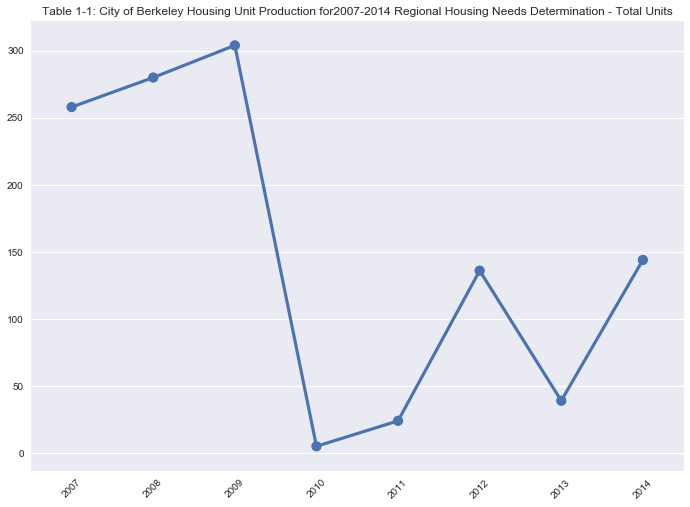

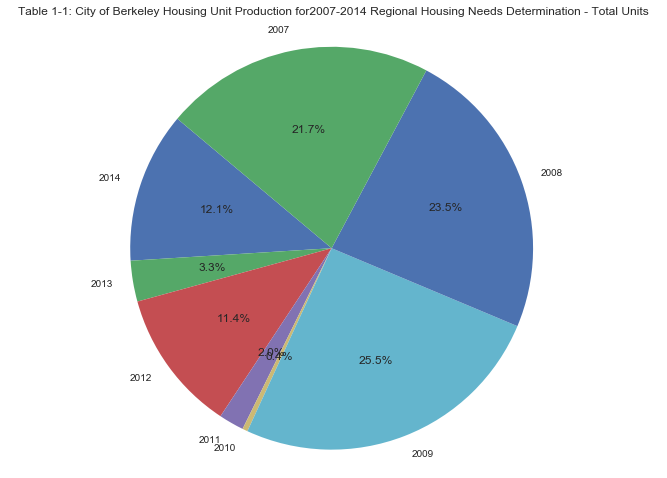

Very Low Income


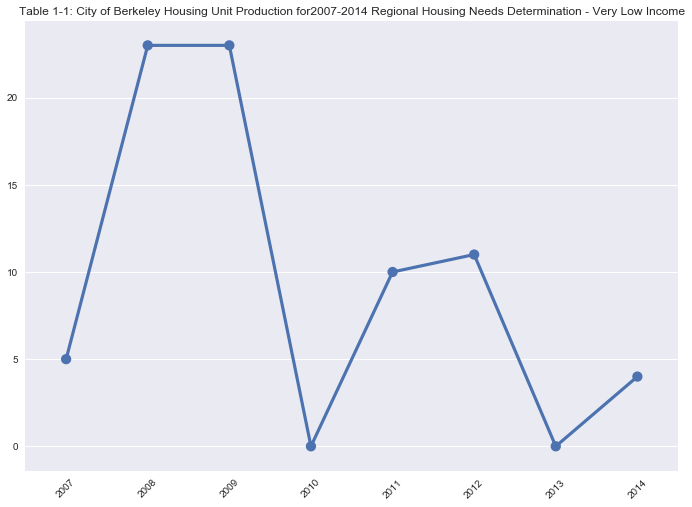

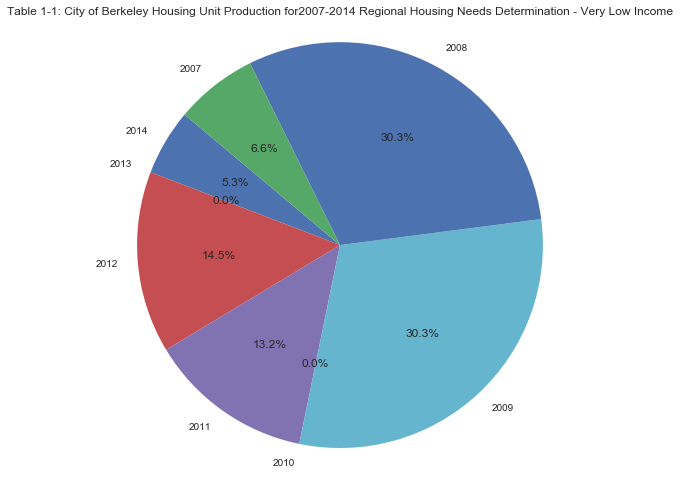

Low Income


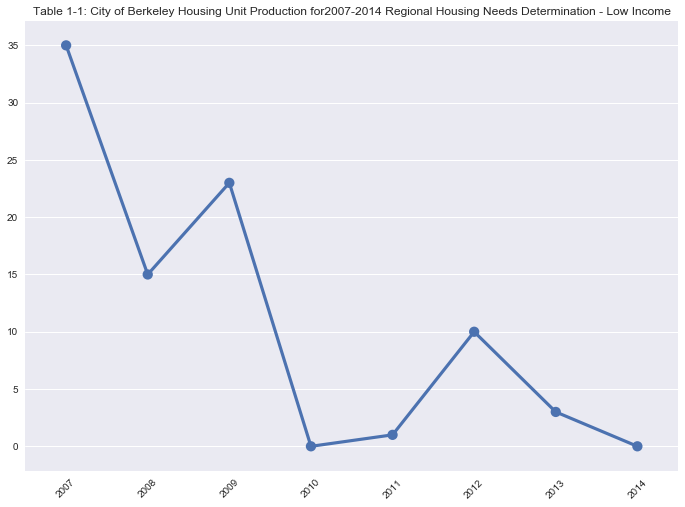

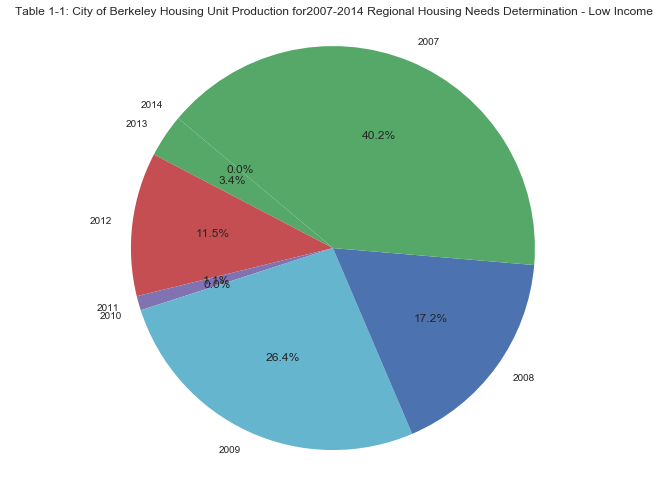

Moderate Income


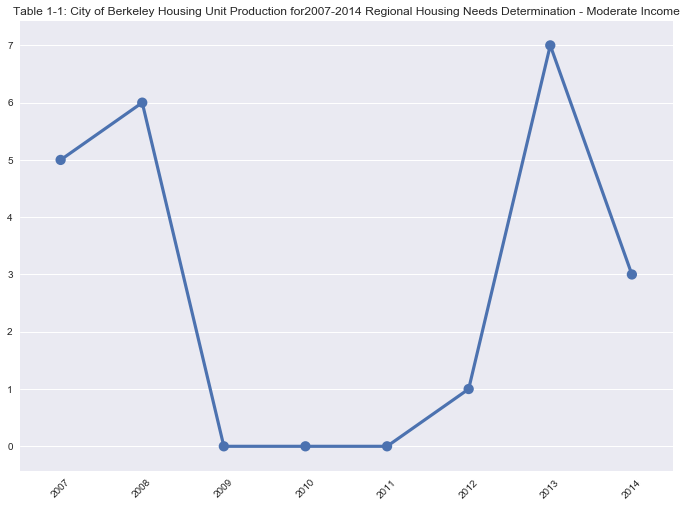

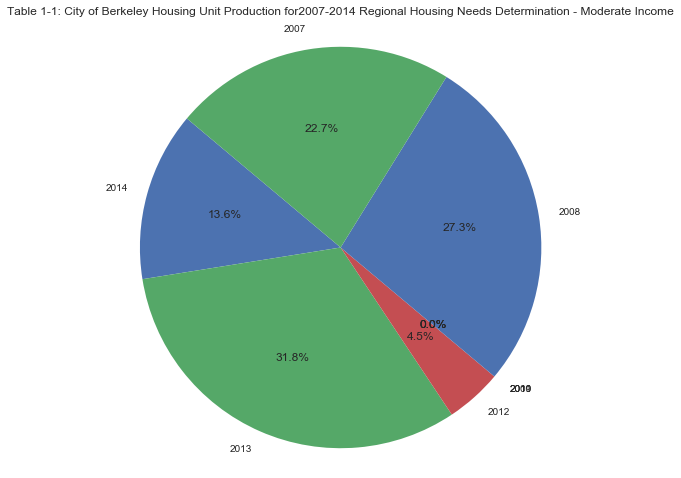

Above ModerateIncome


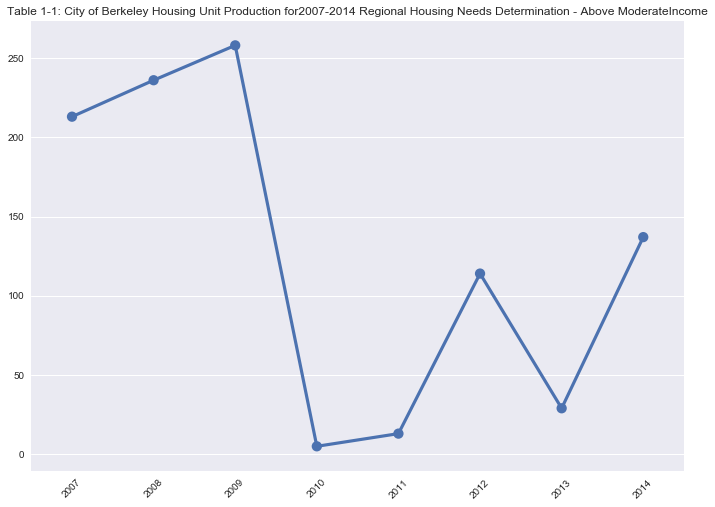

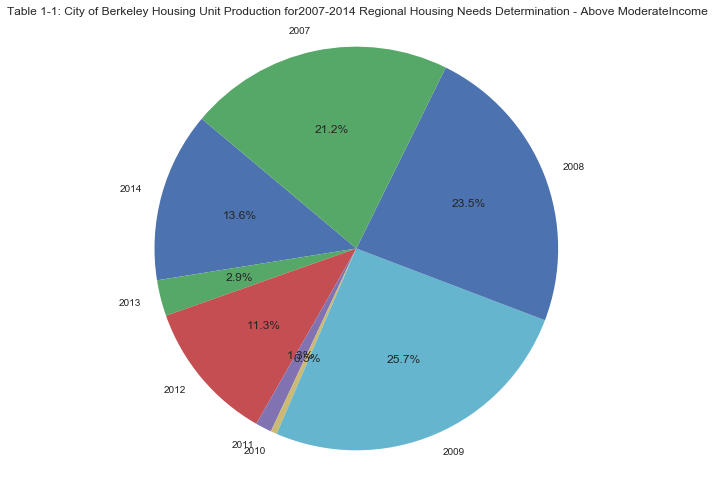

1990


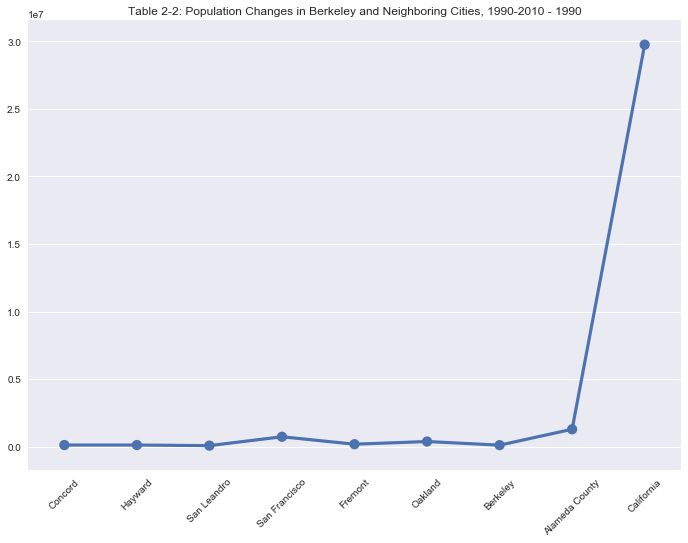

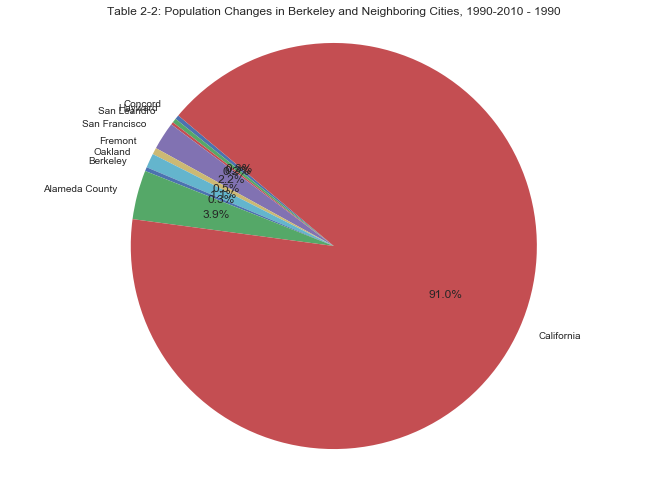

2000


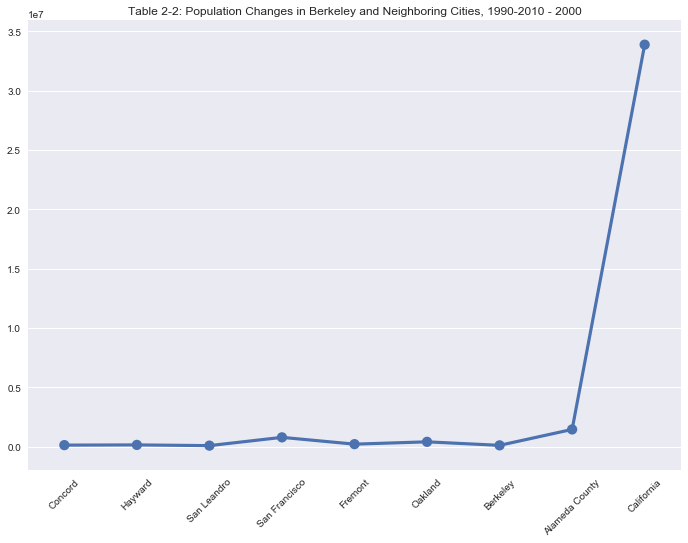

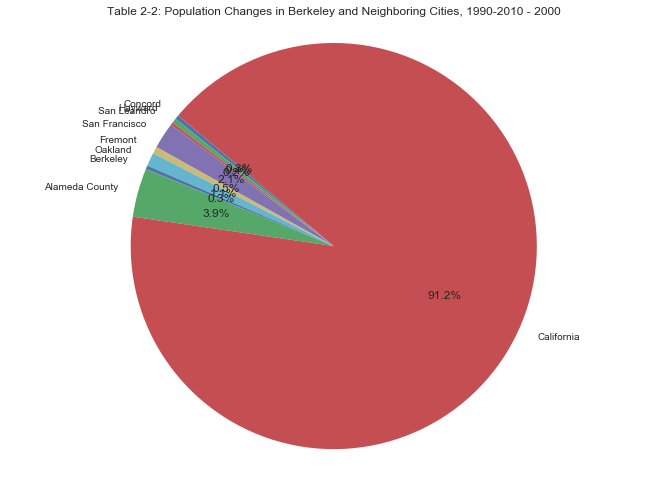

Change(1990-2000) Number


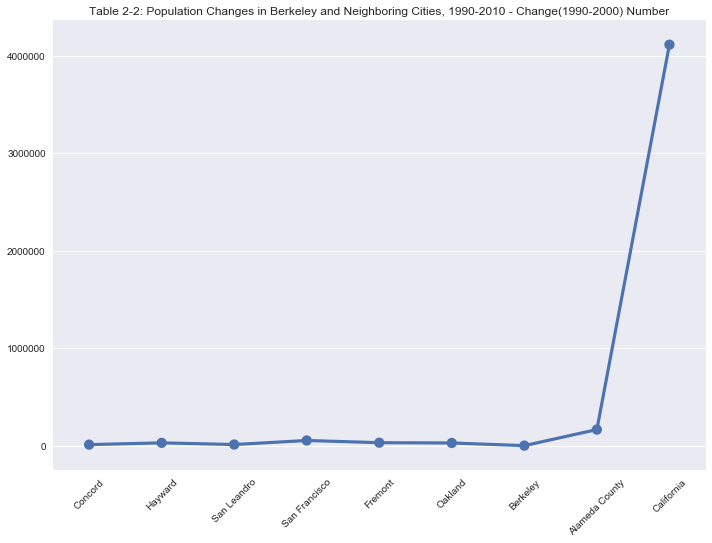

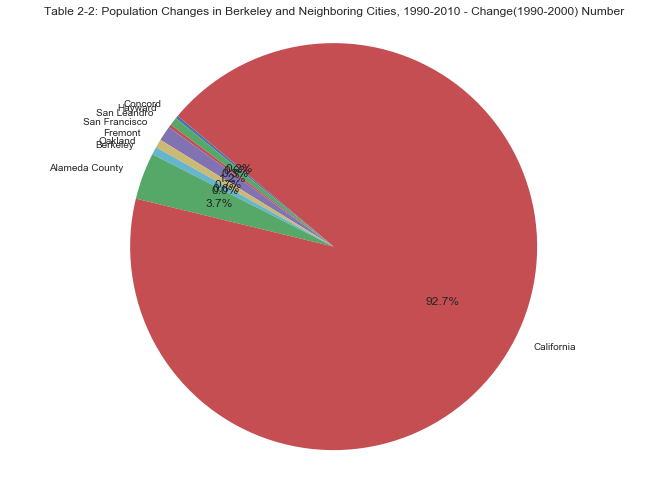

2010


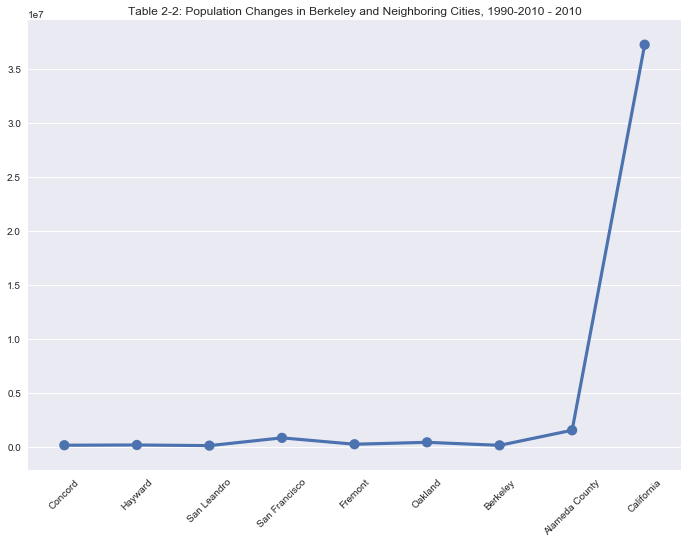

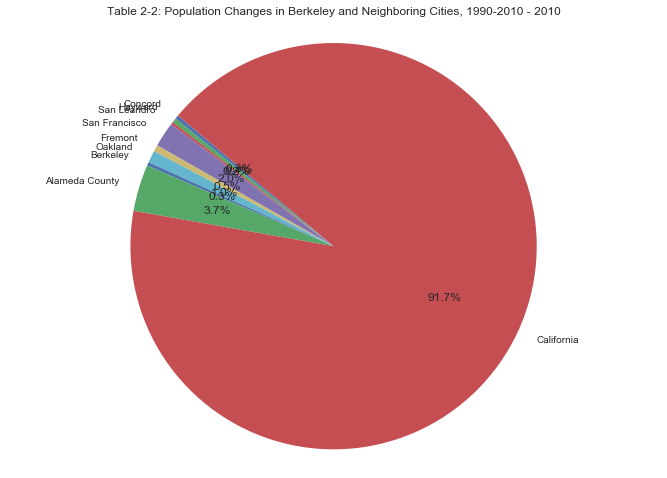

Change(2000-2010) Number


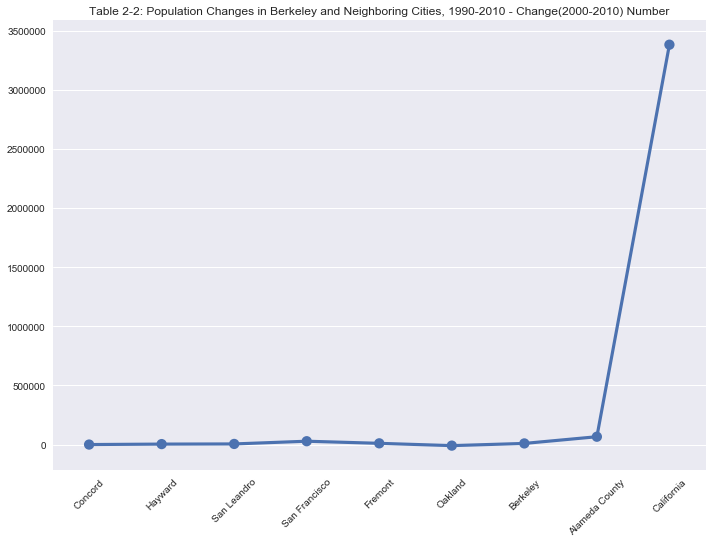

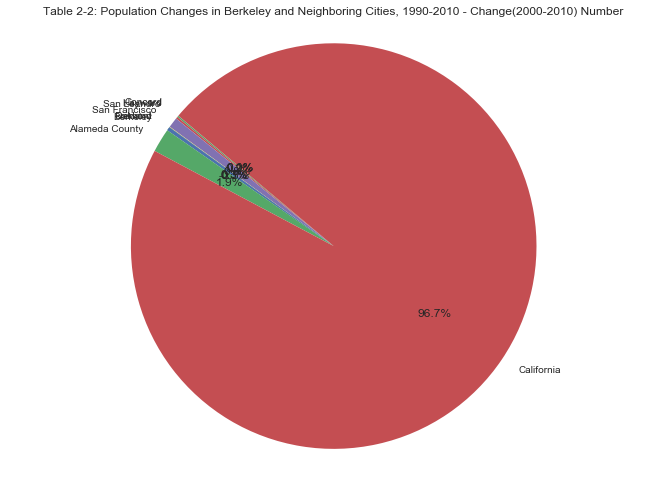

2000


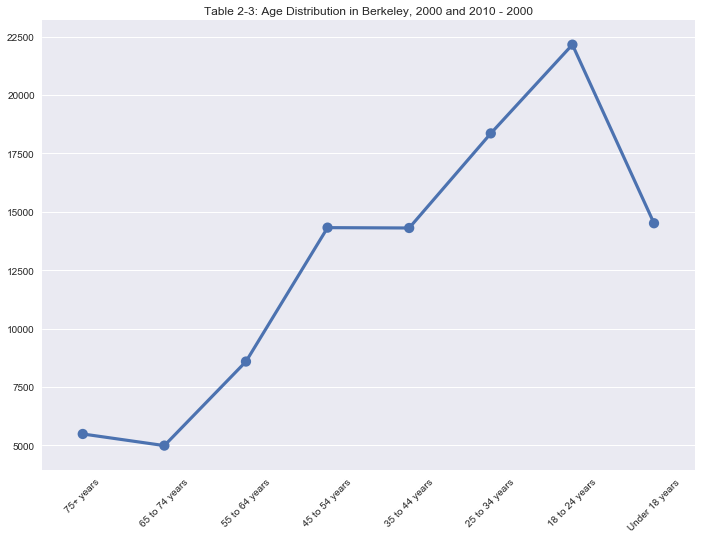

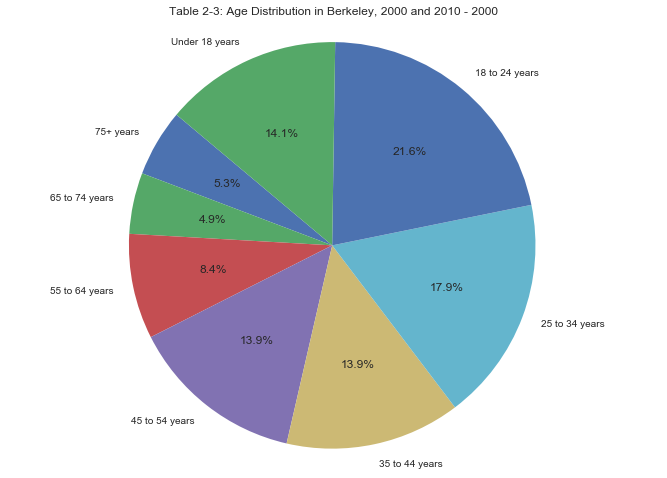

2010


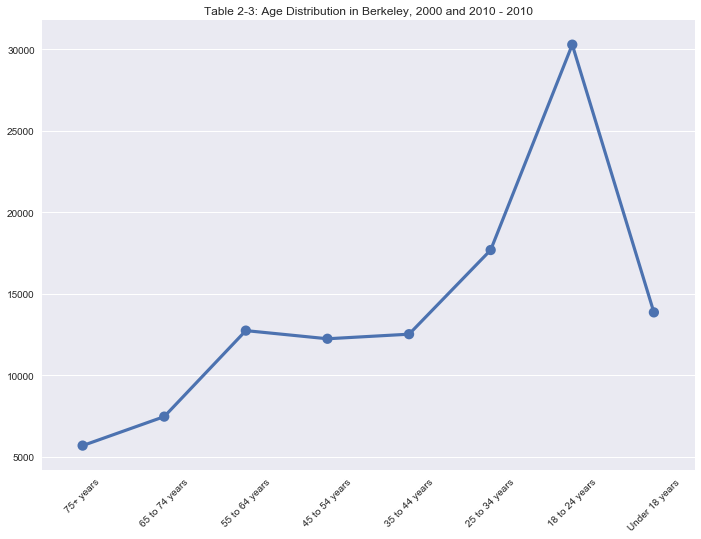

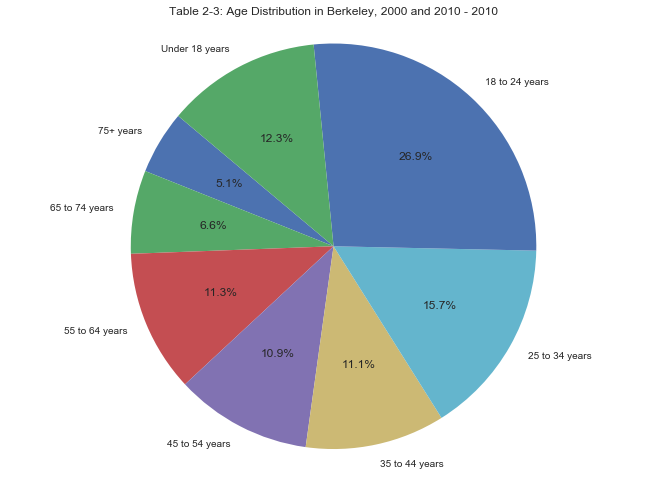

Berkeley HHs


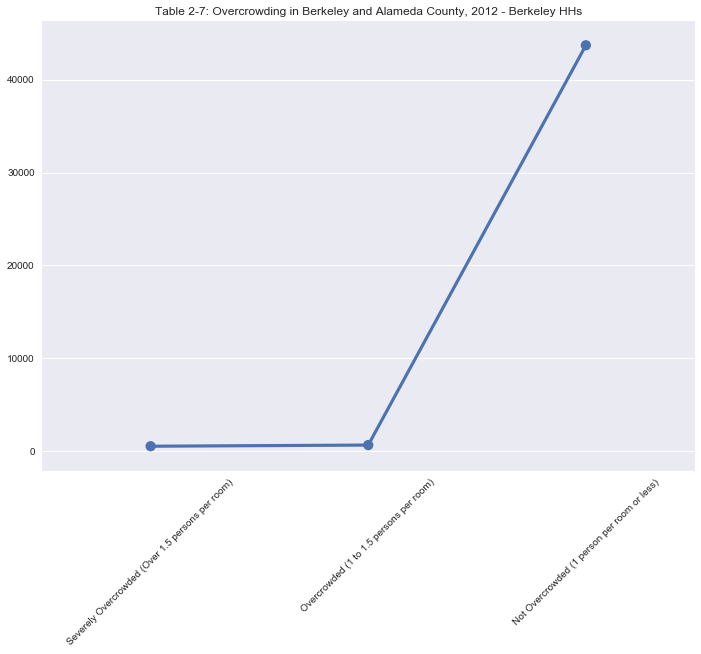

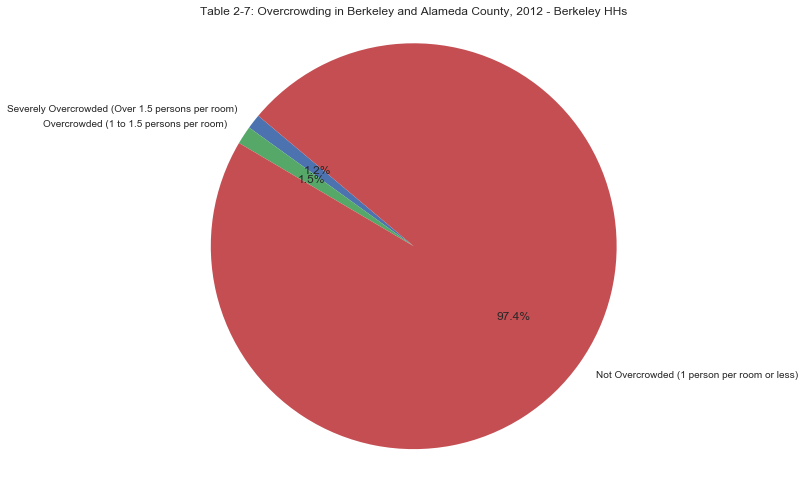

Alameda County HHs


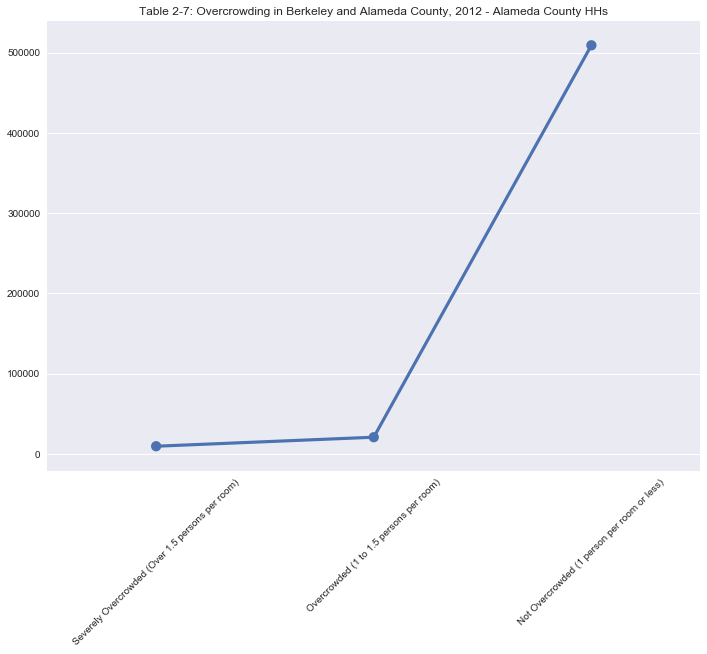

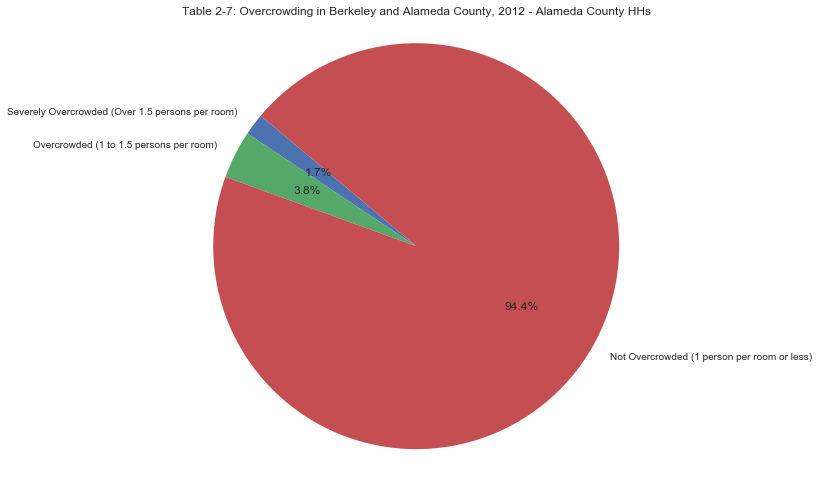

Owner Berkeley HHs


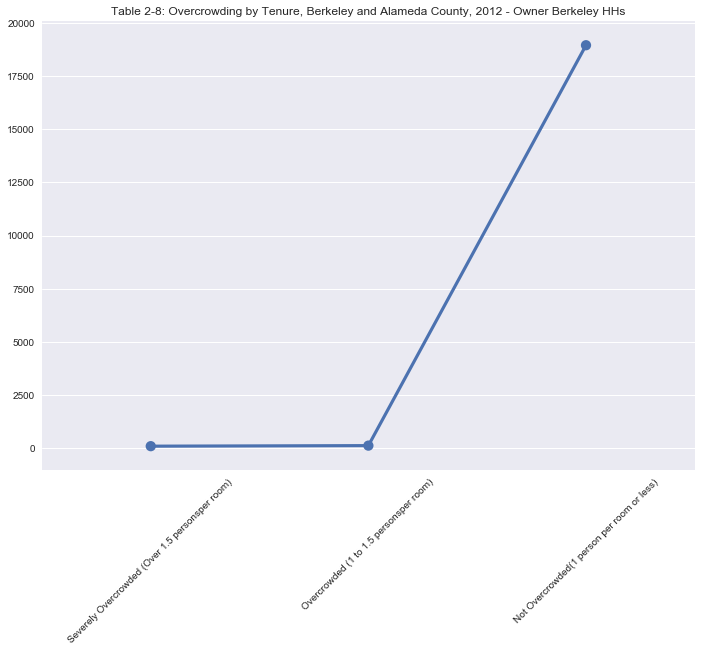

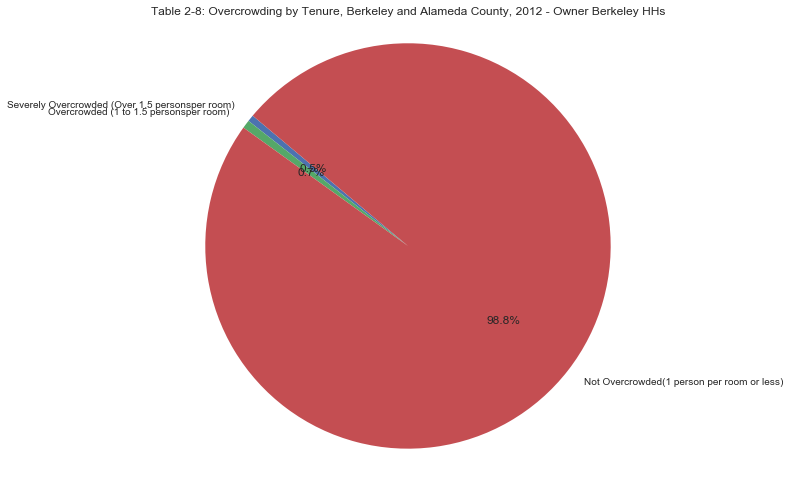

Owner Alameda County HHs


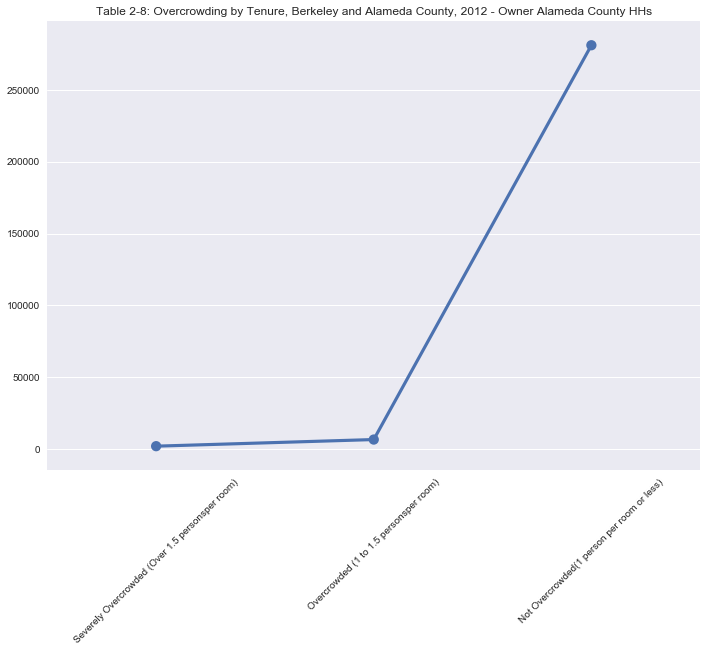

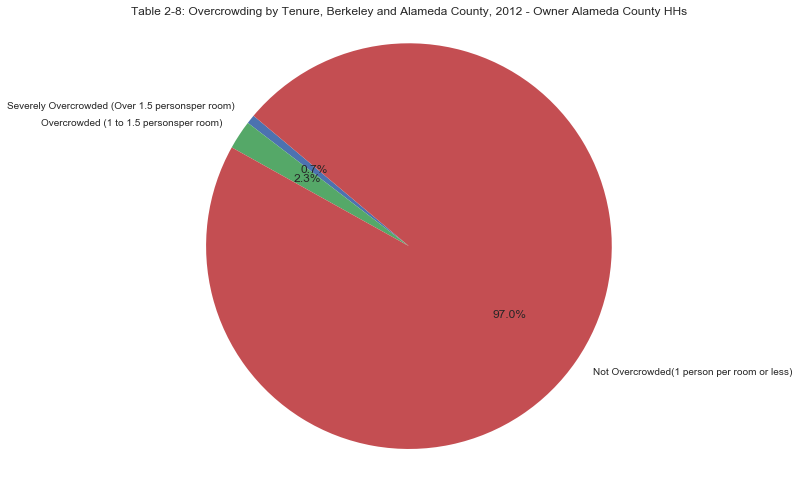

Renter Berkeley HHs


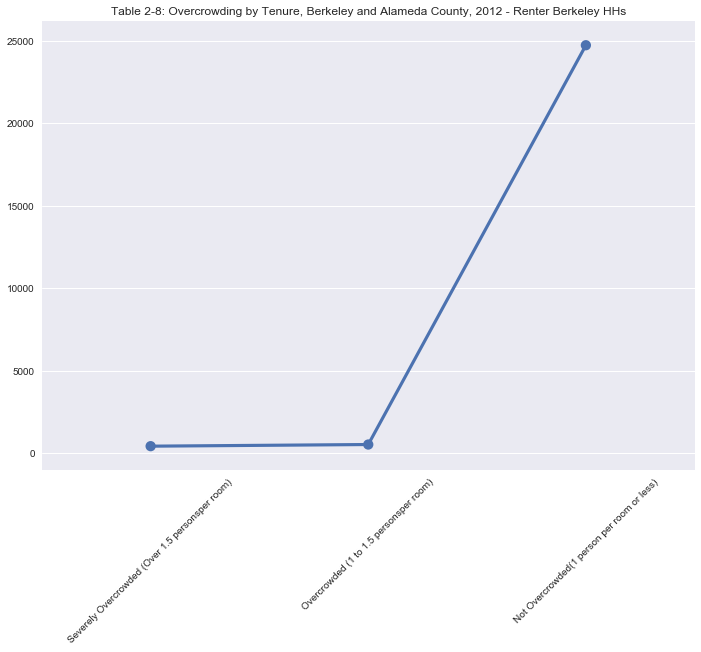

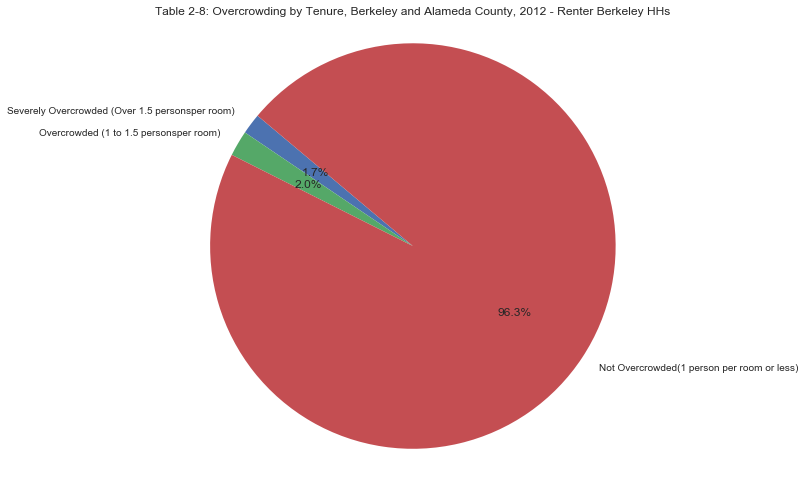

Renter Alameda County HHs


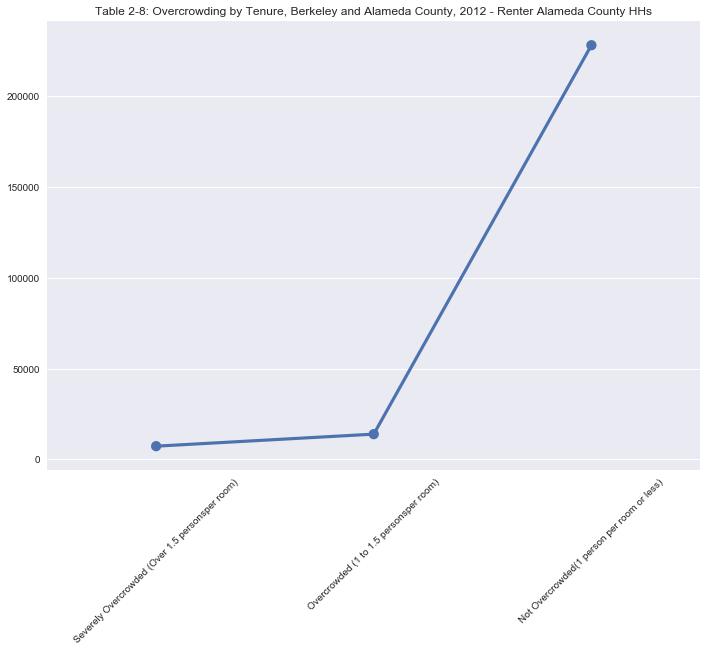

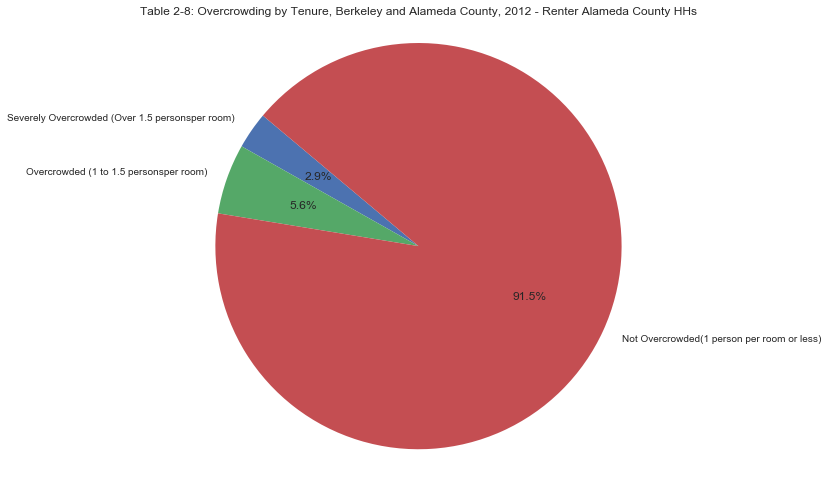

Number of Elderly HHs


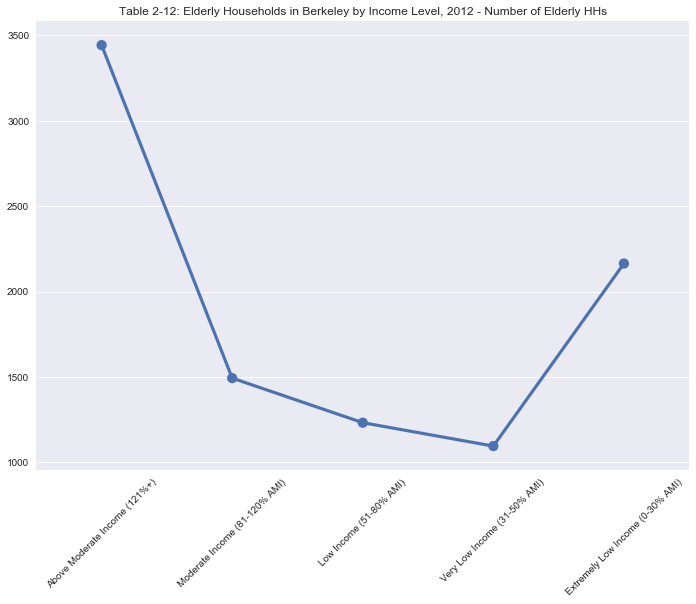

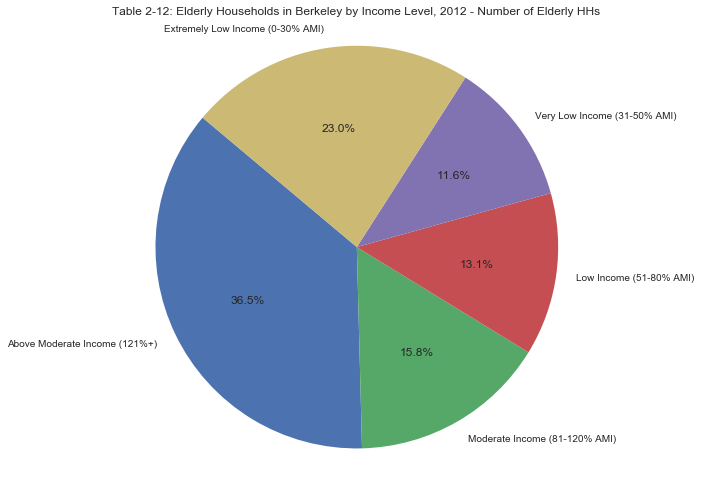

Owner Occupied


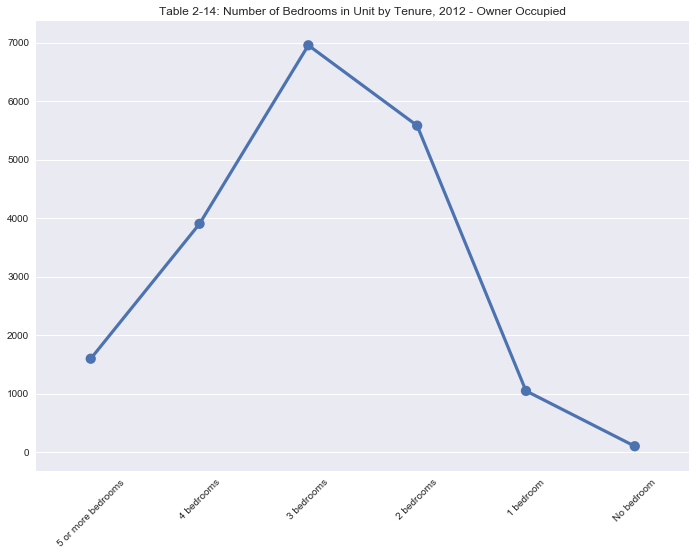

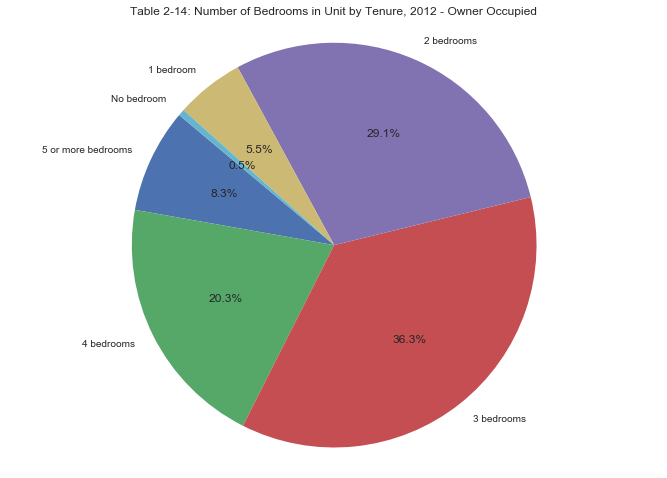

Renter Occupied


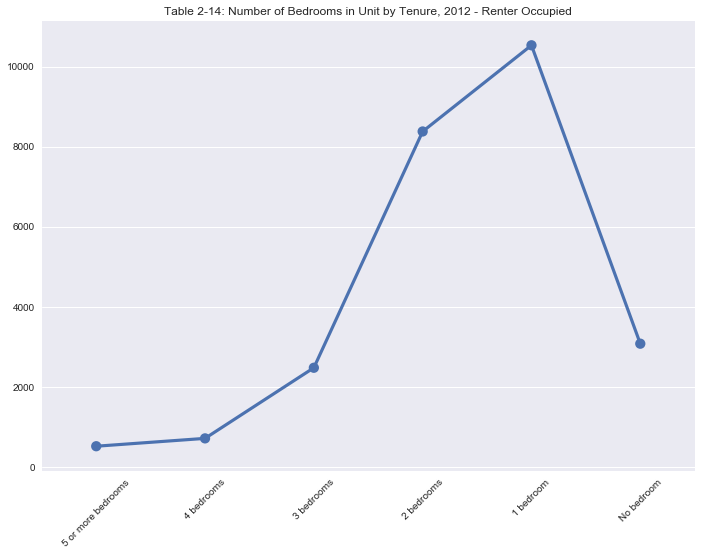

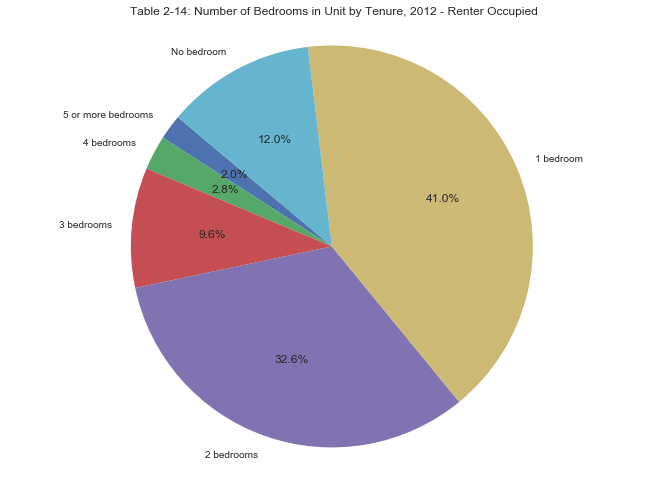

Berkeley City Estimate


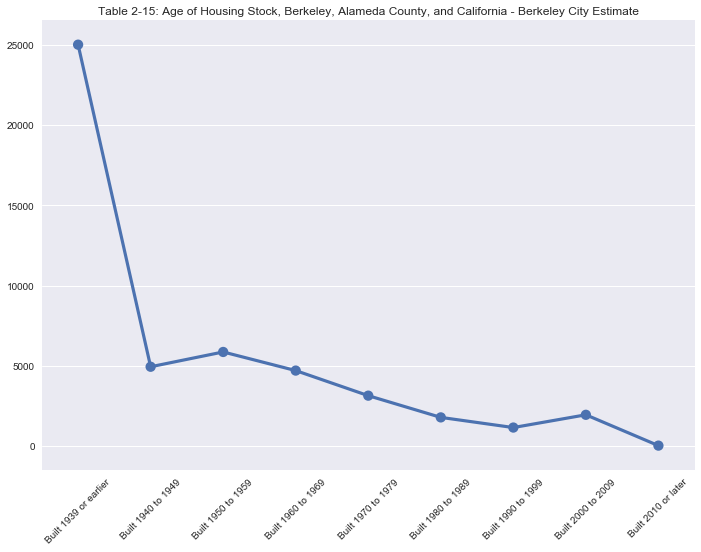

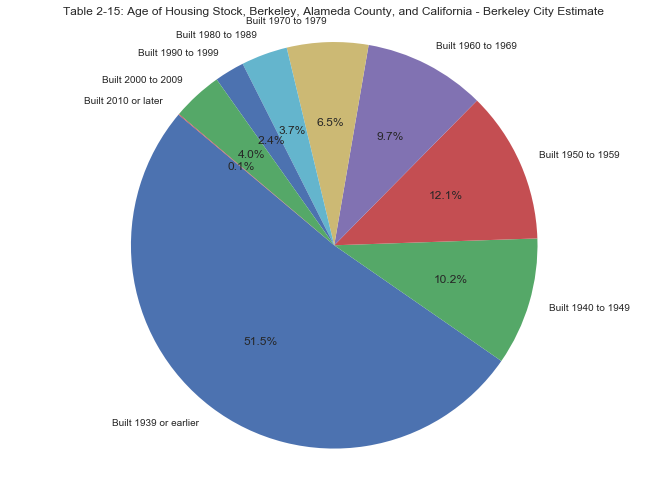

Alameda County Estimate


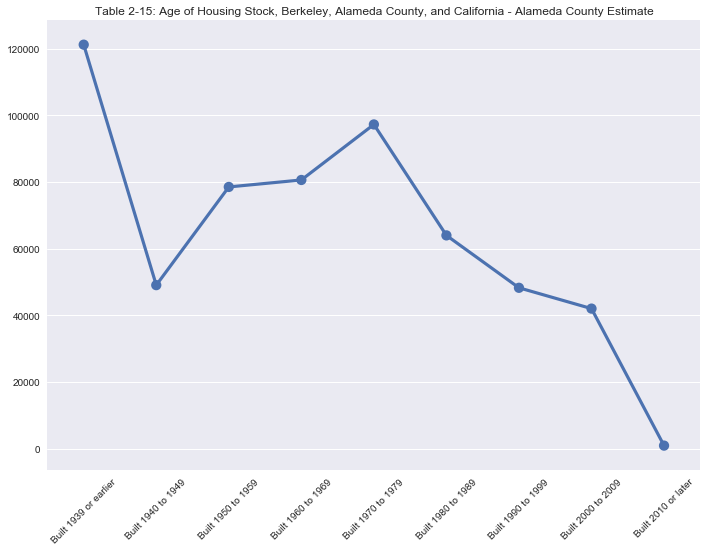

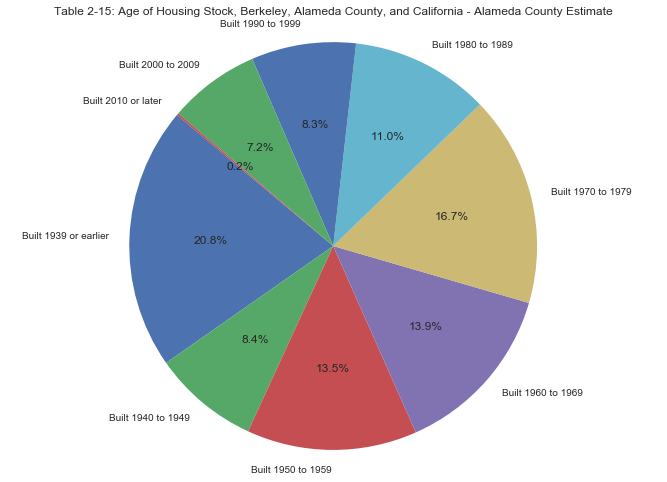

California Estimate


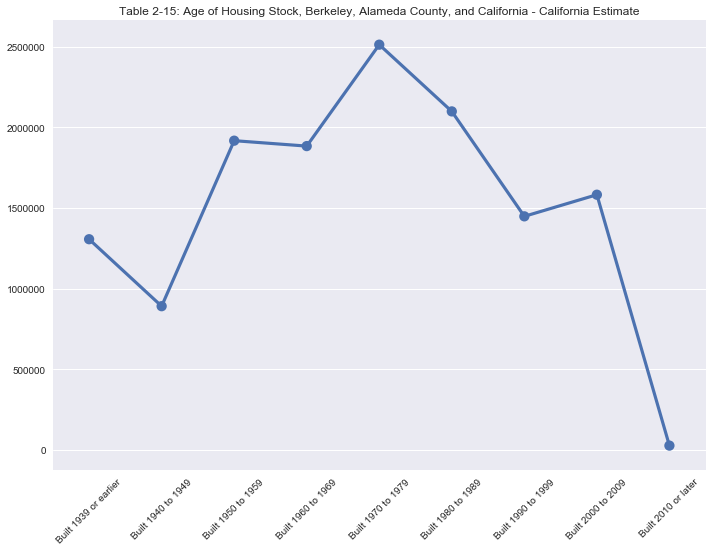

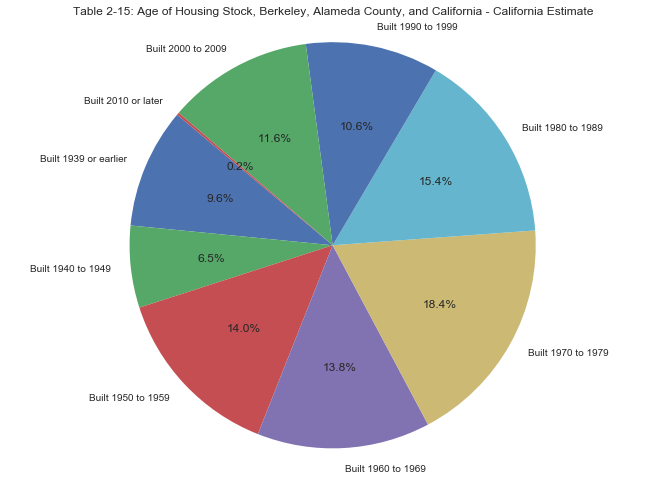

Renters HHs


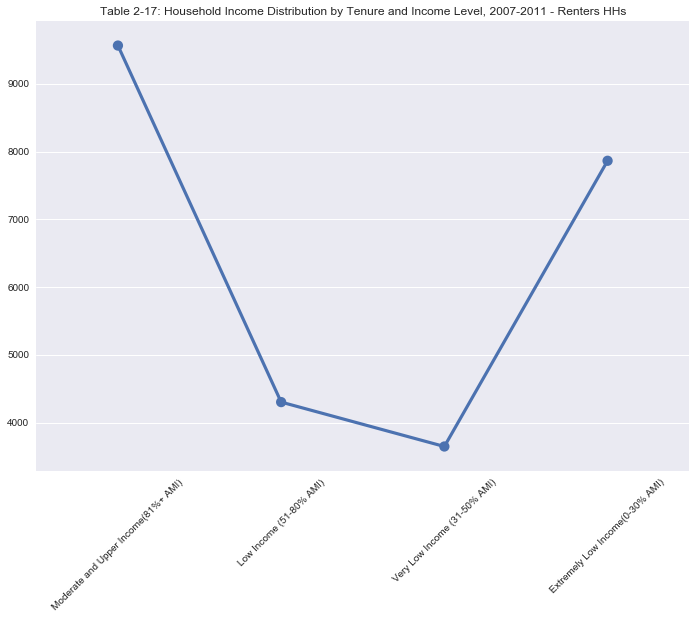

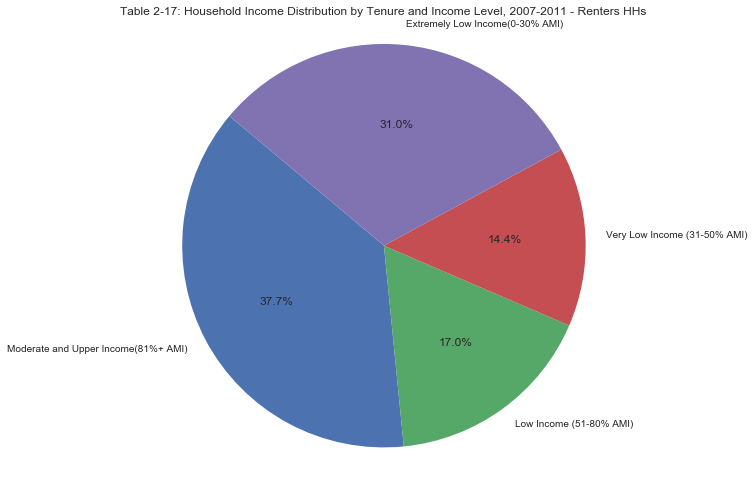

Home Owners HHs


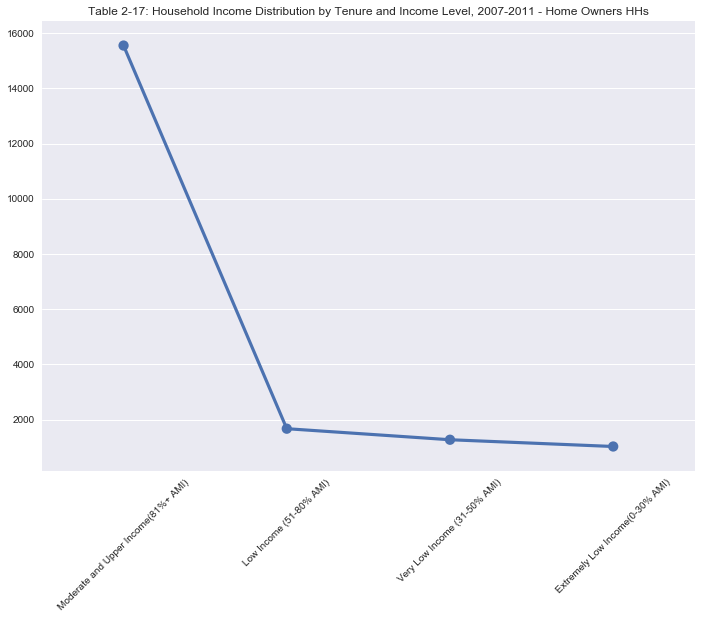

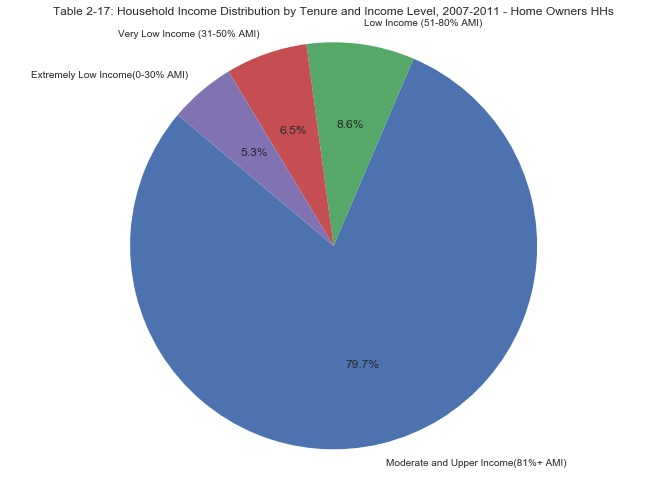

Total HHs


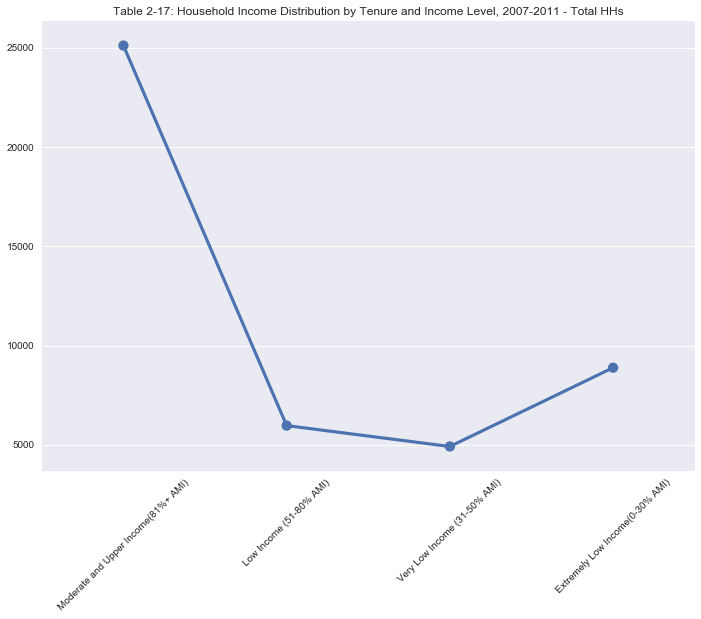

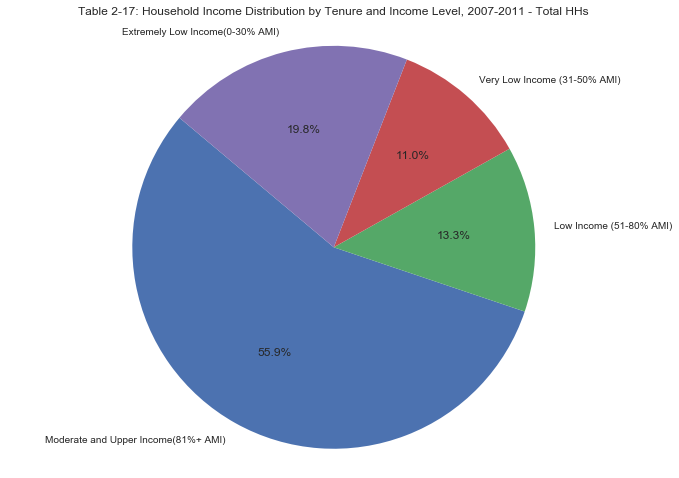

Number of Employees


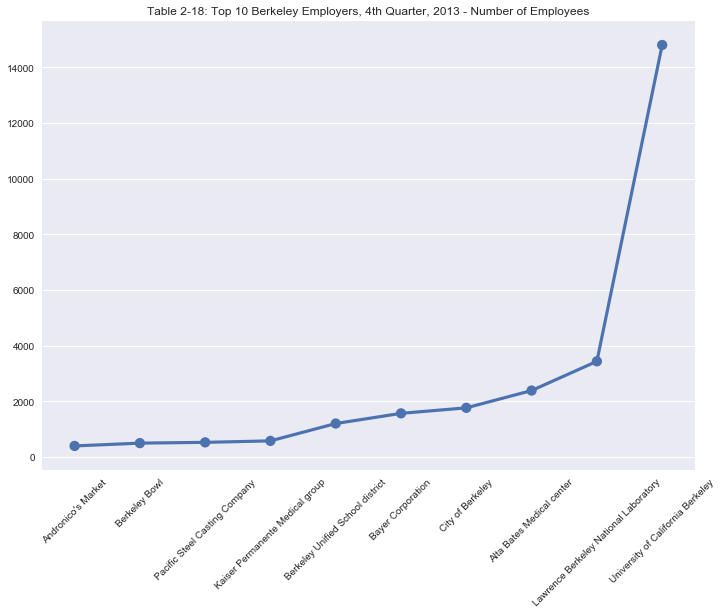

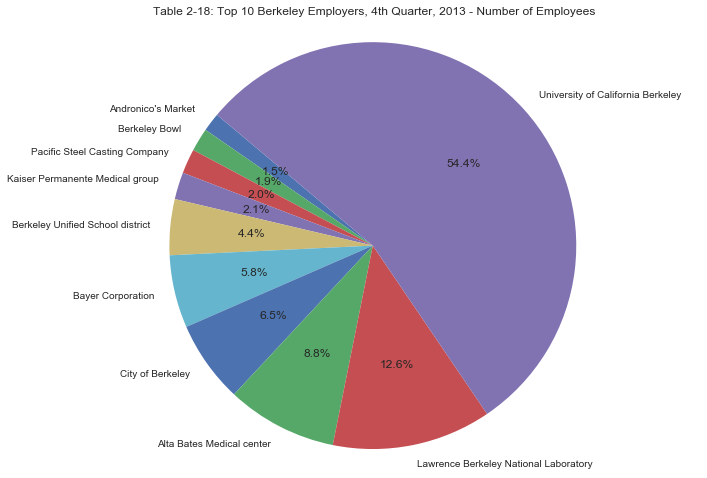

Rank


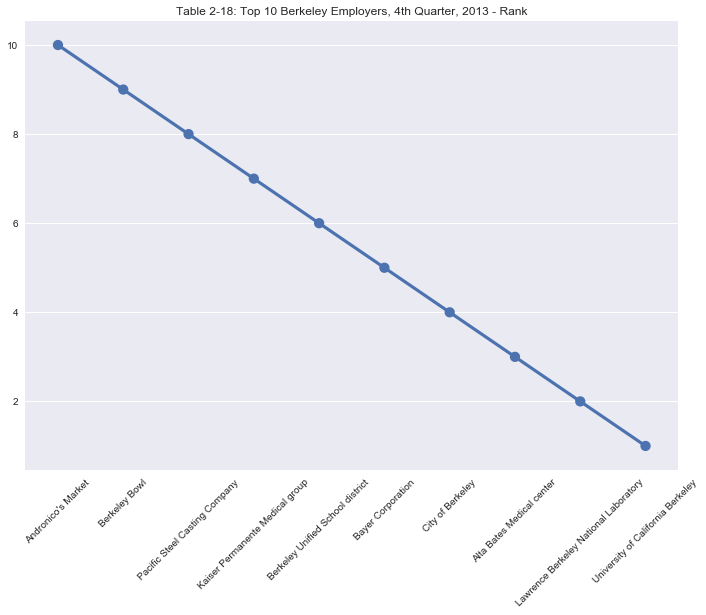

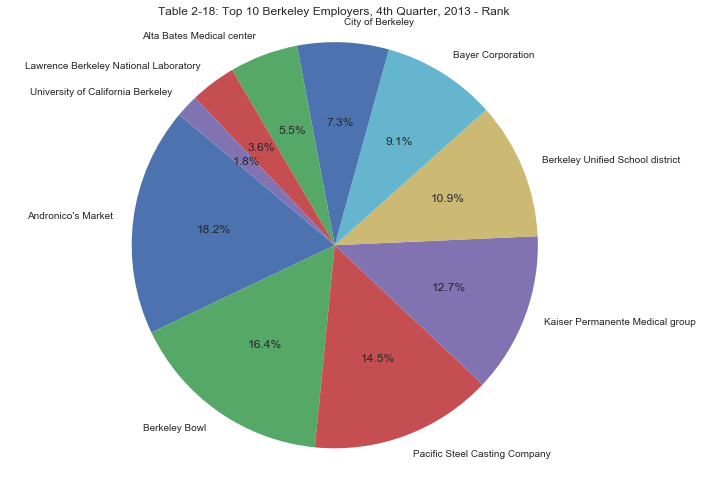

Employees


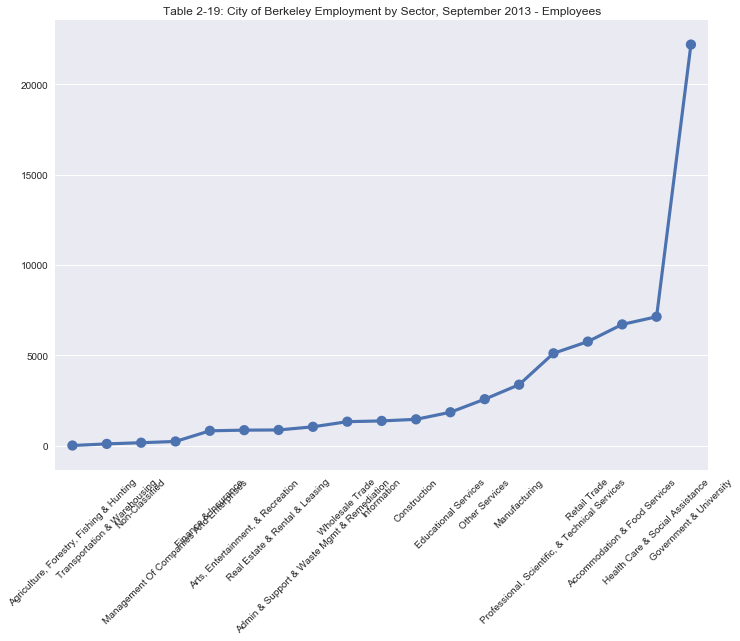

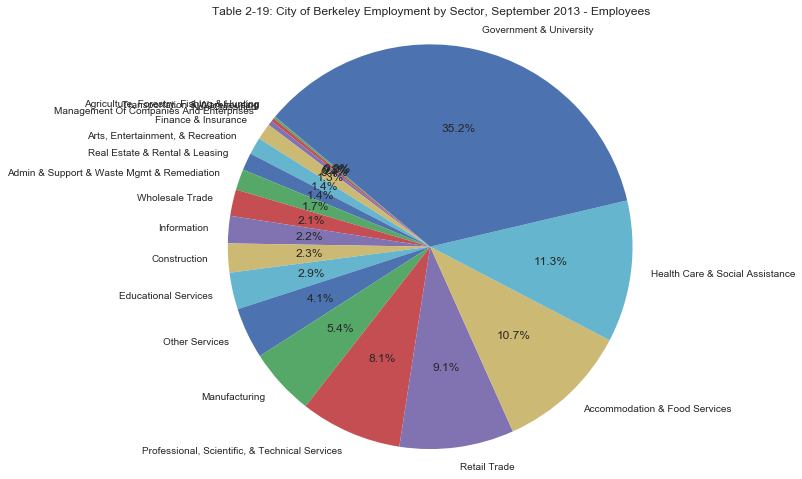

2010


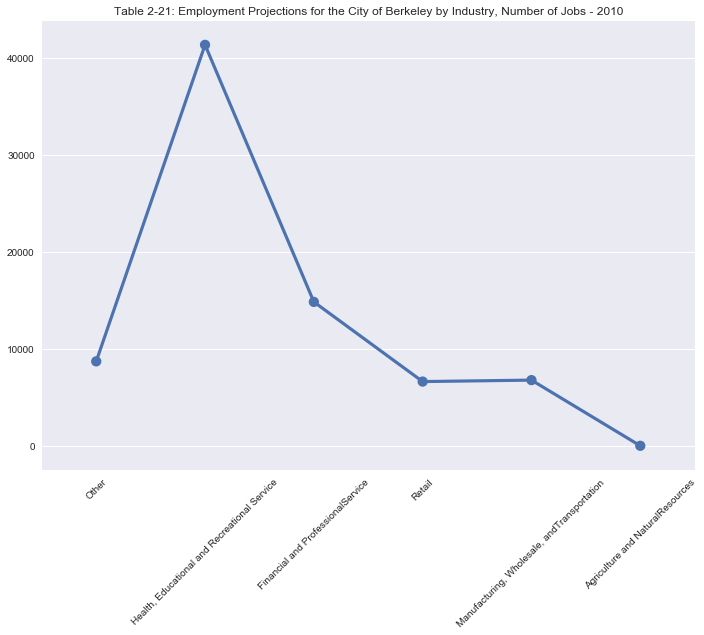

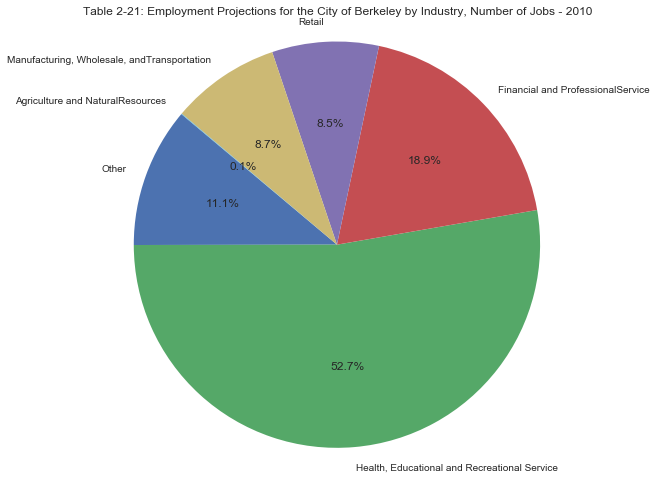

2015


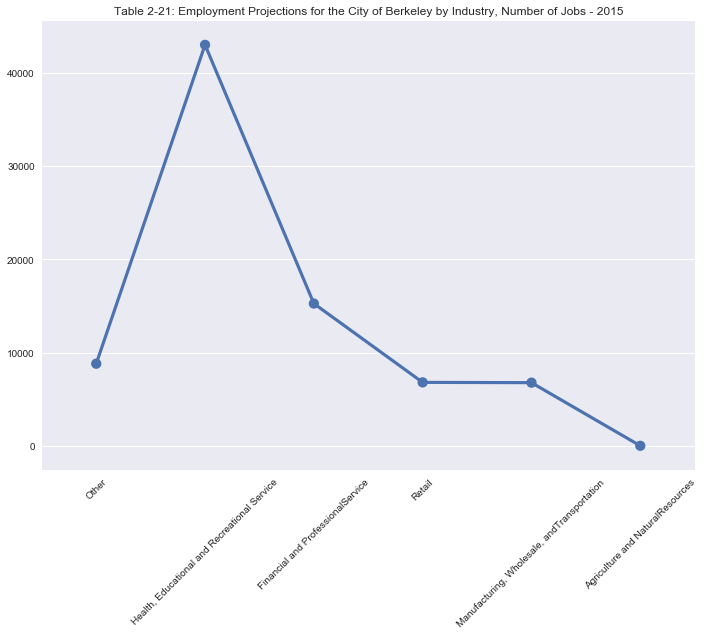

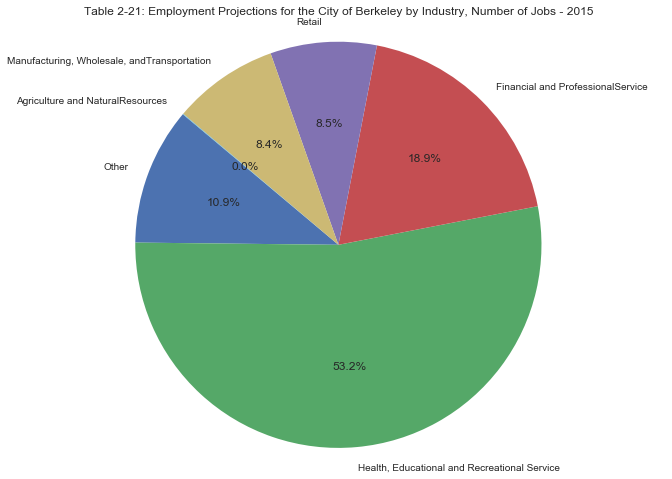

2020


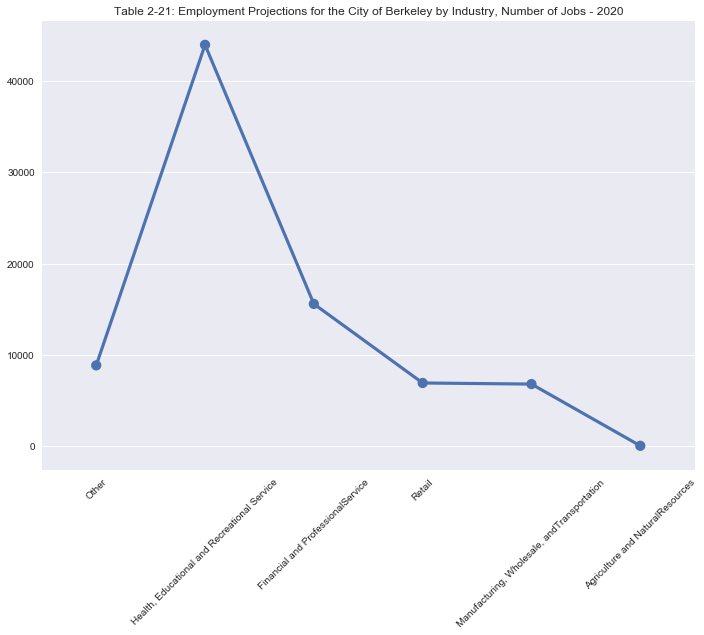

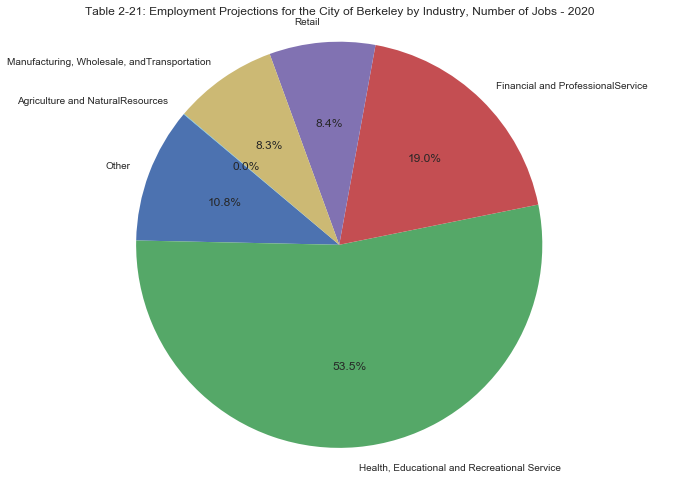

2025


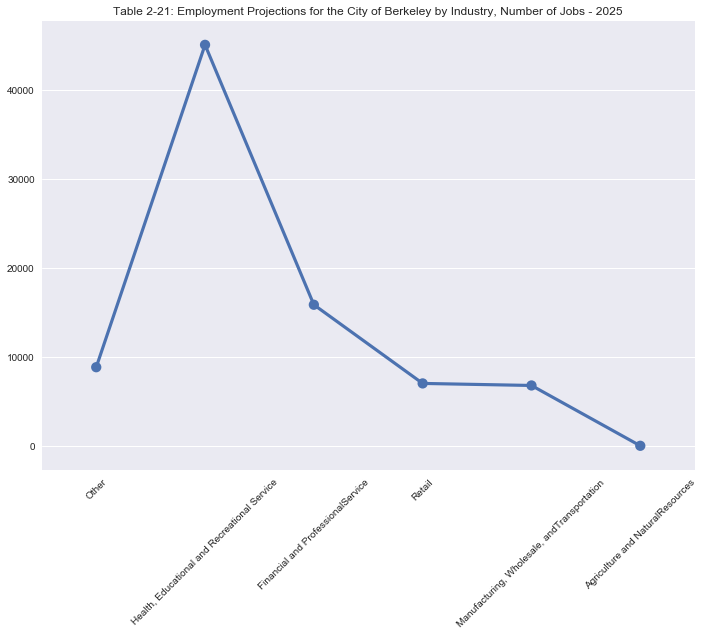

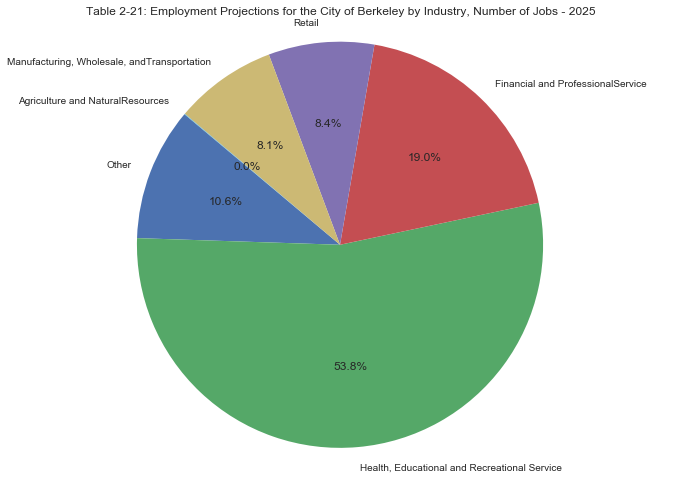

2030


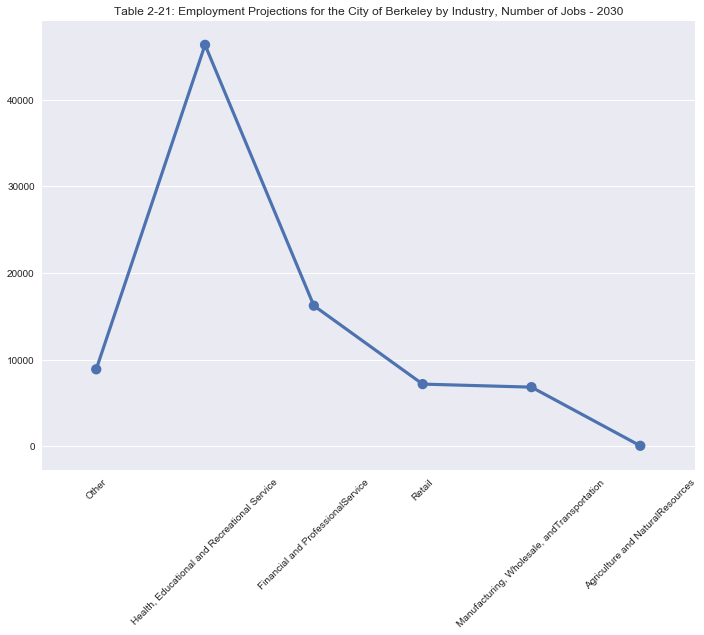

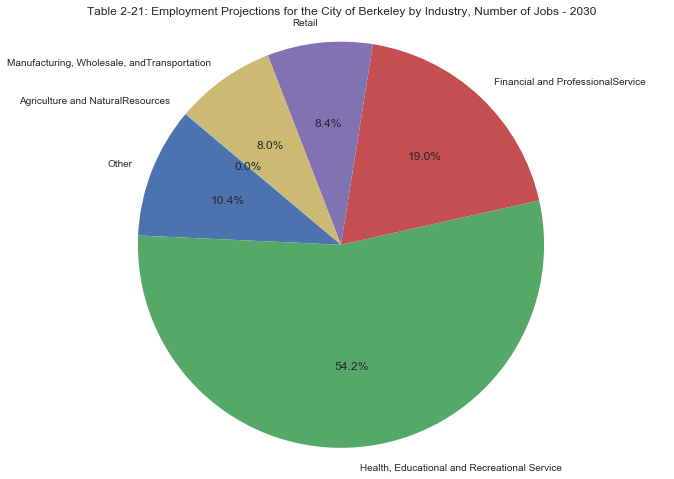

2035


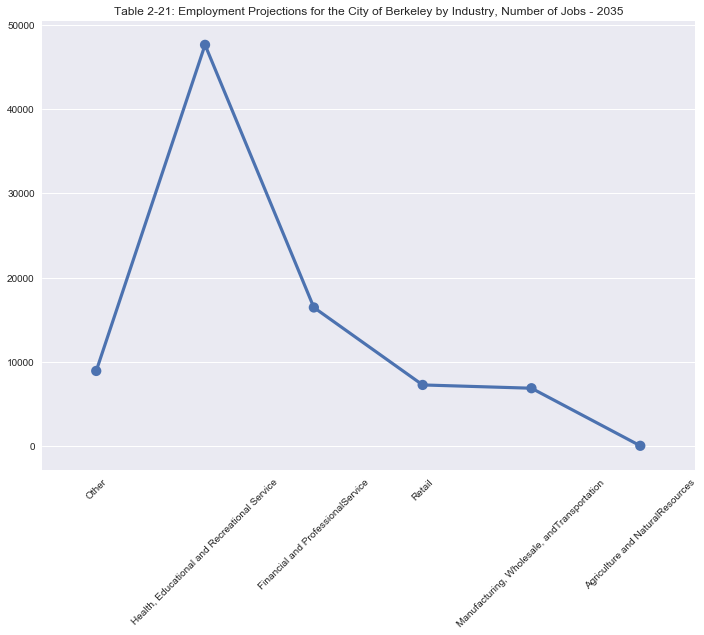

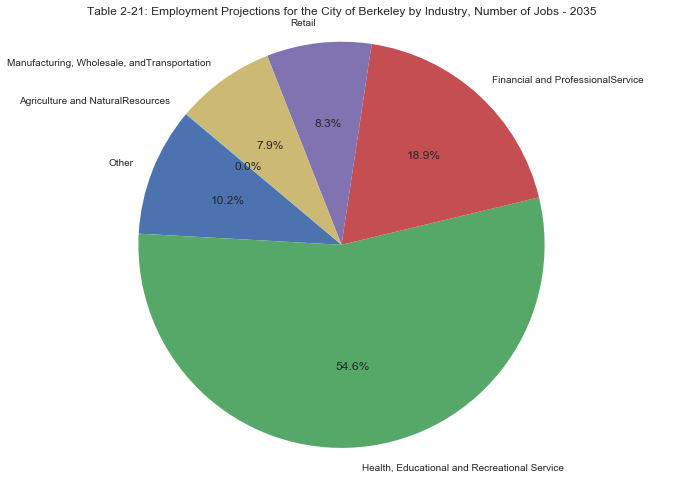

2009


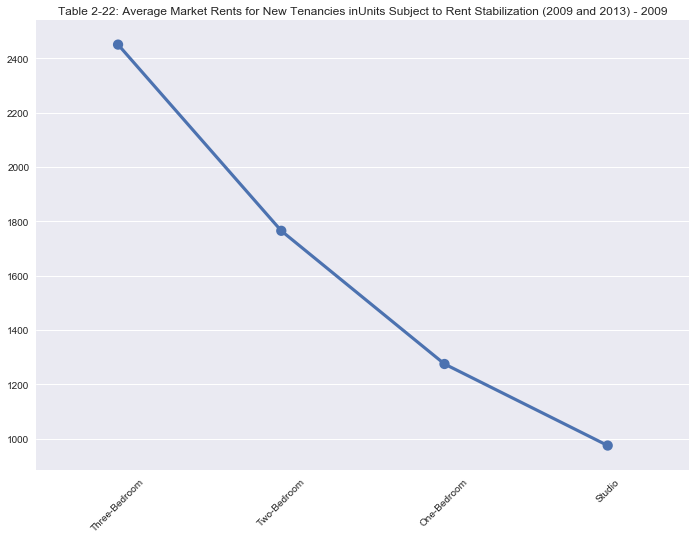

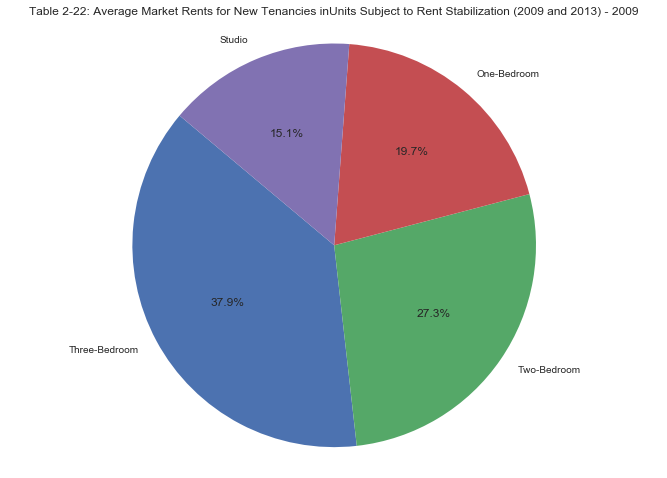

2013


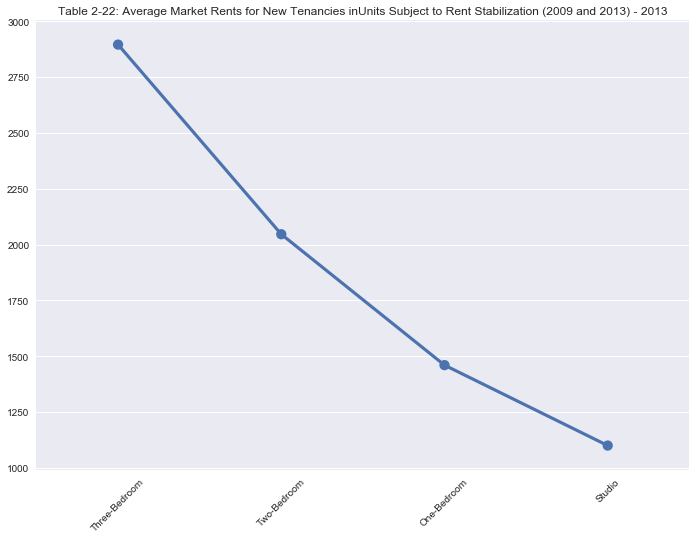

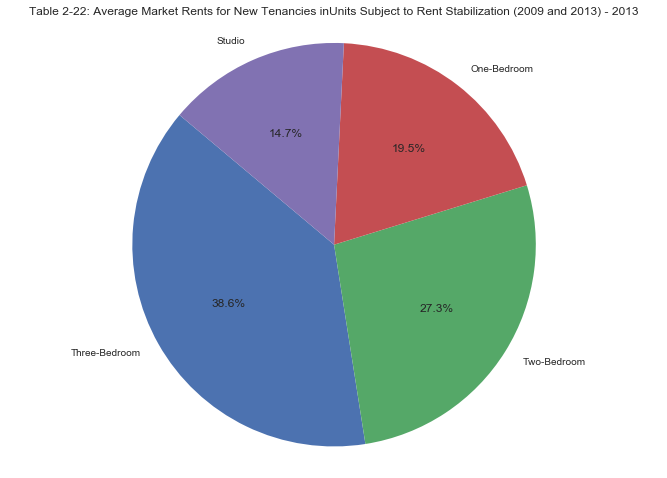

2010 (a)


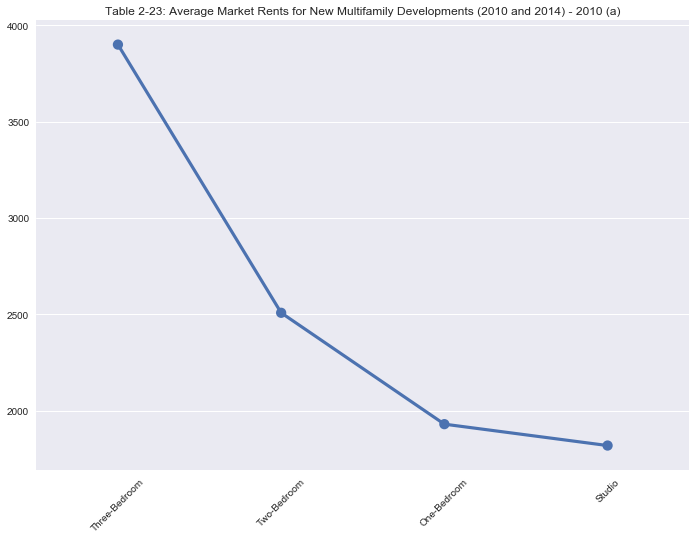

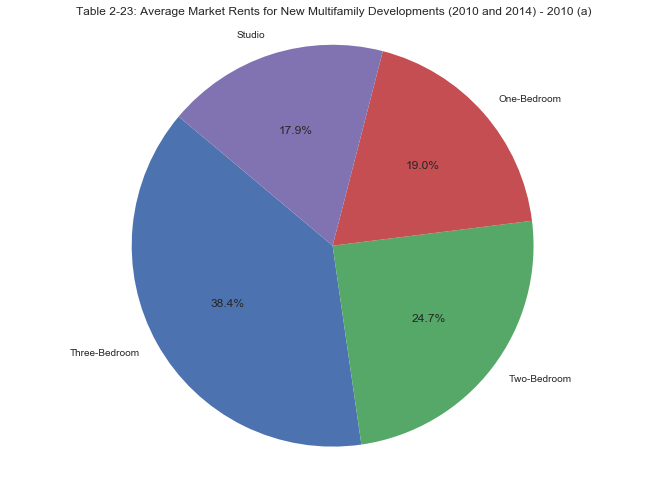

2014 (b)


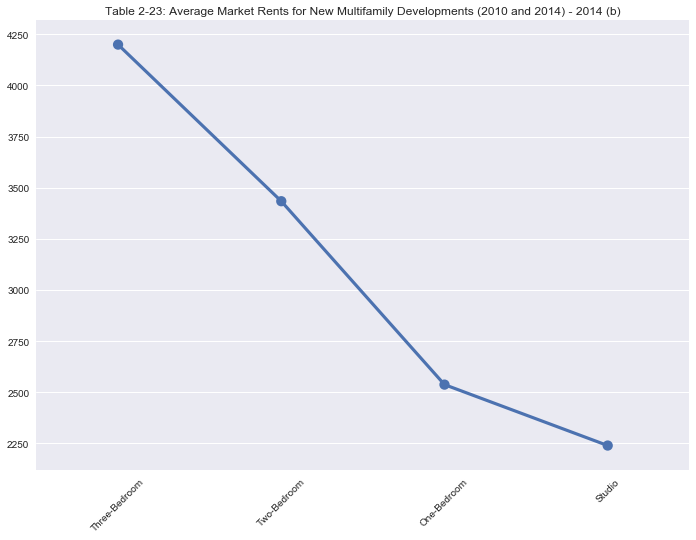

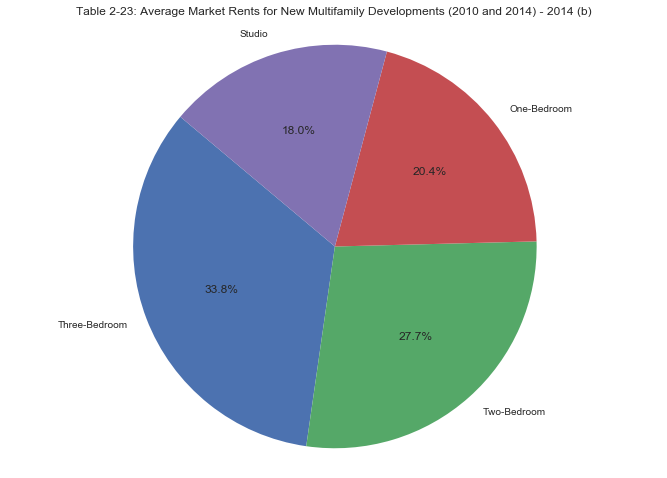

 Income    Limit (a)  


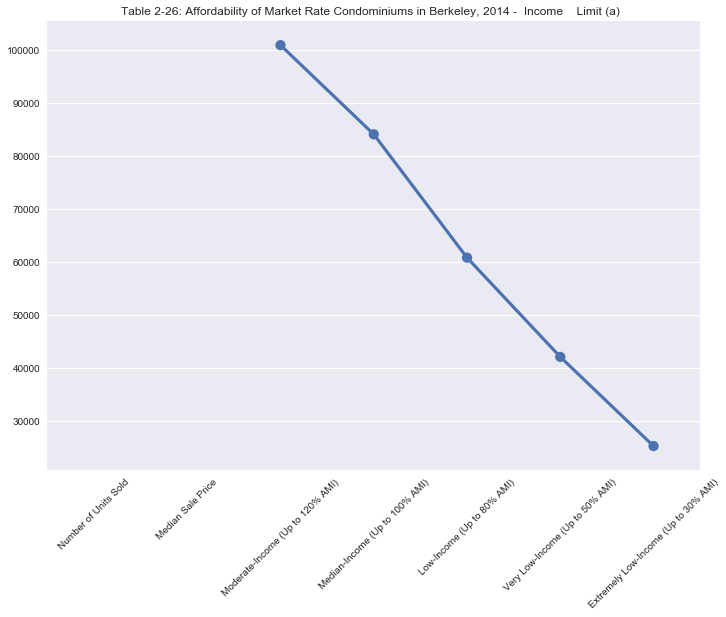

71


ValueError: cannot convert float NaN to integer

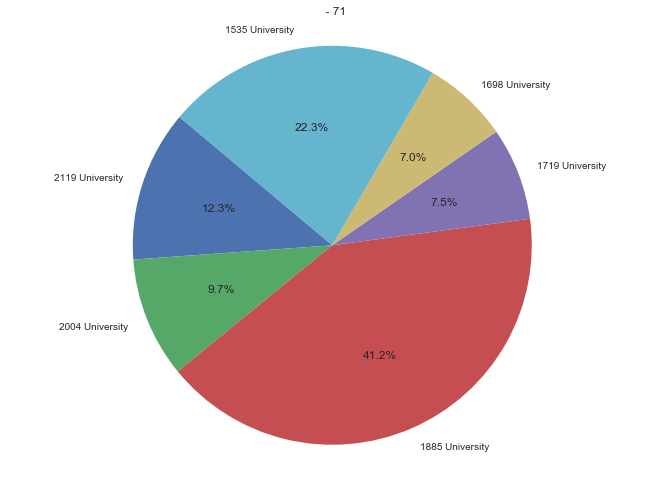

139


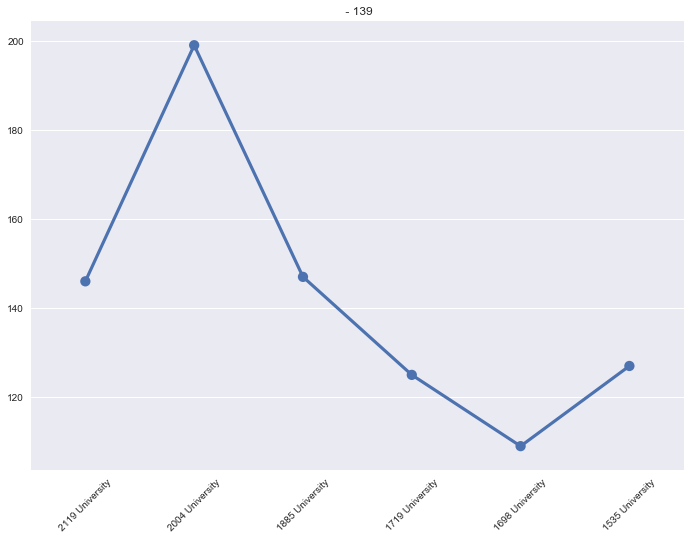

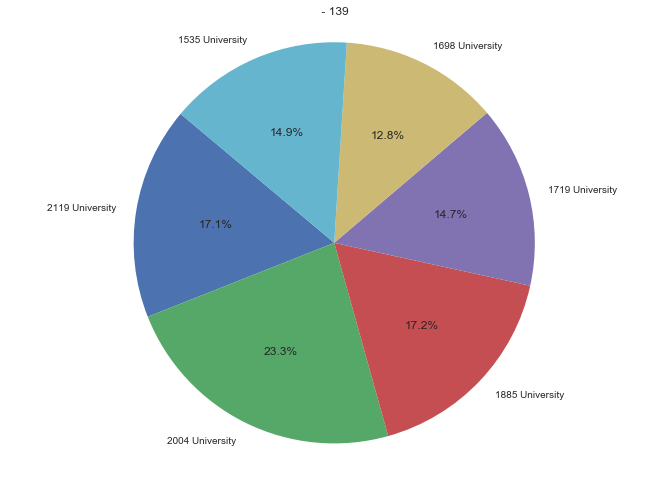

Payment Standard


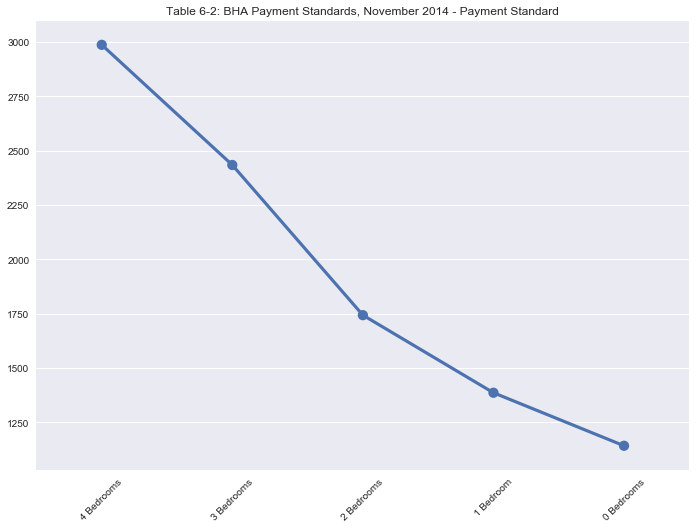

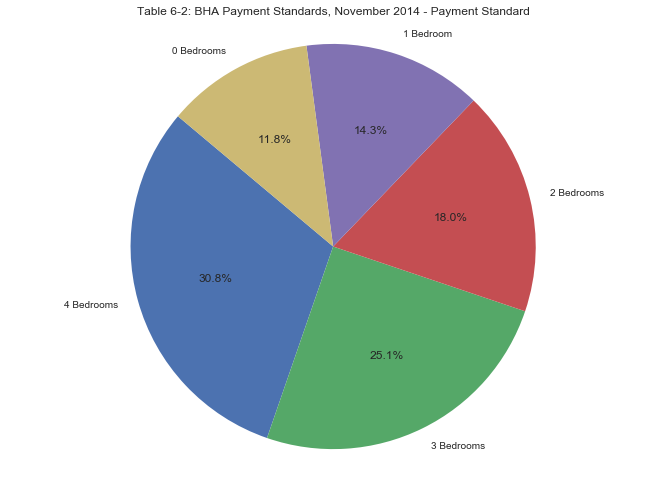

Units Approved for Conversion


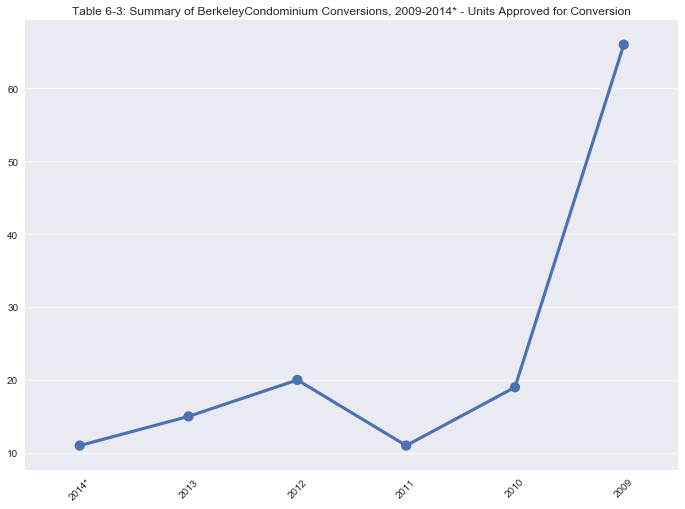

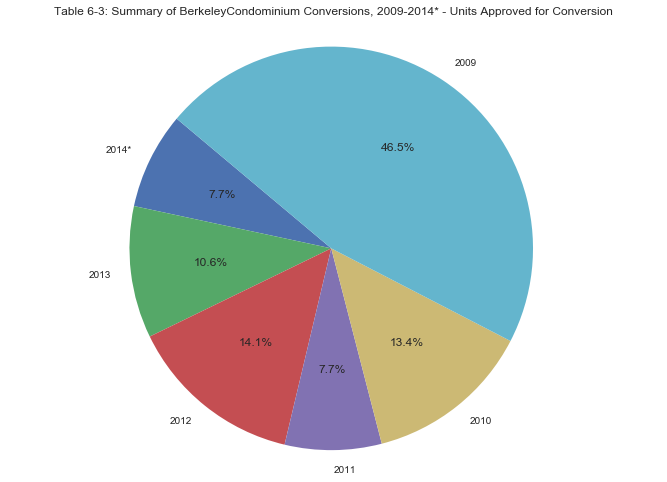

Accomplishments


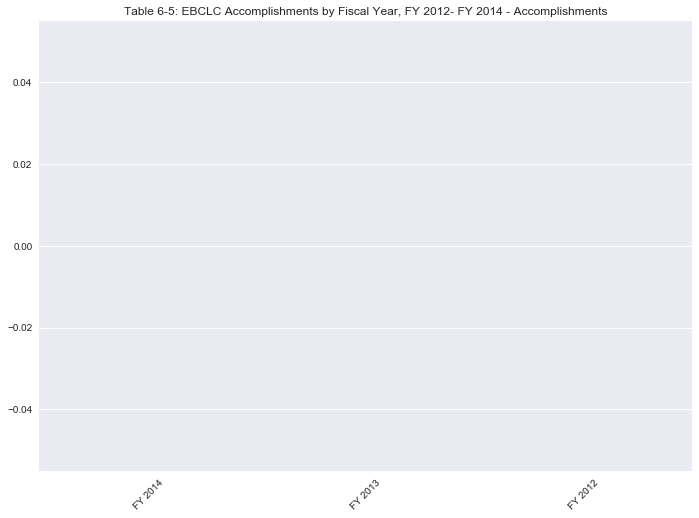

Interior/ exteriormodifications


ValueError: cannot convert float NaN to integer

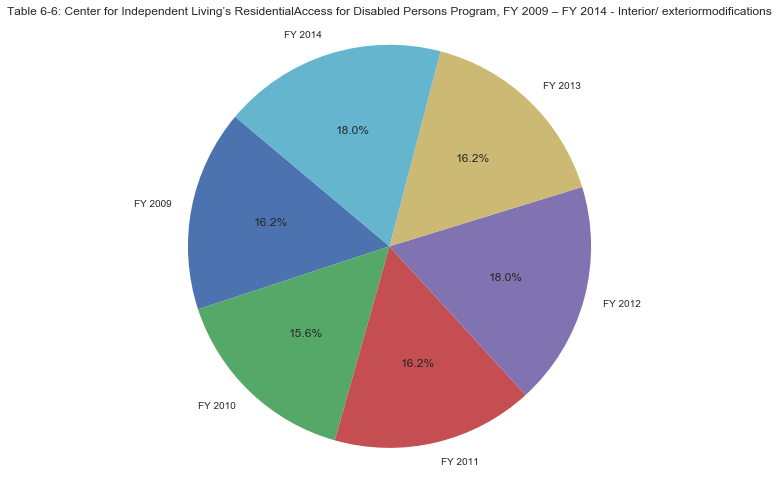

Ramps


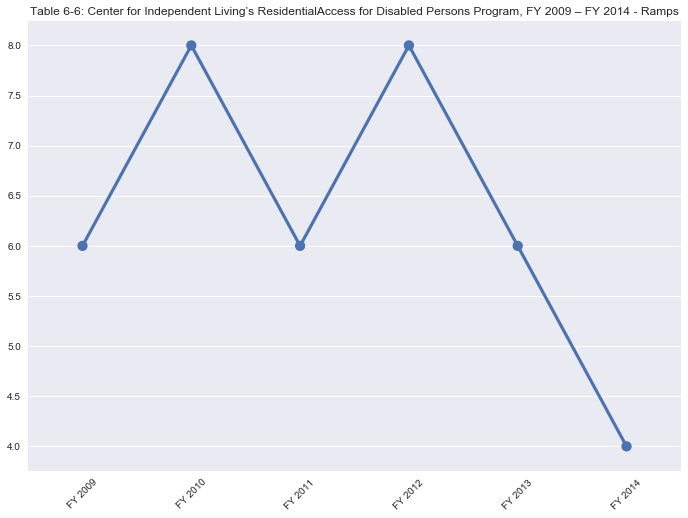

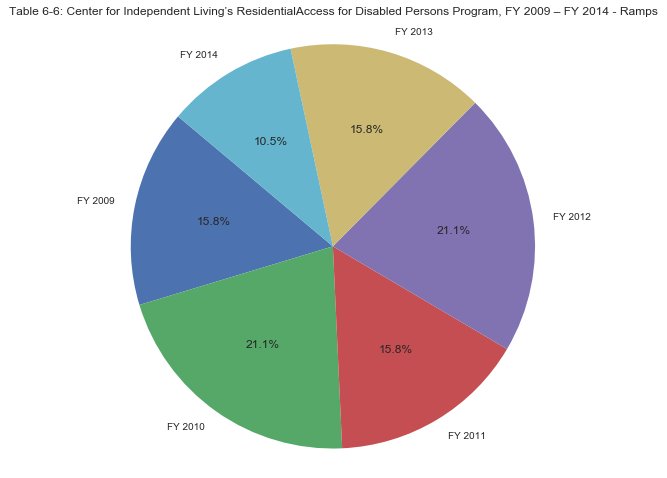

Total Households


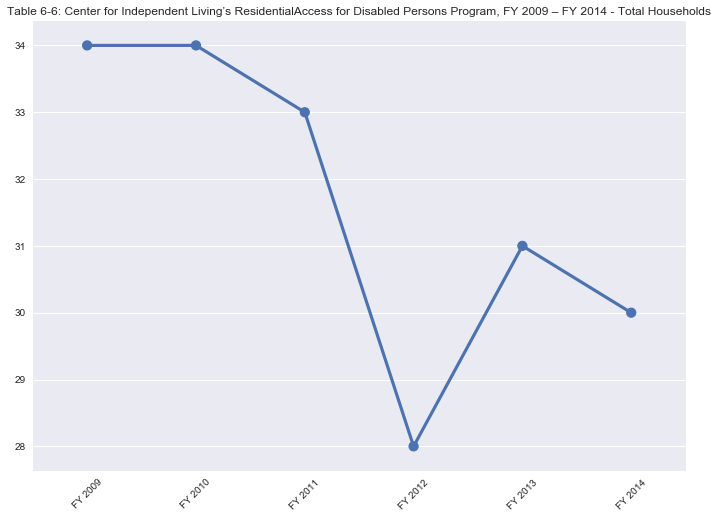

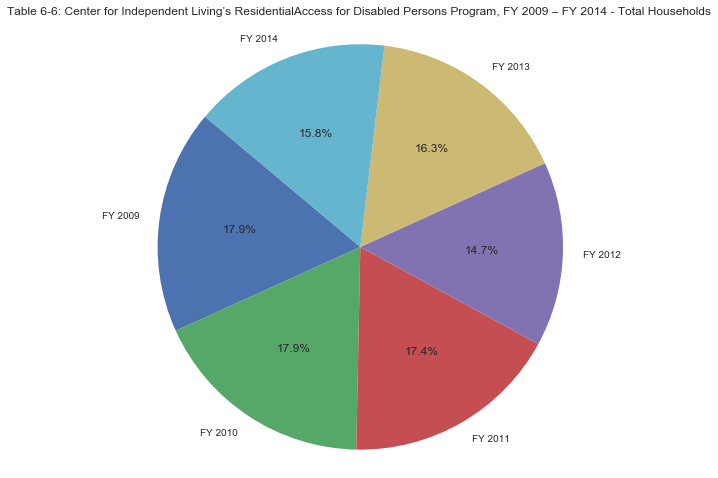

Homes Repaired


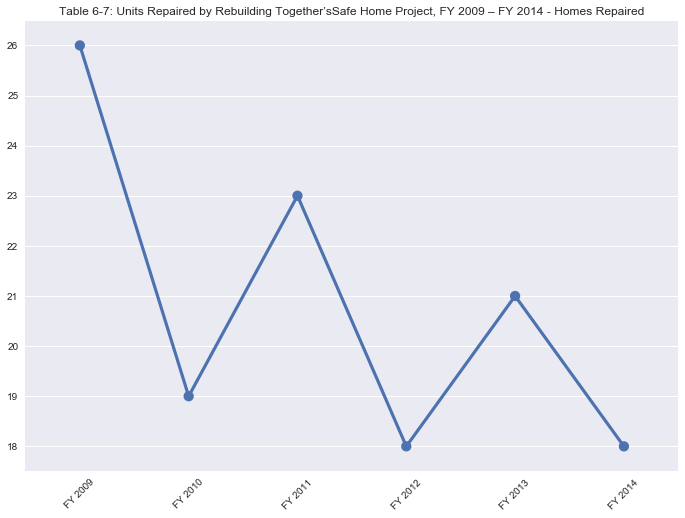

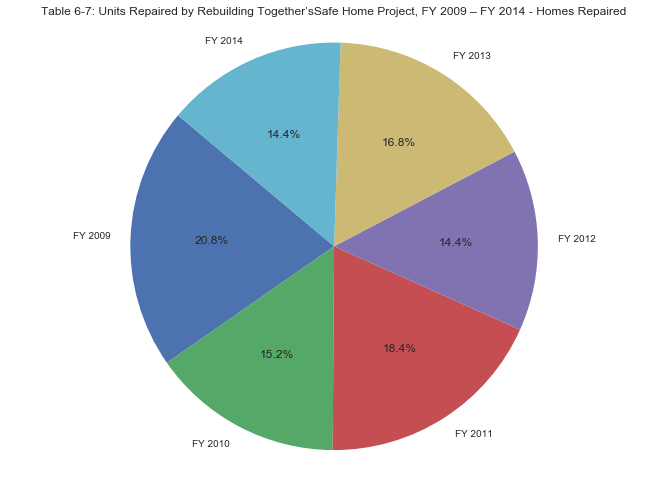

HomelessPrevention


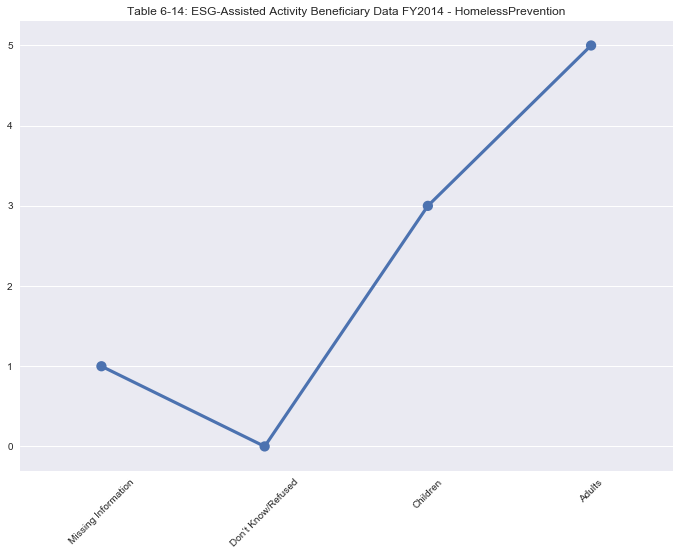

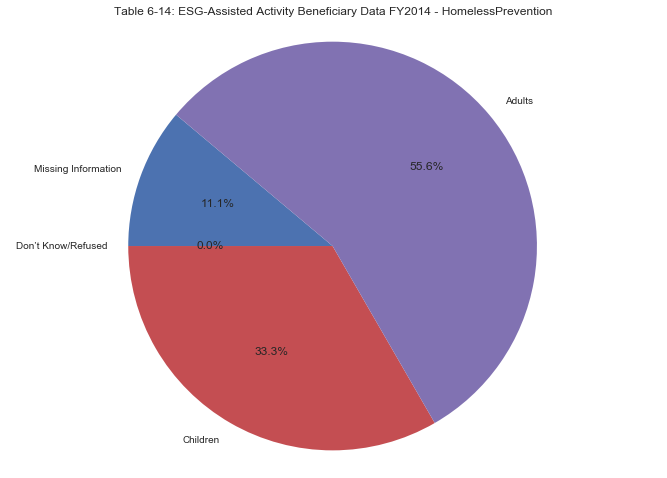

Rapid-Re-Housing


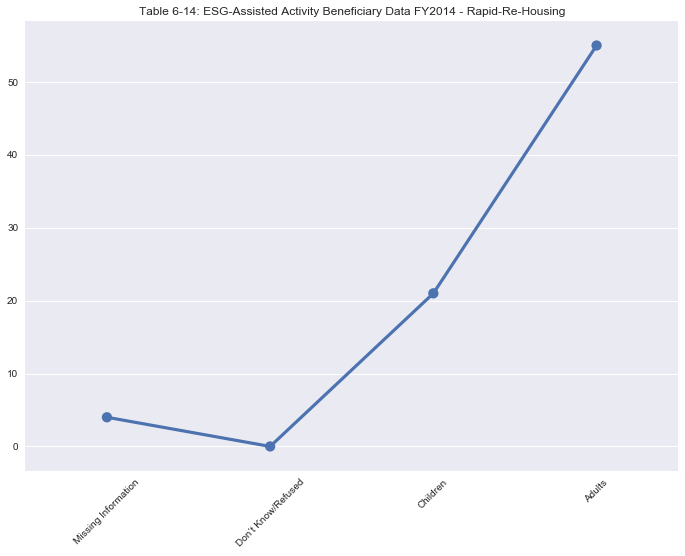

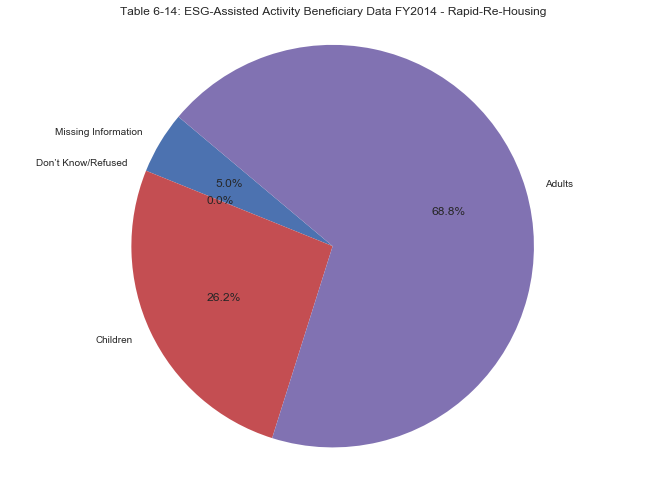

Shelter


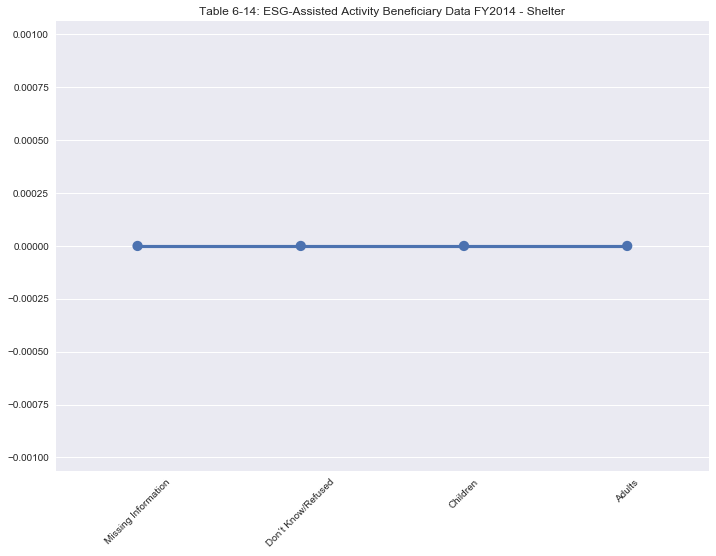

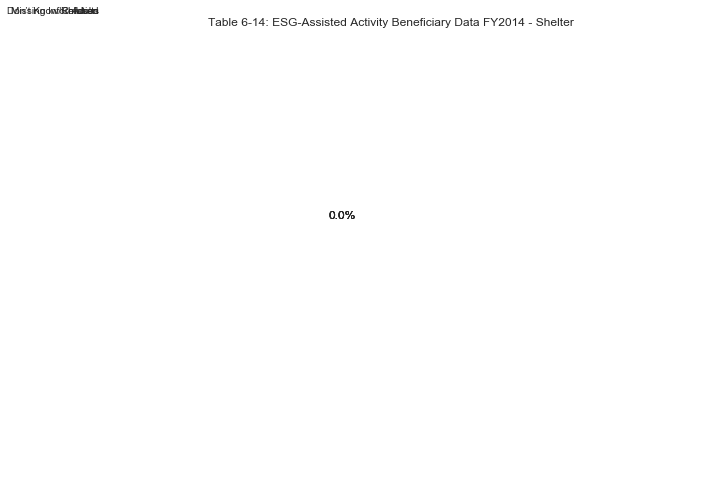

Total AllActivities


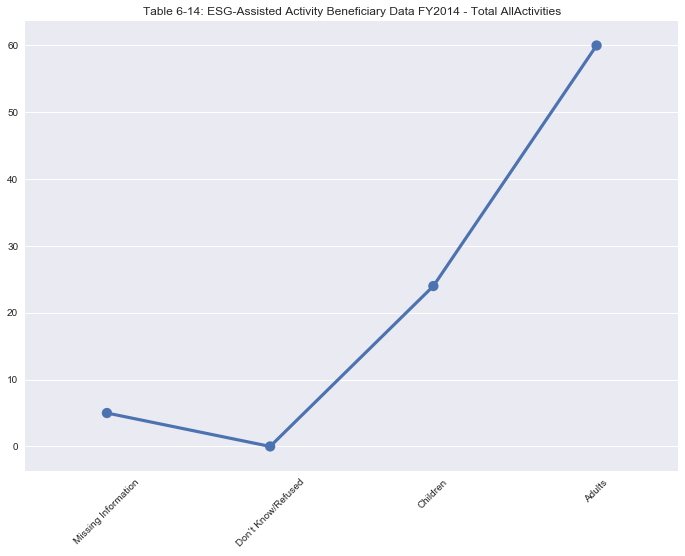

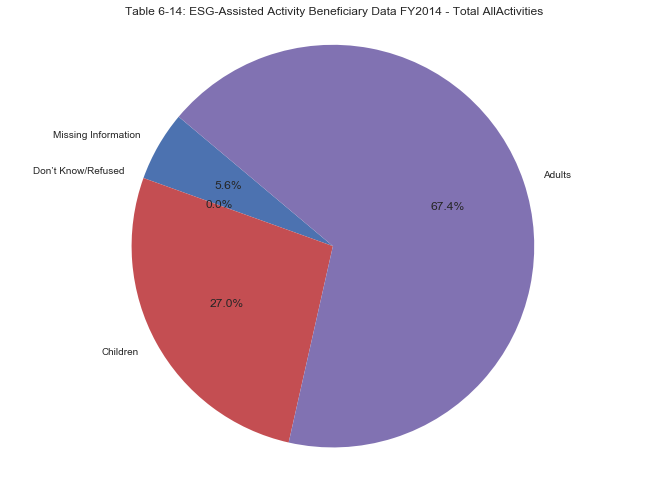

Total Units


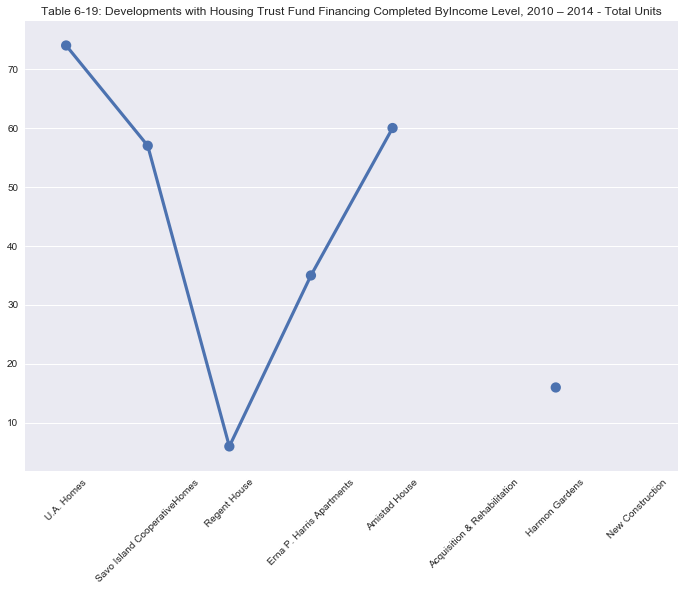

Total Units


ValueError: cannot convert float NaN to integer

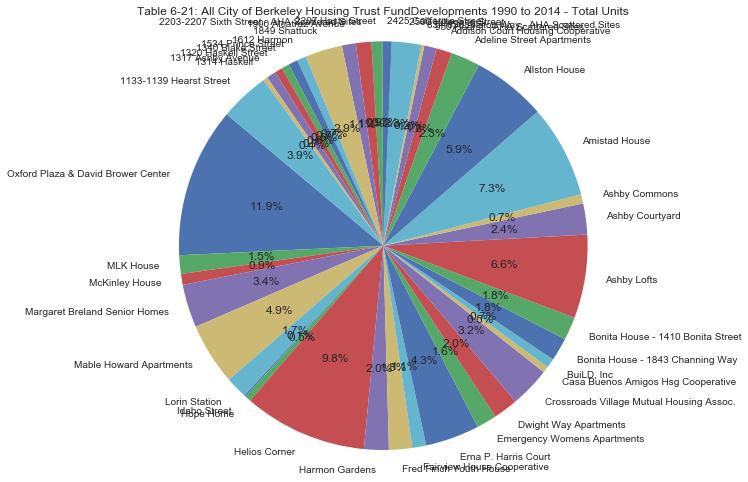

6


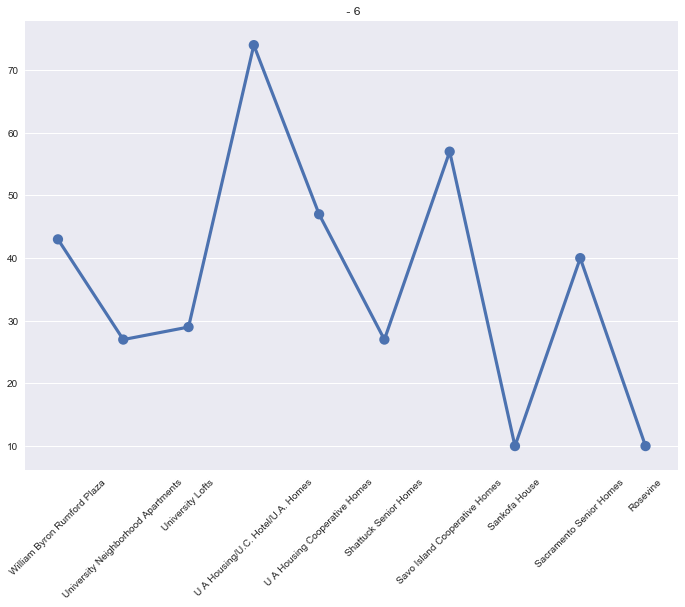

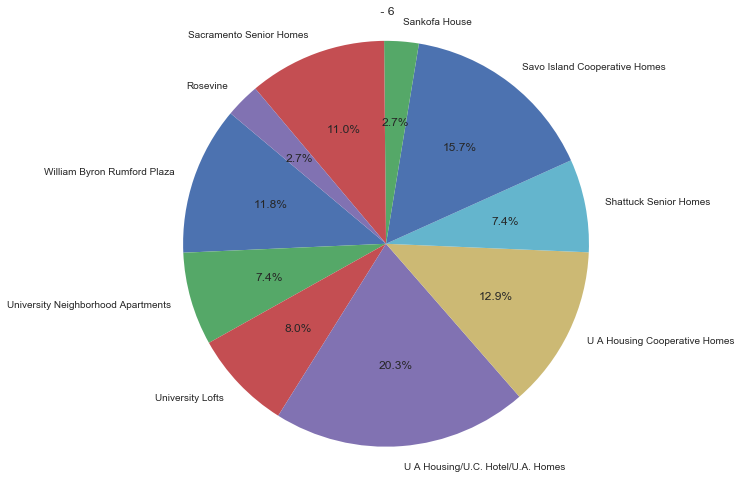

Total Units


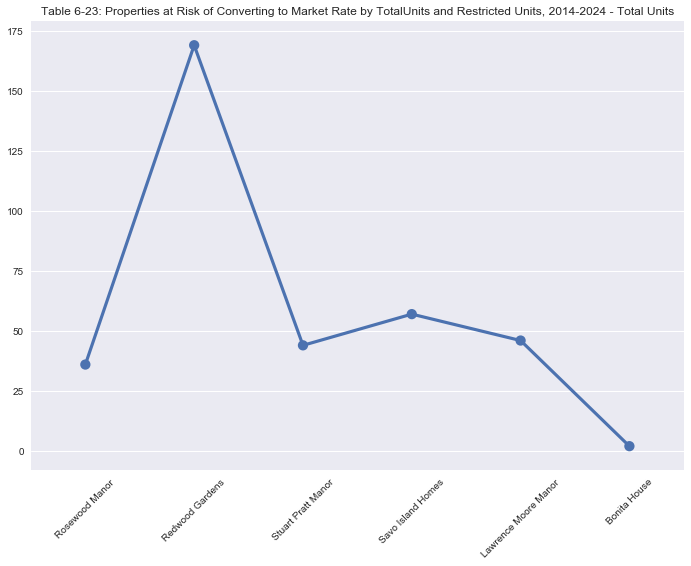

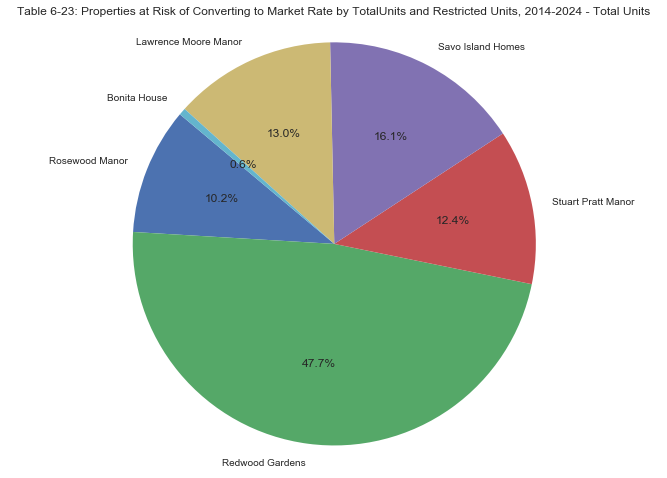

Restricted/ SubsidizedUnits


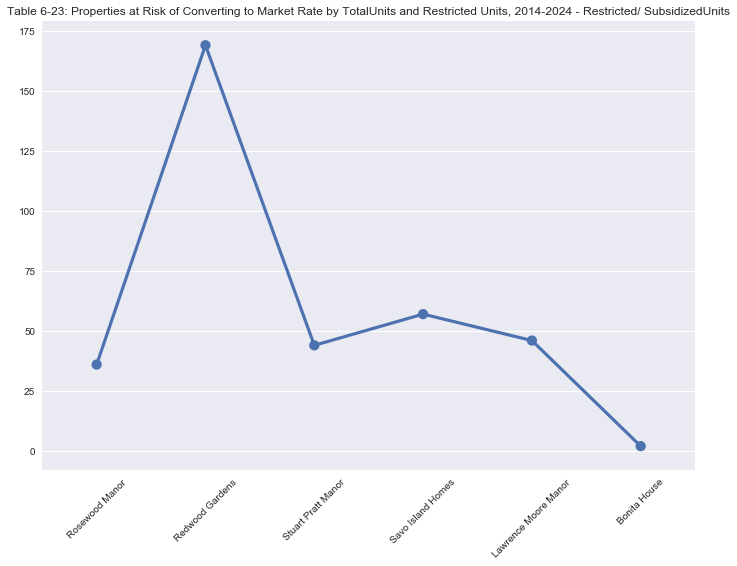

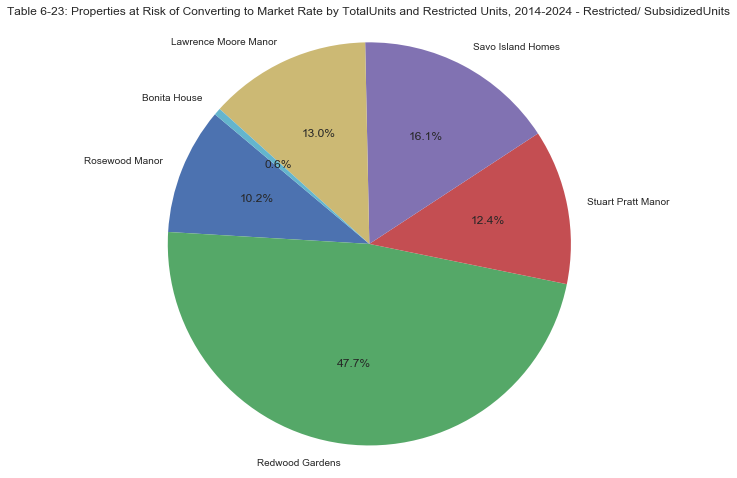

Elderly


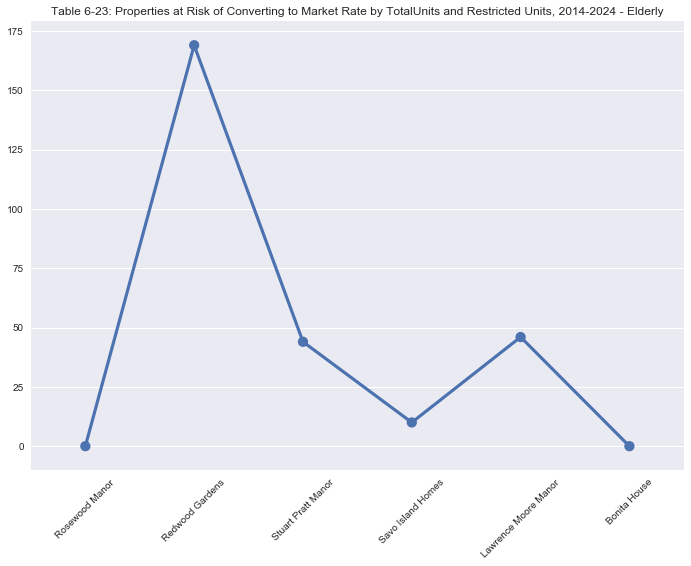

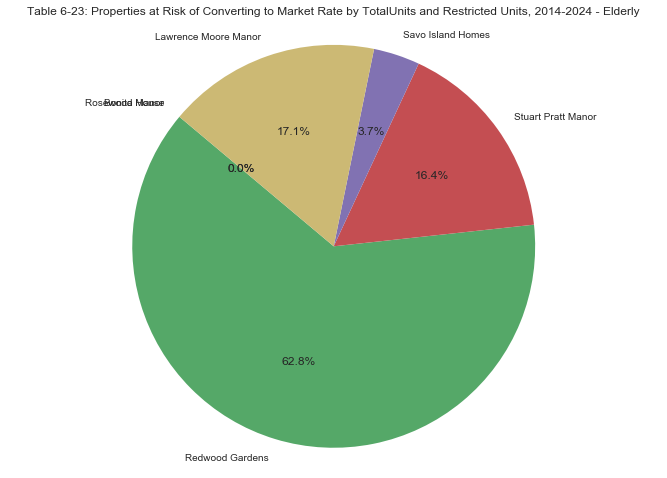

Disabled


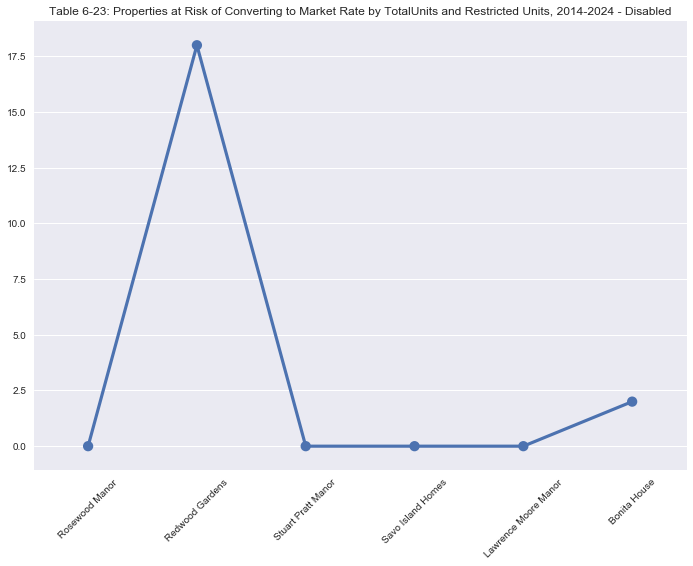

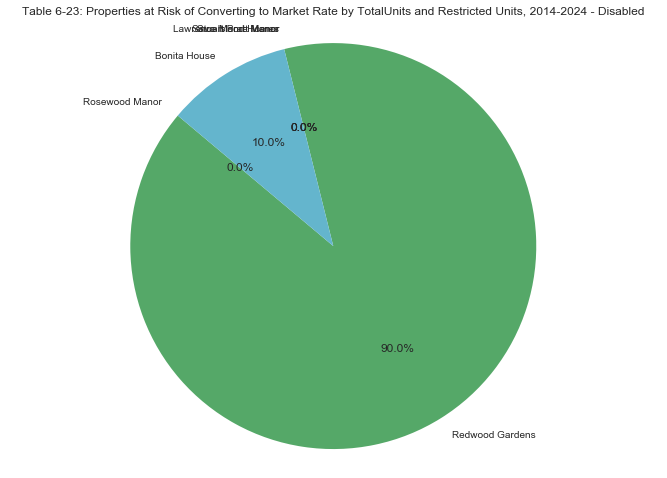

Studio


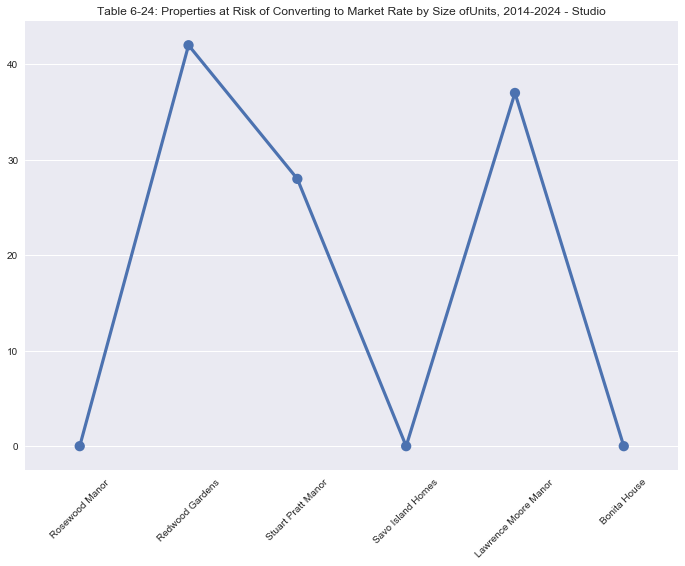

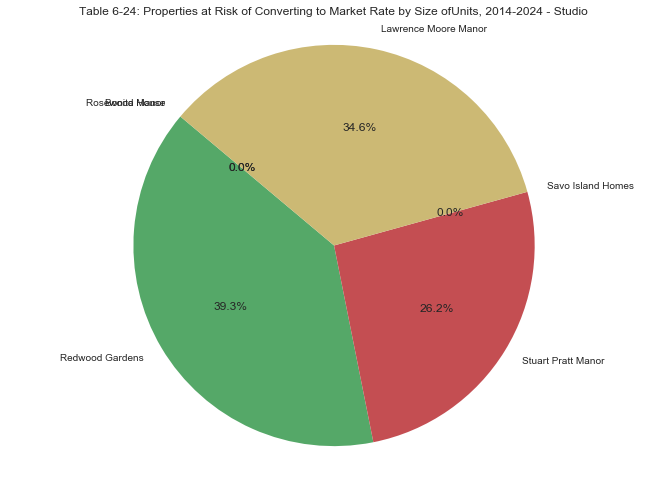

1-BR


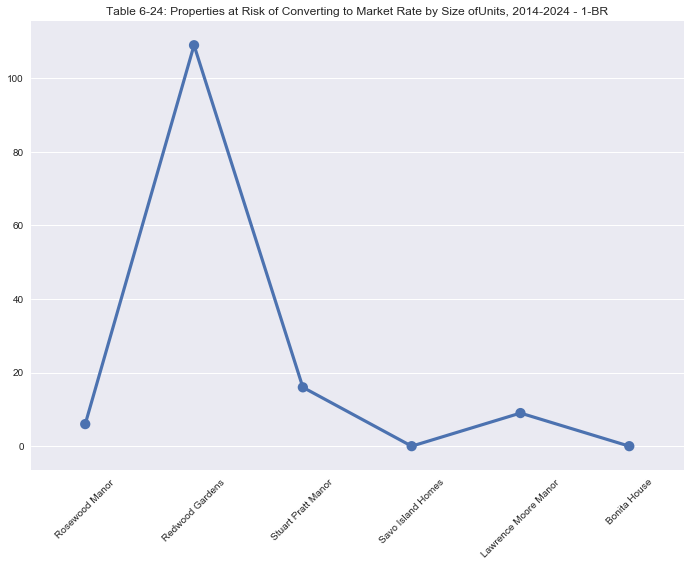

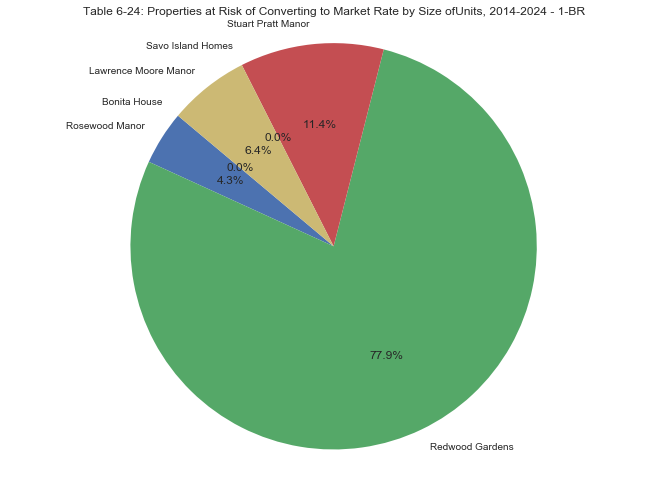

2-BR


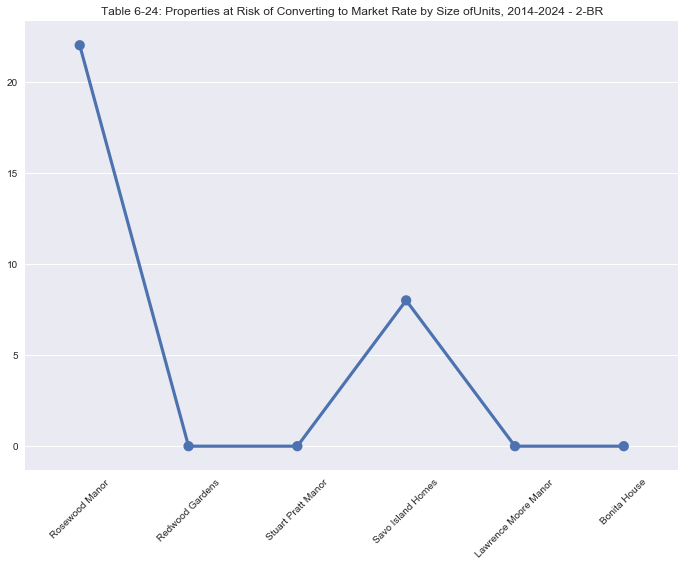

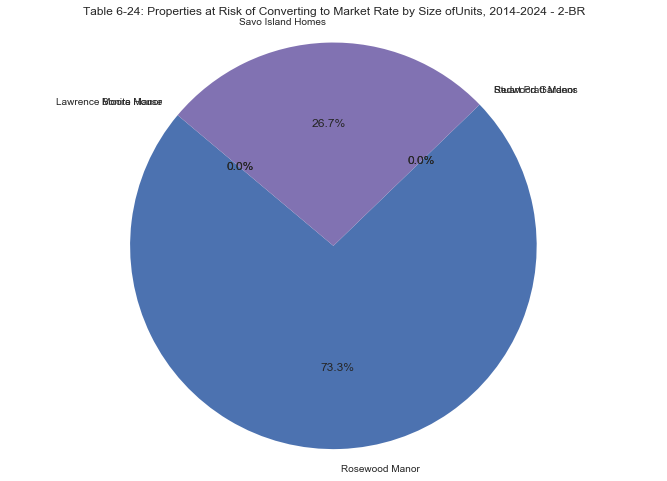

3-BR


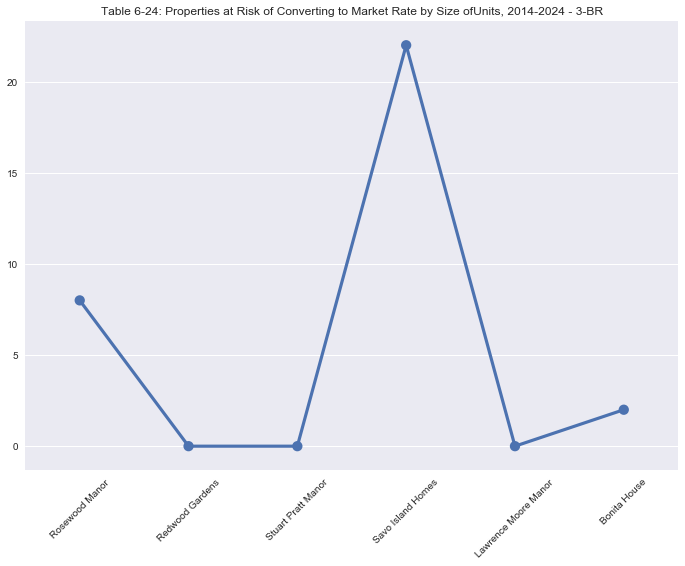

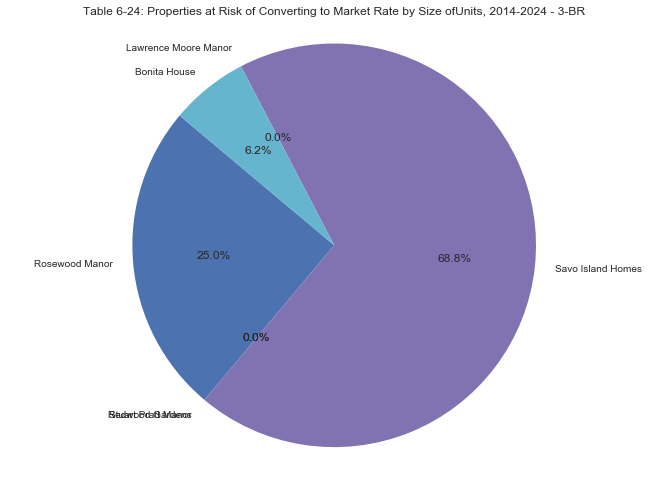

4-BR


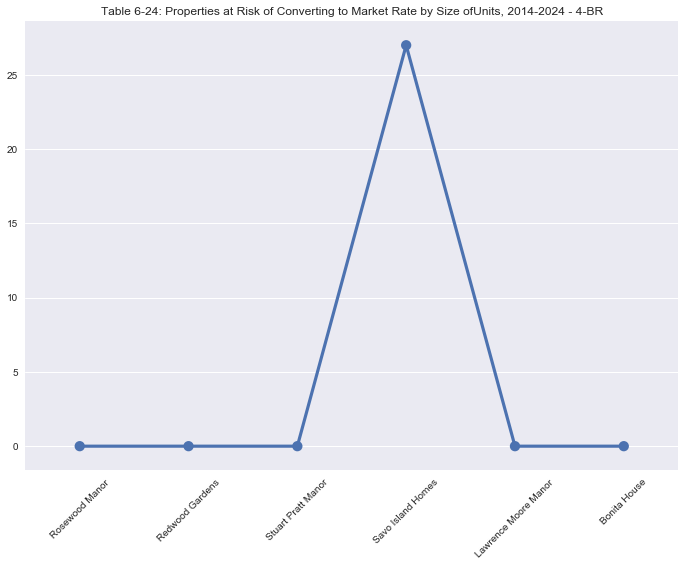

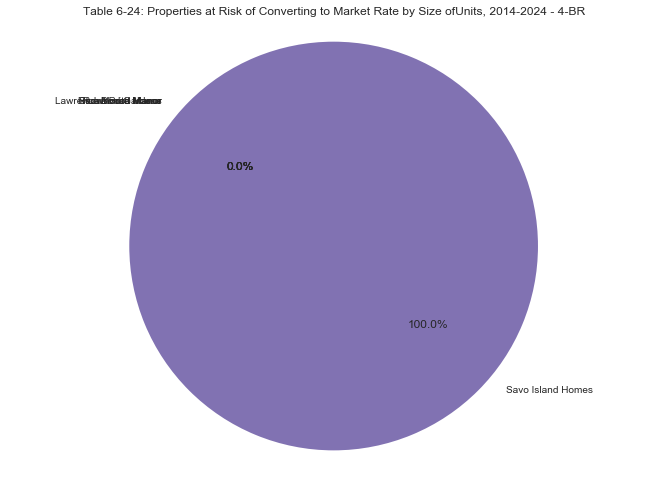

Median 2014Rent for 1998 Tenants


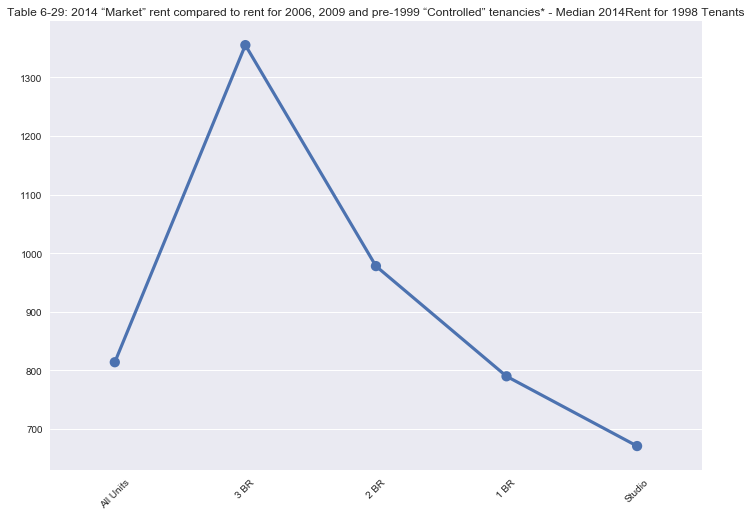

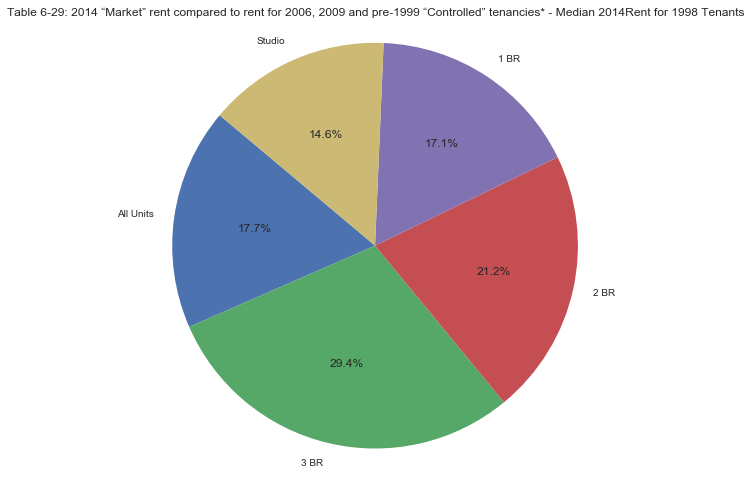

Median 2014Rent for 2003 Tenants


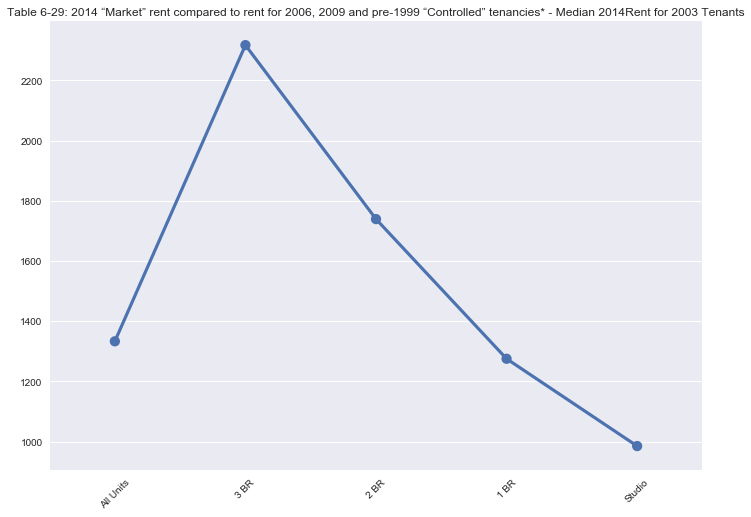

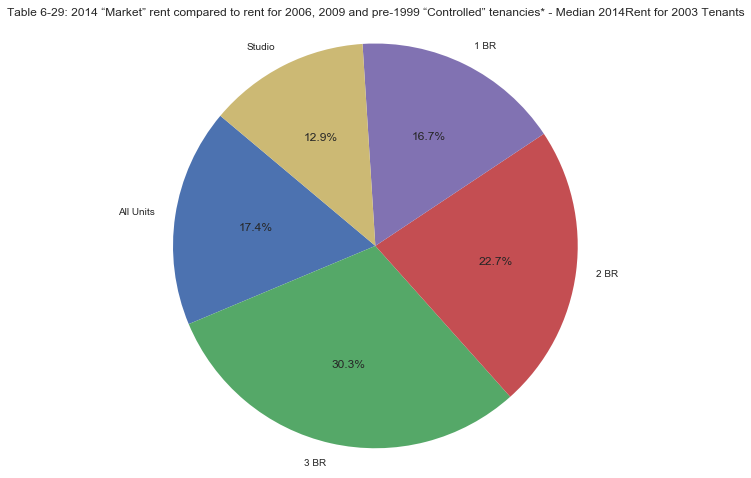

Median 2014Rent for 2009 Tenants


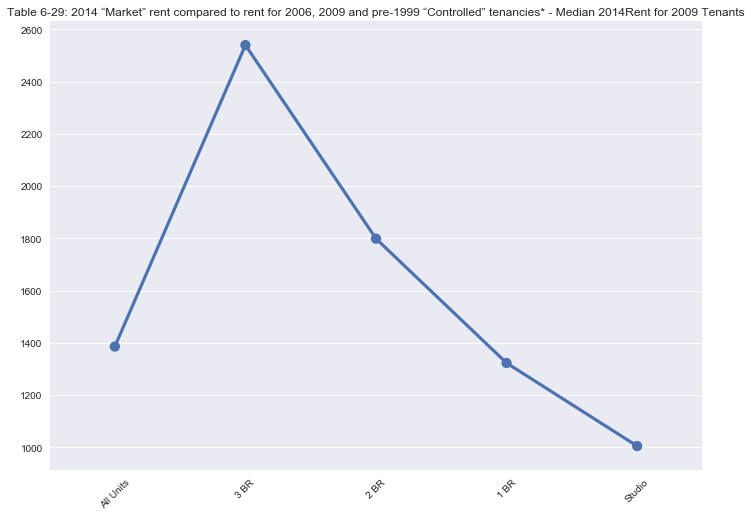

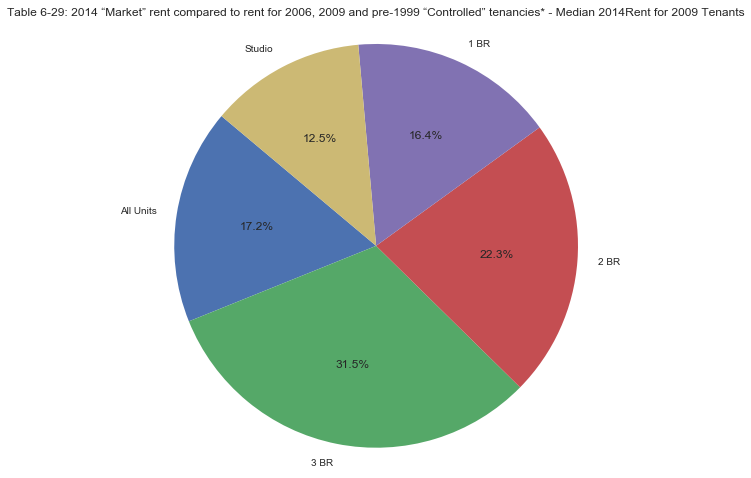

Median 2014 Market Rent*


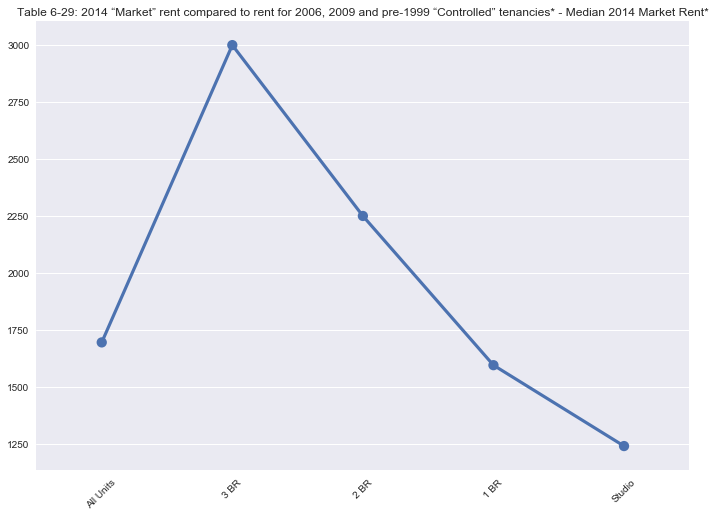

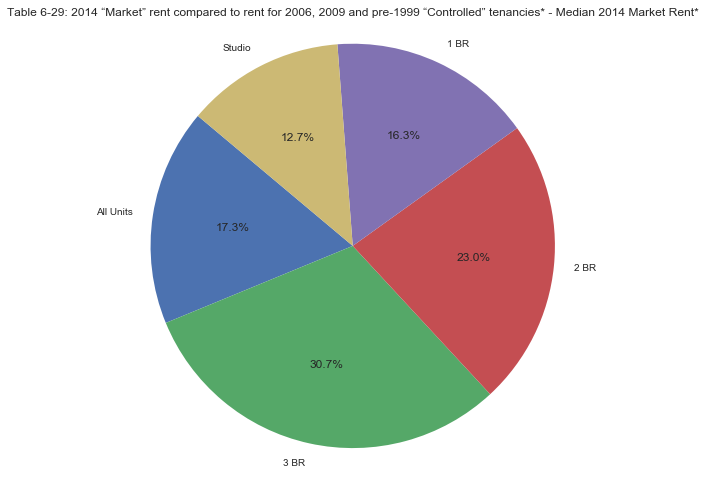

# of units


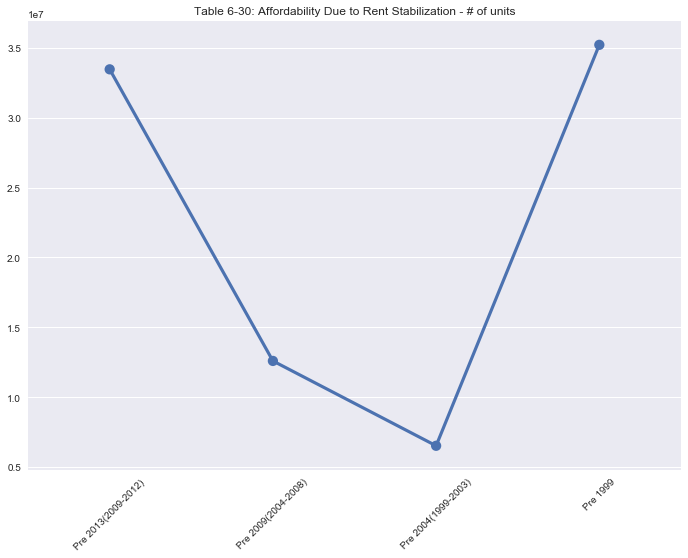

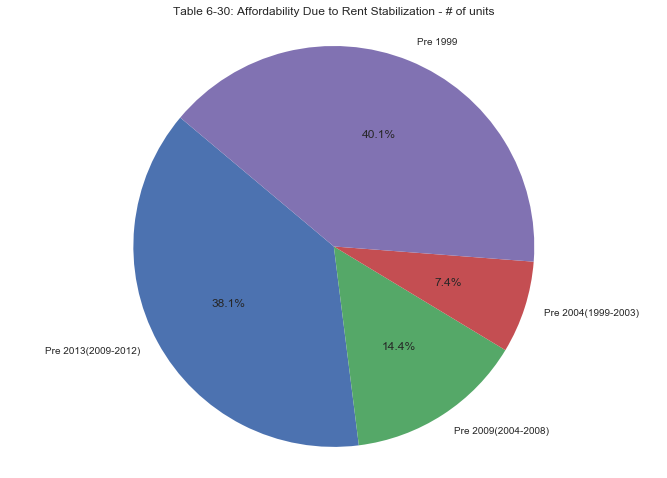

Avg. Rent


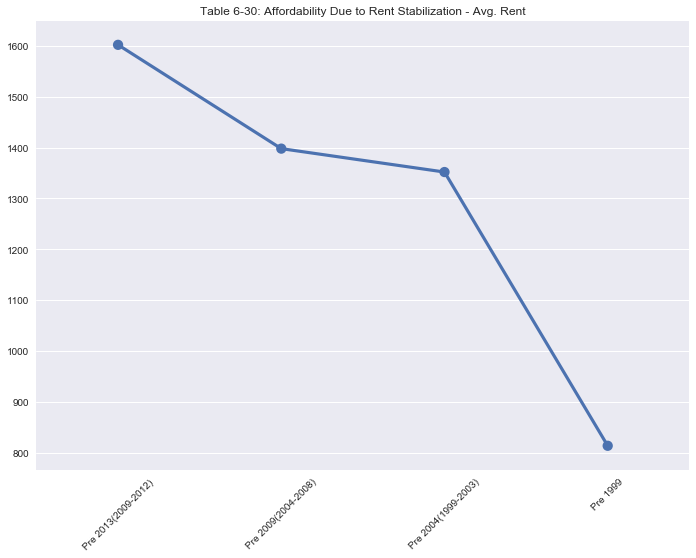

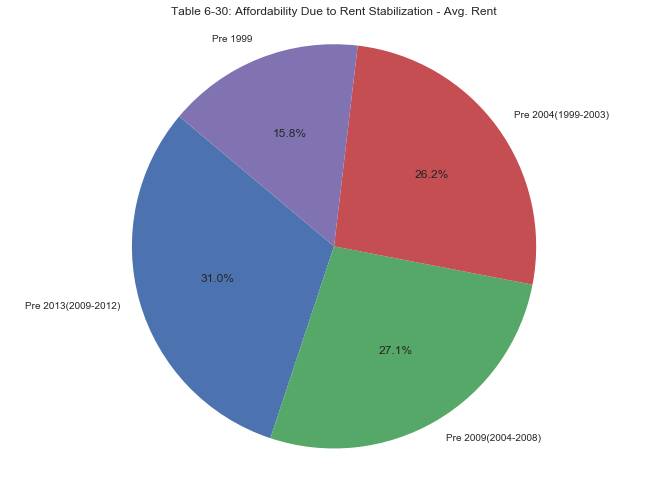

Avg. 2013Market Rent*


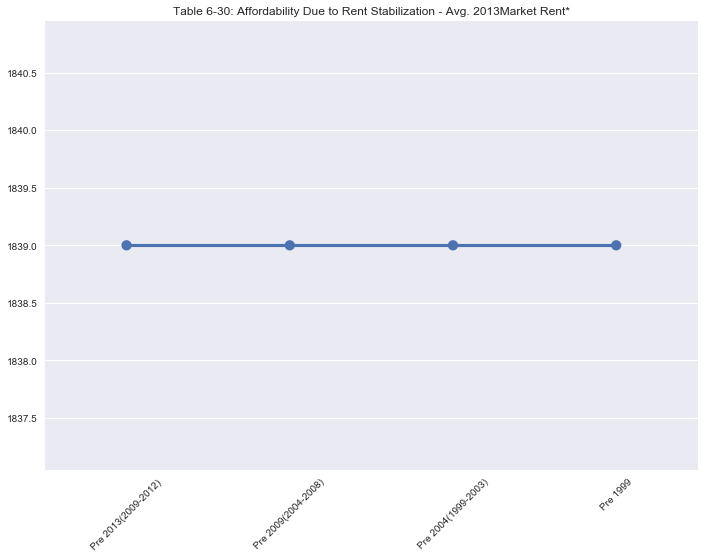

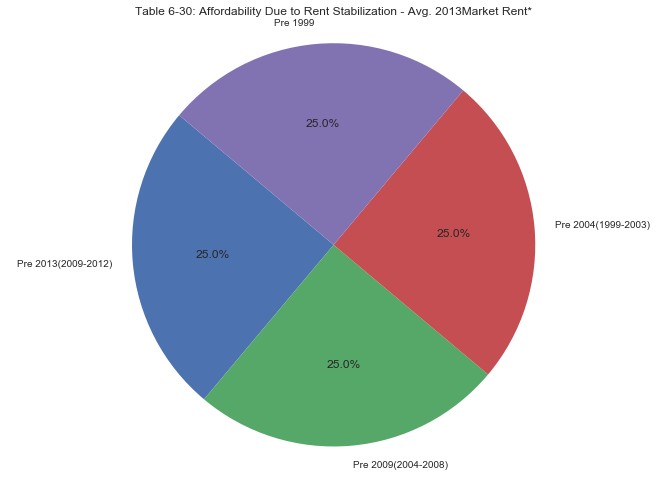

2014Affordability


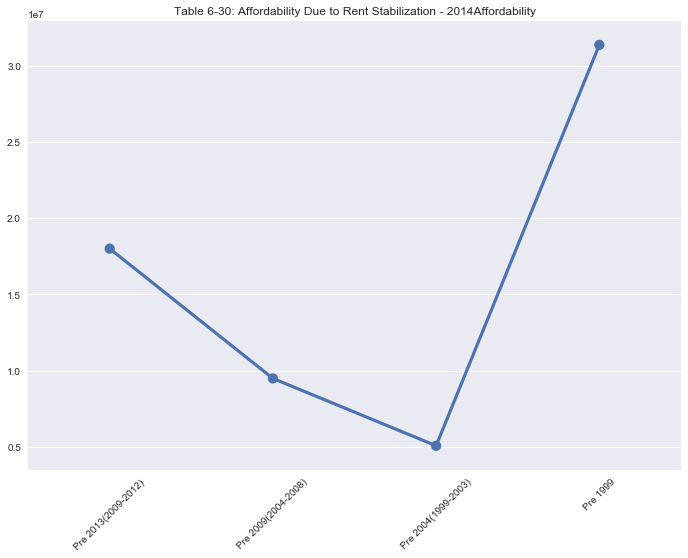

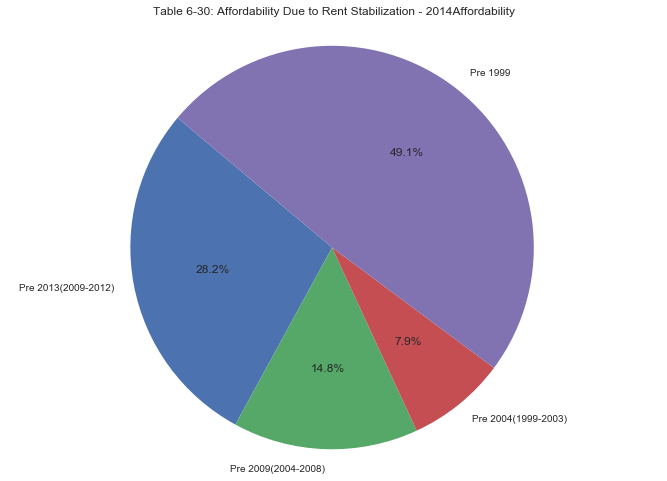

# of Rebates


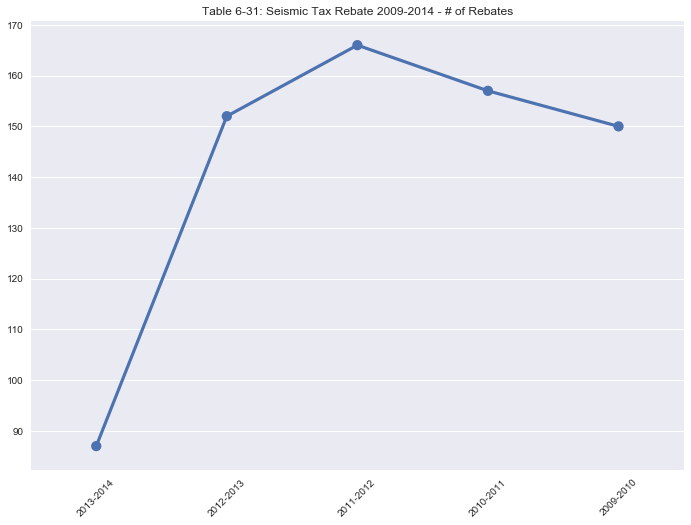

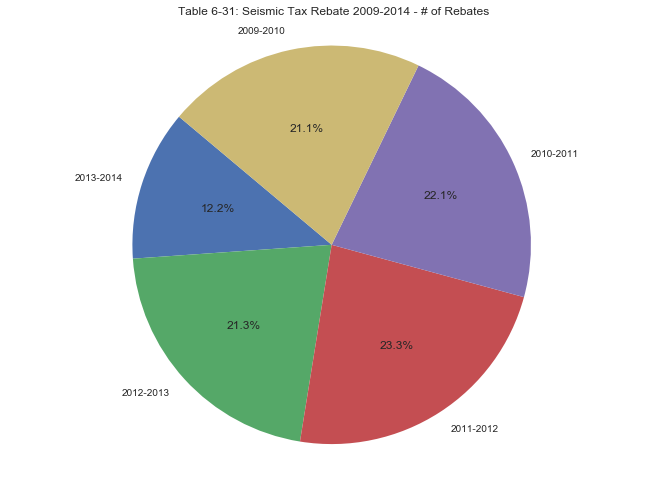

Amount


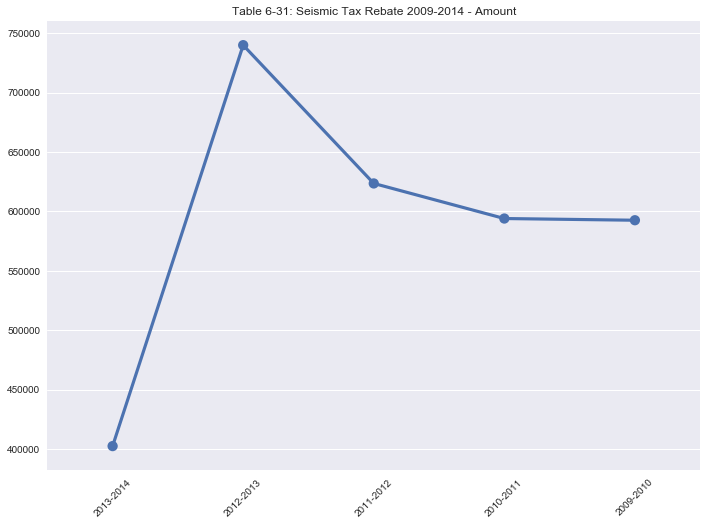

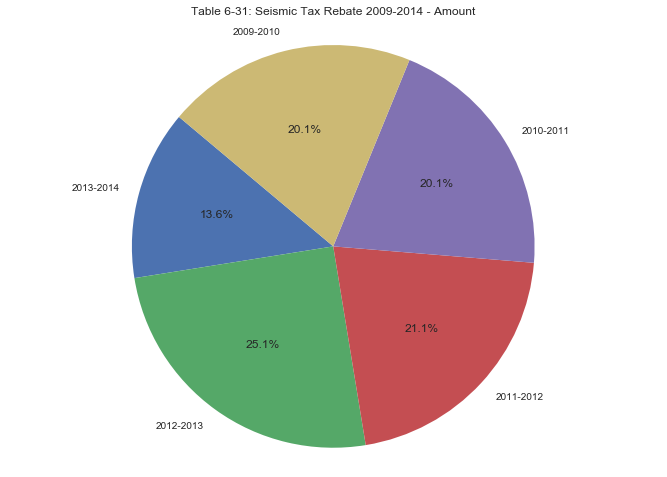

# of Properties


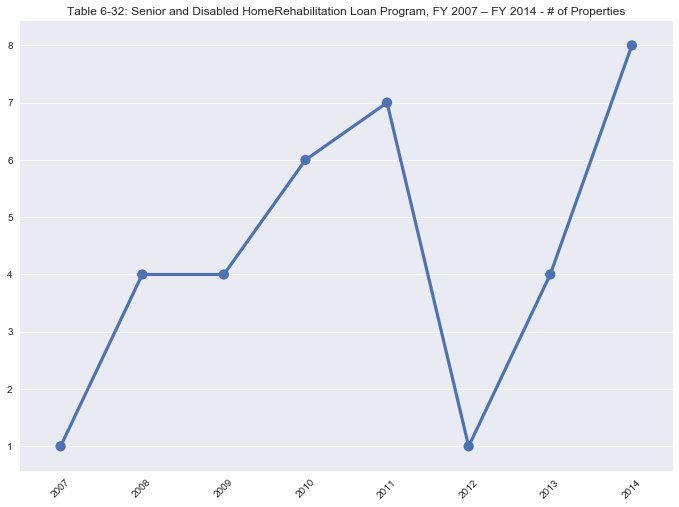

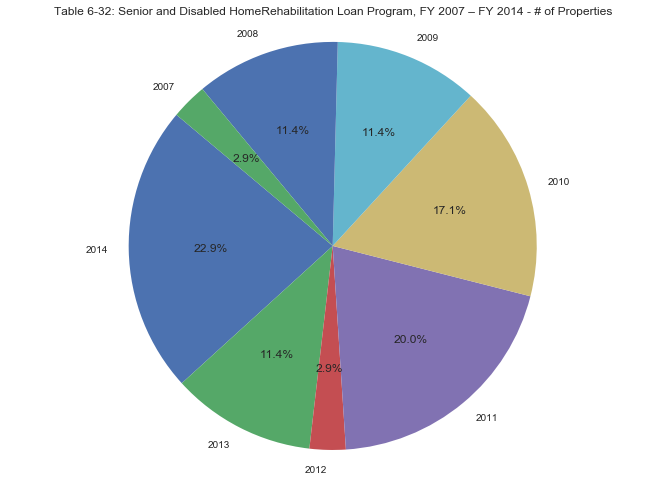

Annual Loan Volume


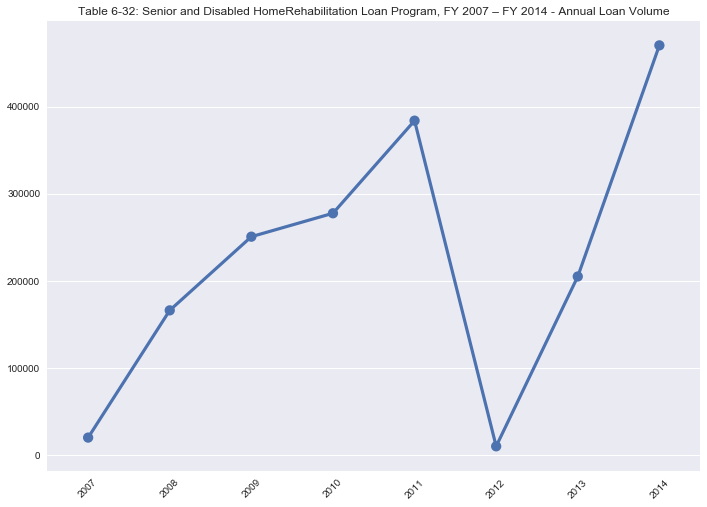

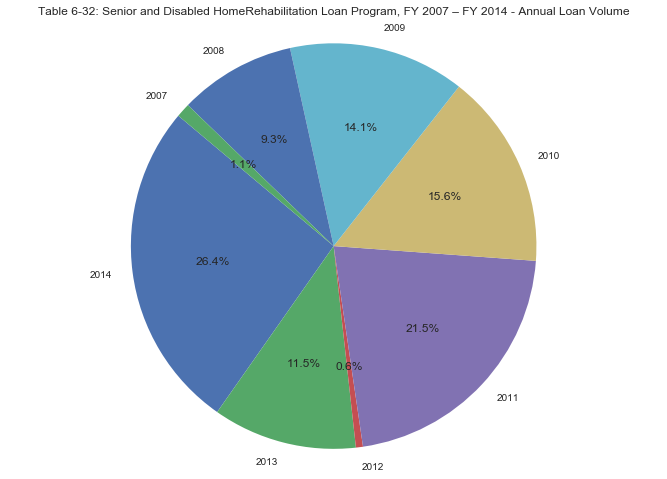

Number of Sites


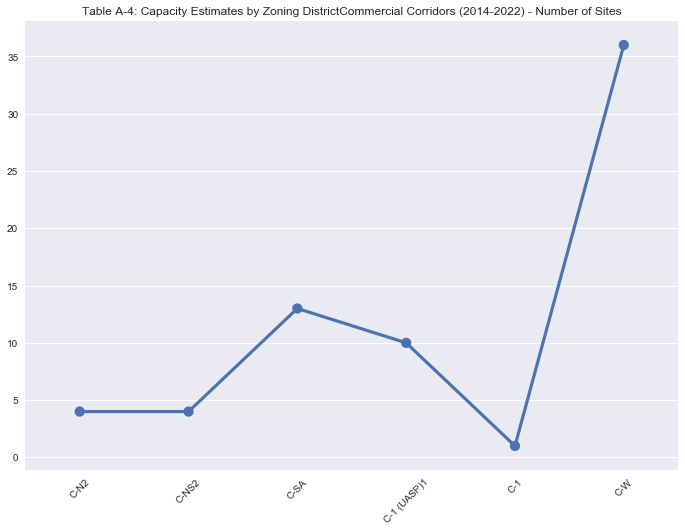

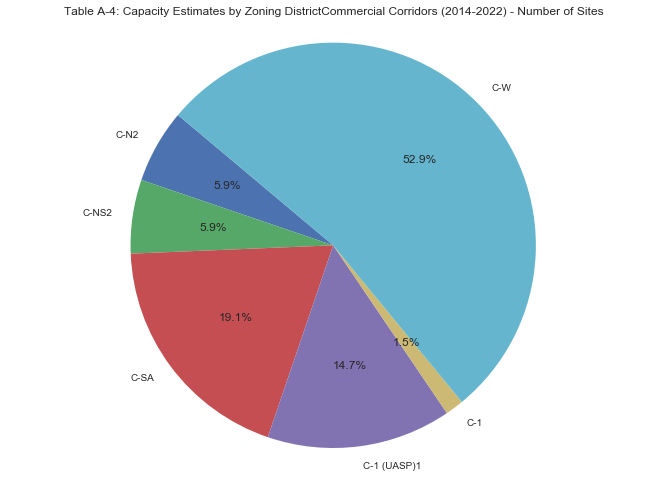

TotalAcres


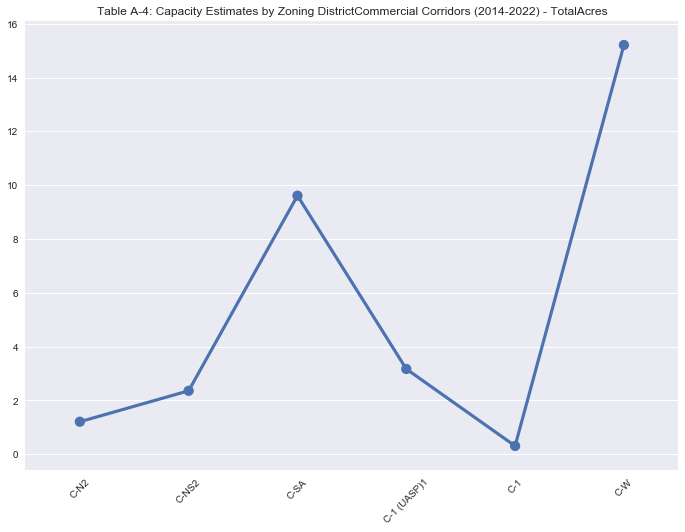

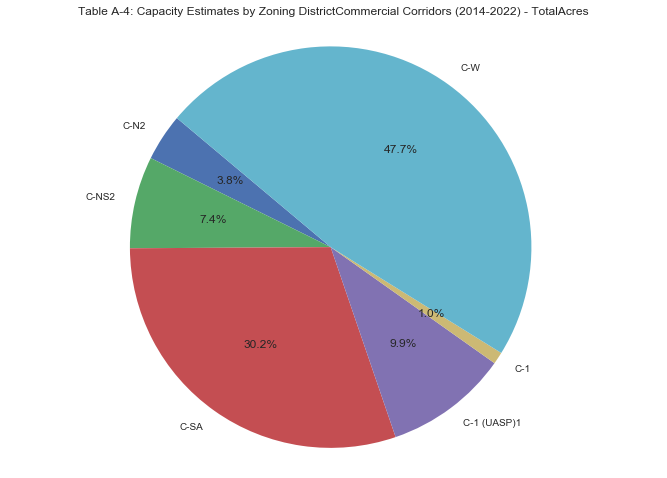

EstimatedUnits/Acre


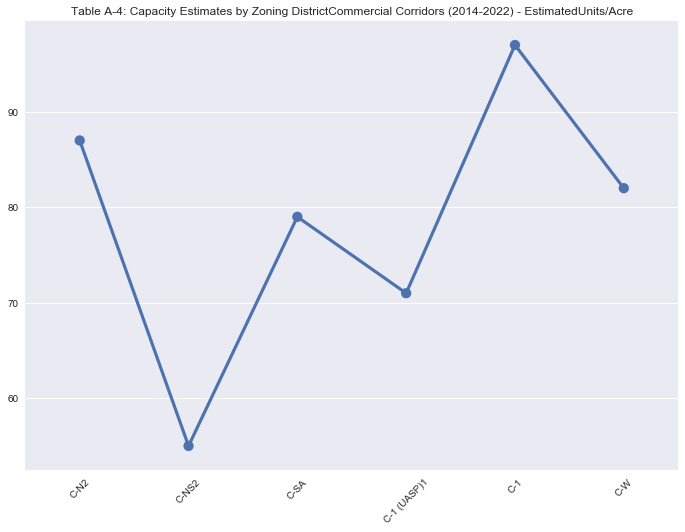

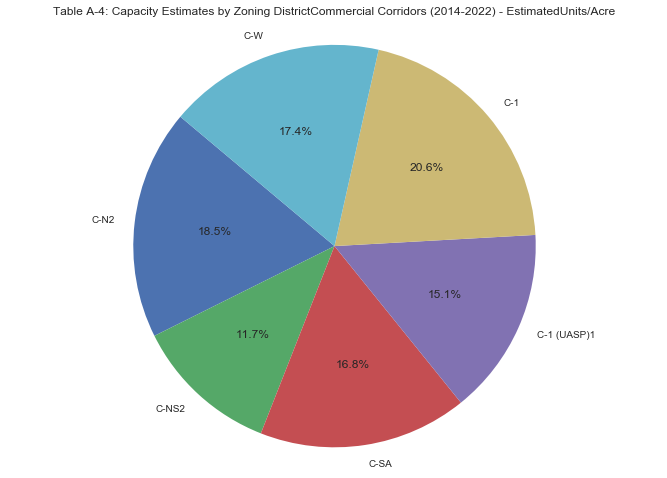

Total Units3


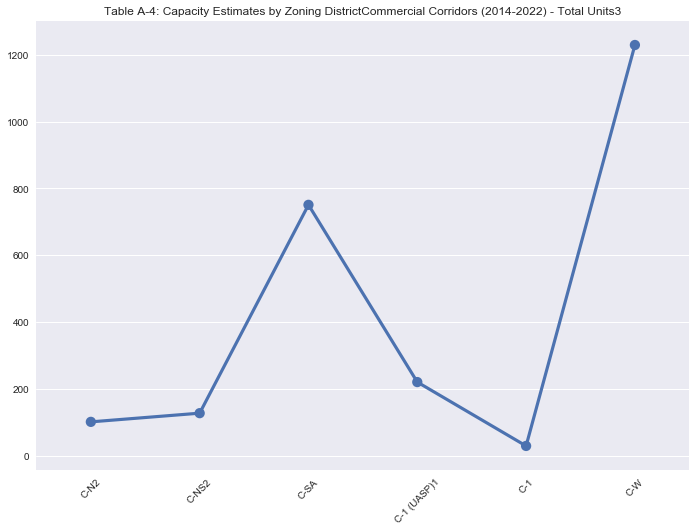

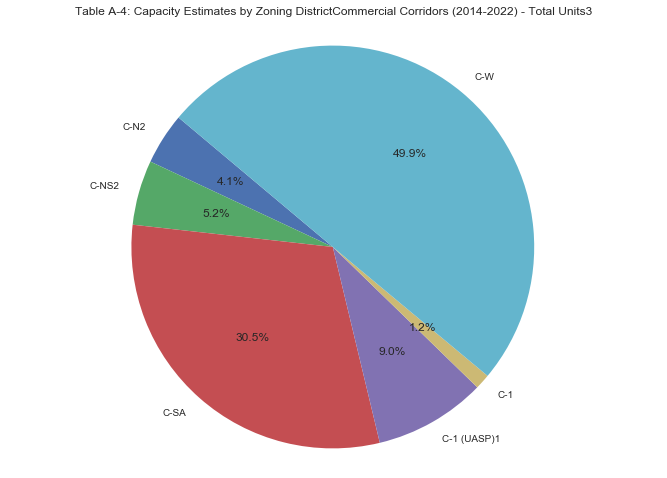

No. of Past Projects


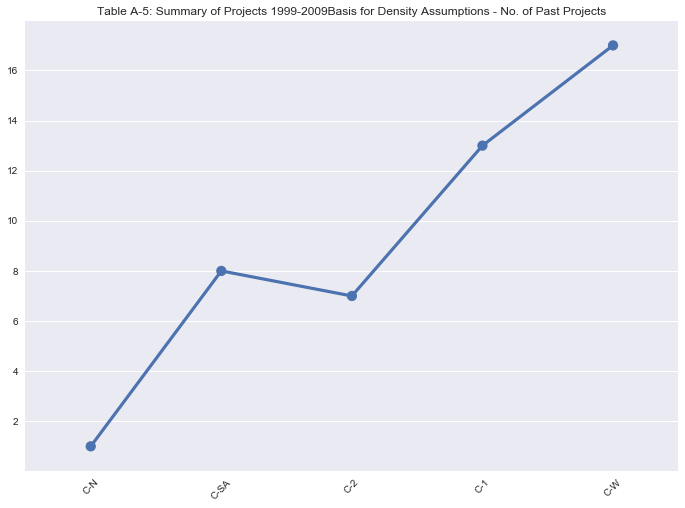

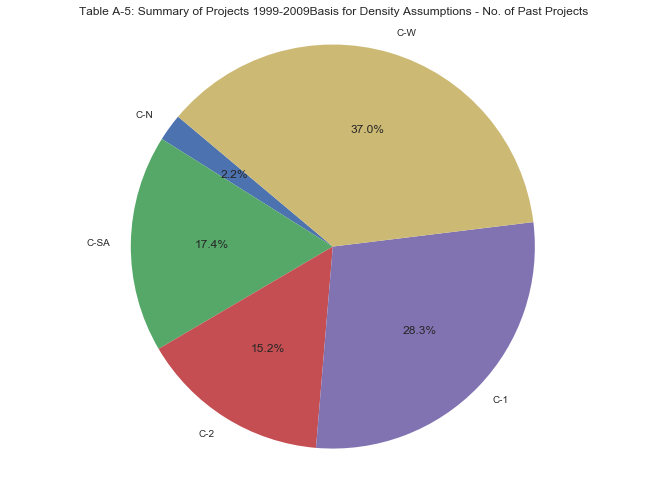

Acres


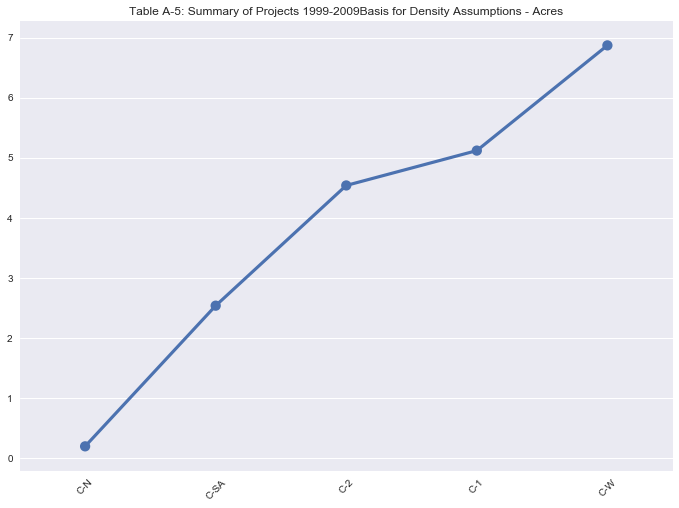

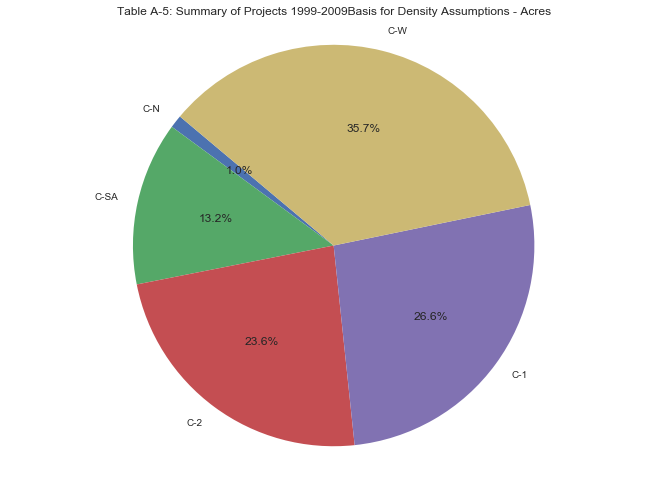

Units


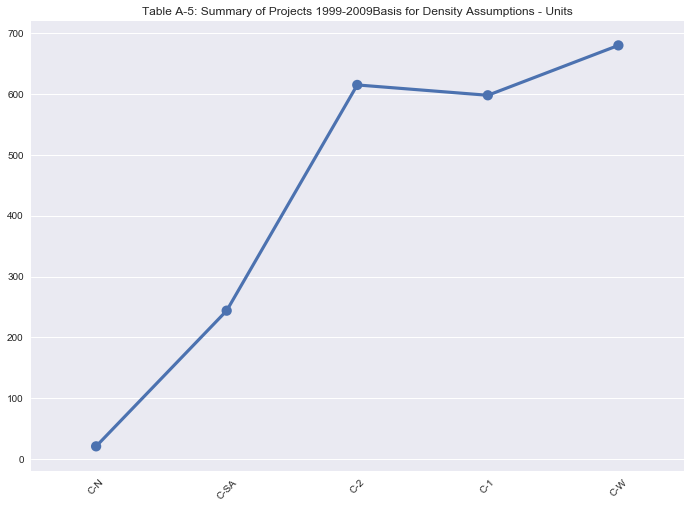

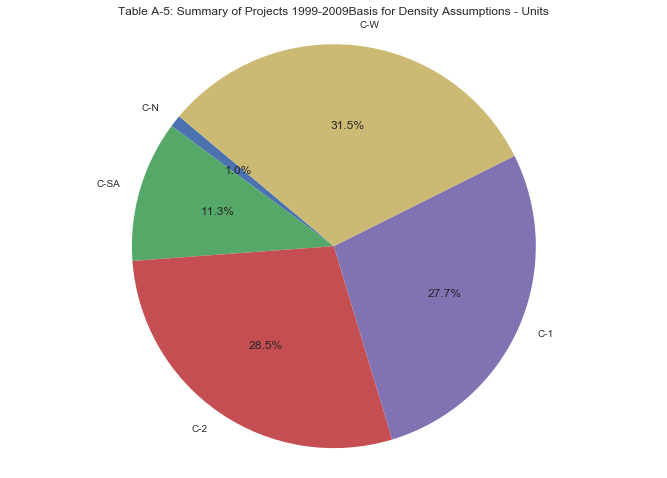

Average Units/Acre


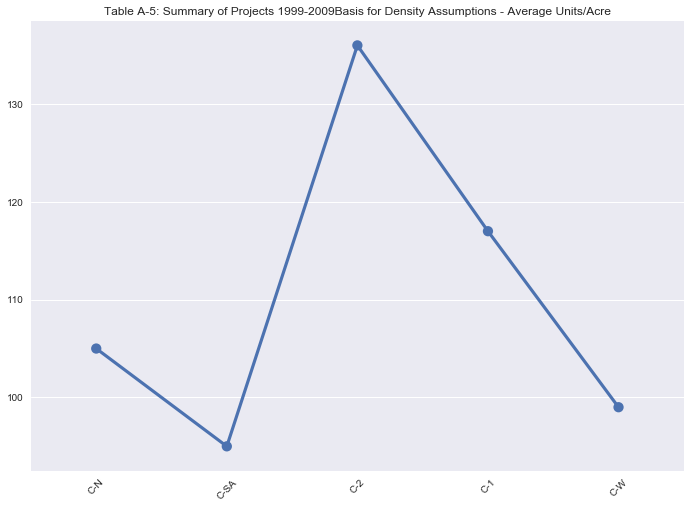

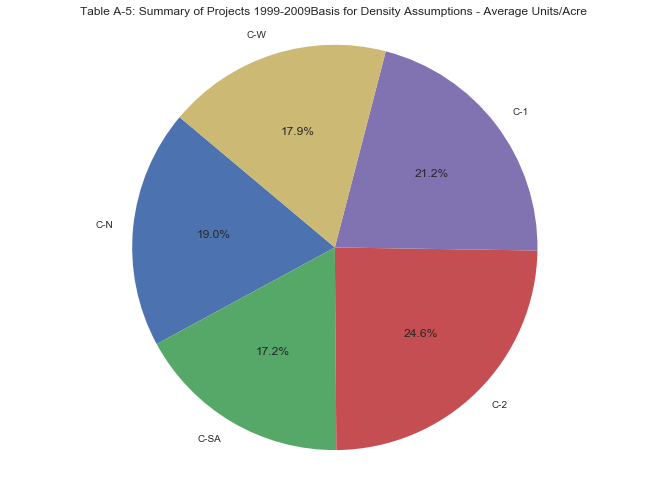

No. of Lots


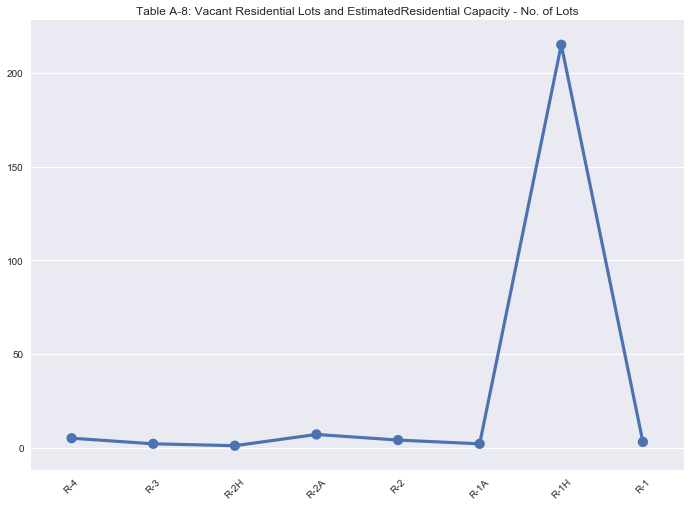

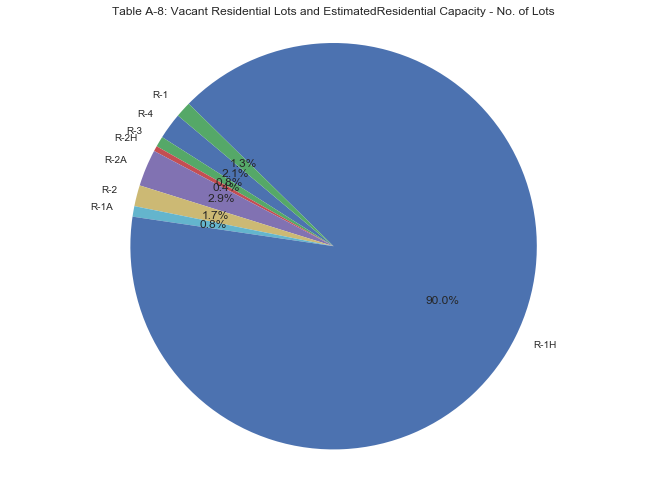

Total Est. No.Units


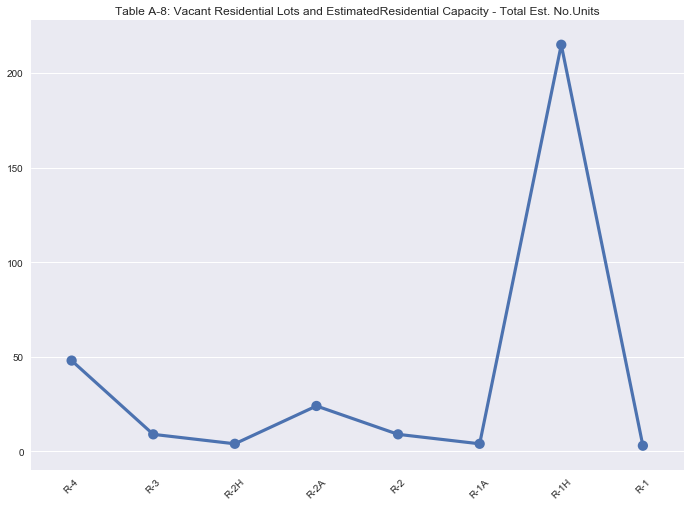

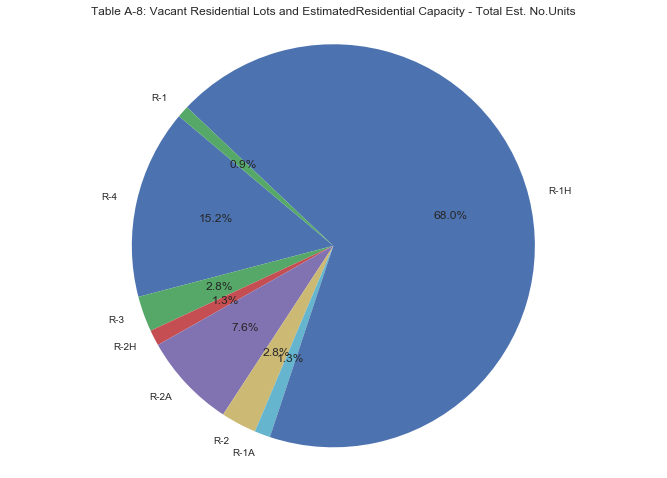

Est. No. Unitsduring current RHNA cycle


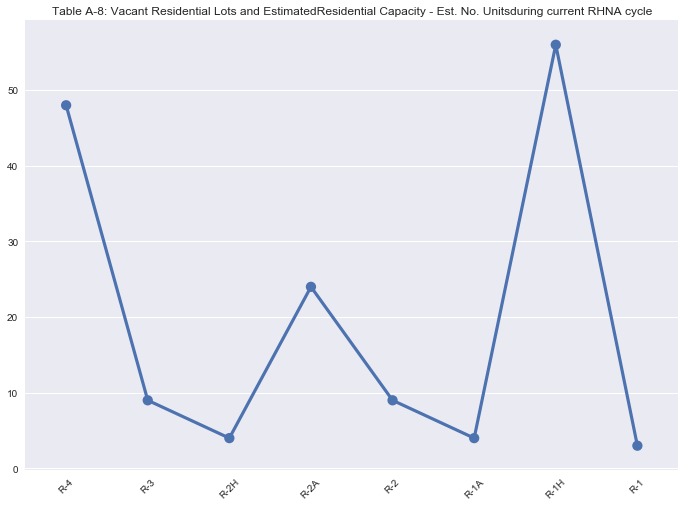

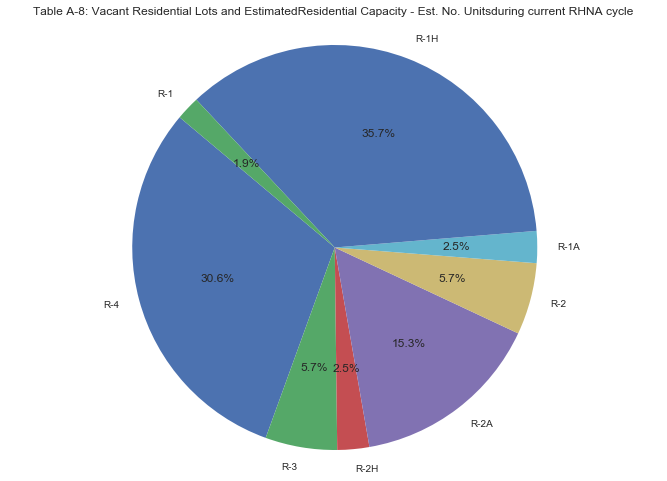

Estimated Number of New Units


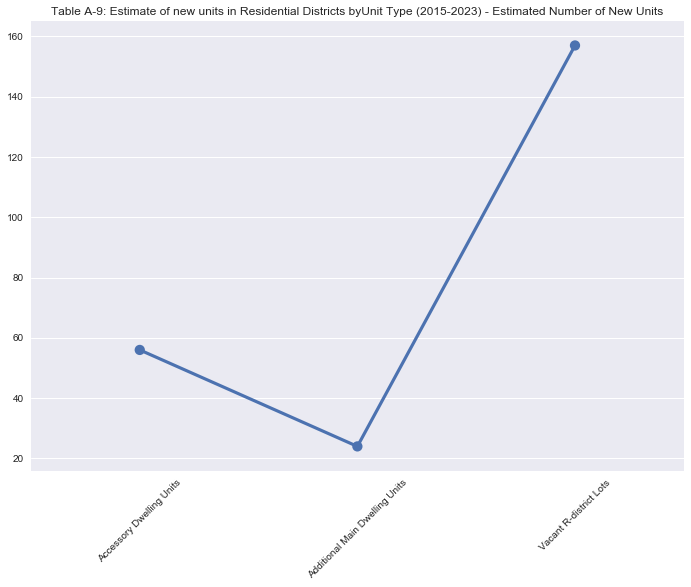

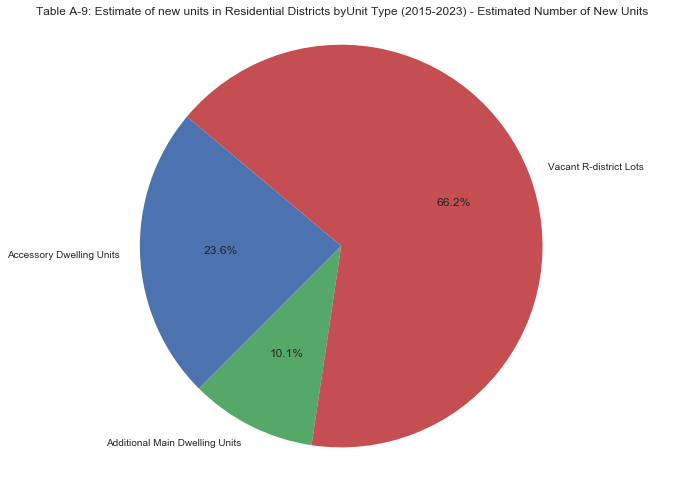

21,963


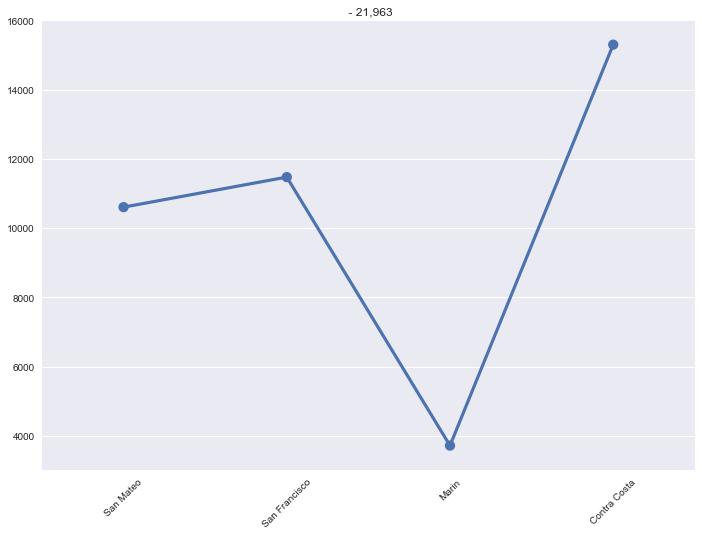

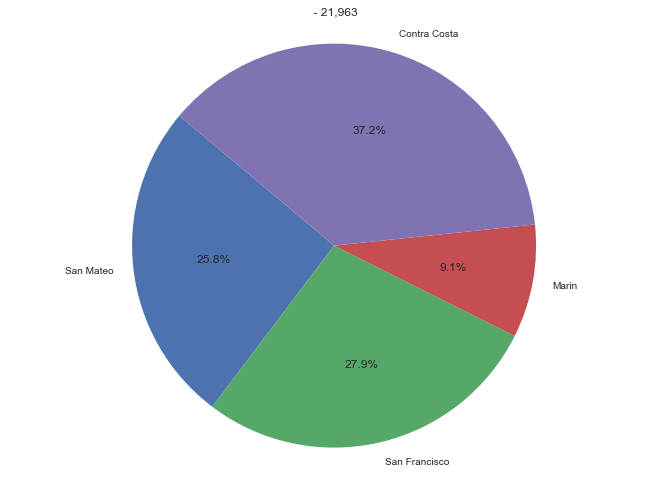

In [253]:
create_graphs(collection_of_berkeley_dataframes_working, headlines_berkeley)

In [37]:
x = list(df["Building Permits by calendar year"])[:8]

In [38]:
y = [int(x.replace(",", "")) for x in list(df["Total Units"])[:8]]

In [44]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [257]:
# sns.set_style("darkgrid")
# sns.pointplot(x=x, y=y)

In [256]:
# plt.show()

In [254]:
# ad = open("elements1/oakland_elements.html").read()

# soup1 = BeautifulSoup(ad)

# tables1 = soup1.find_all("table")
# print(len(tables1))
# for i in range(60,120):
#     try:
#         print(i)
#         display(HTML(str(tables1[i])))
#         display(create_dataframe(tables1[i])[0])
#     #     print("*"*80)
#     except Exception as e:
#         print(e)

In [255]:
# display(HTML(str(tables1[74])))